# ggplot Presentation

***

# Einführung

-   ggplot2 basiert auf der Idee der "grammar of graphics"

-   Demnach lässt sich jede Grafik aufbauen als Kombination von

    -   Daten
    -   Koordinatensystem
    -   "geoms"

-   "geoms" sind dabei visuelle Repräsentationen der Daten (Punkte, Kreise, Flächen, Linien, etc)

-   "geoms" haben Eigenschaften (sog. "aesthetics"), z.B. Größe, Farbe, x- und y-Position etc.

-   die Daten werden auf die "aesthetics" gemapped

***

# Datenpräsentation: geom

- Art der visuellen Präsentation der Daten
    - Balken
    - Kreis
    - Linien
    - Punkte
    - Flächen
    - etc.

- kann grob unterteilt werden in:
    - Univariat
        - diskret (faktor)
        - stetig
        
    - Bivariat
        - x und y diskret
        - x oder y diskret
        - x und y stetig
        
-   Über `aes()` werden hier die Werte für x bzw. y zugewiesen

In [45]:
library(ggplot2)
library(car)
library(magrittr)
data("mtcars")
data("economics")


In [46]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)

## Univariat:

### Bar-Plot

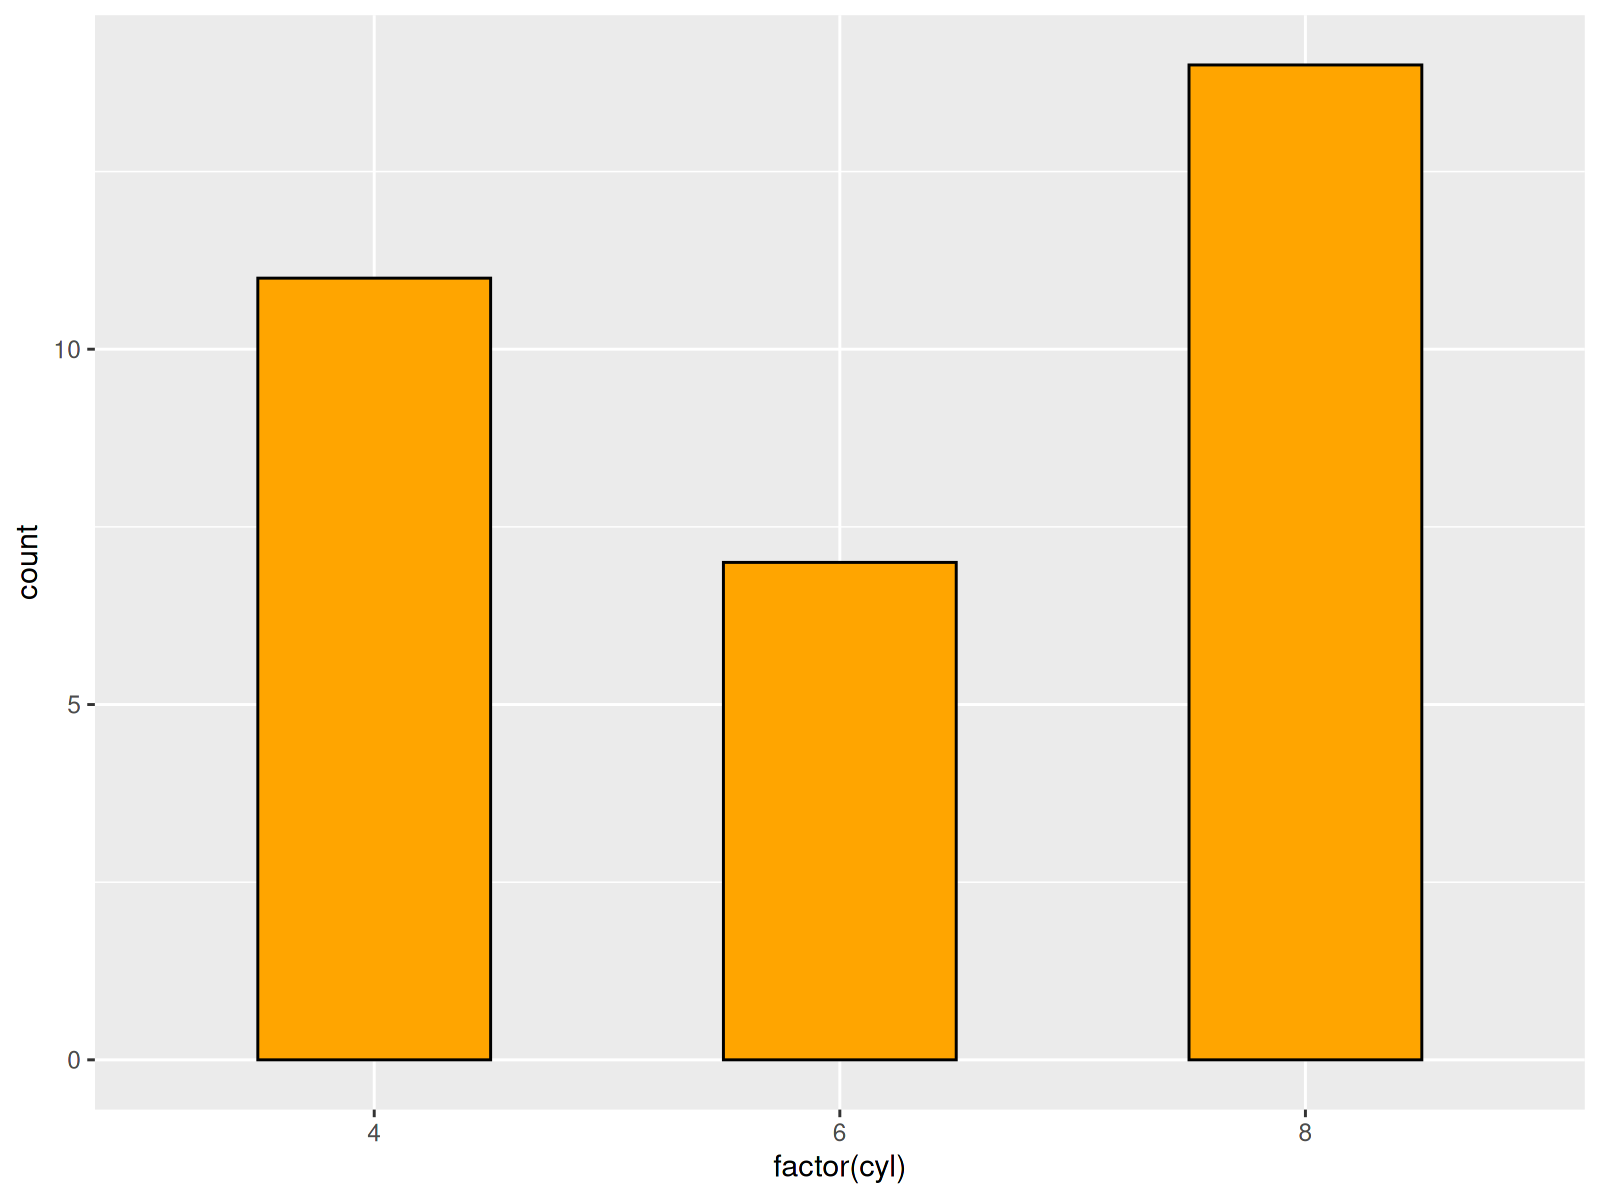

In [79]:
ggplot(data = mtcars, aes(x = factor(cyl))) +
    geom_bar(width = 0.5, color = "black", fill = "orange")

## Bivariat:

### Box-Plot

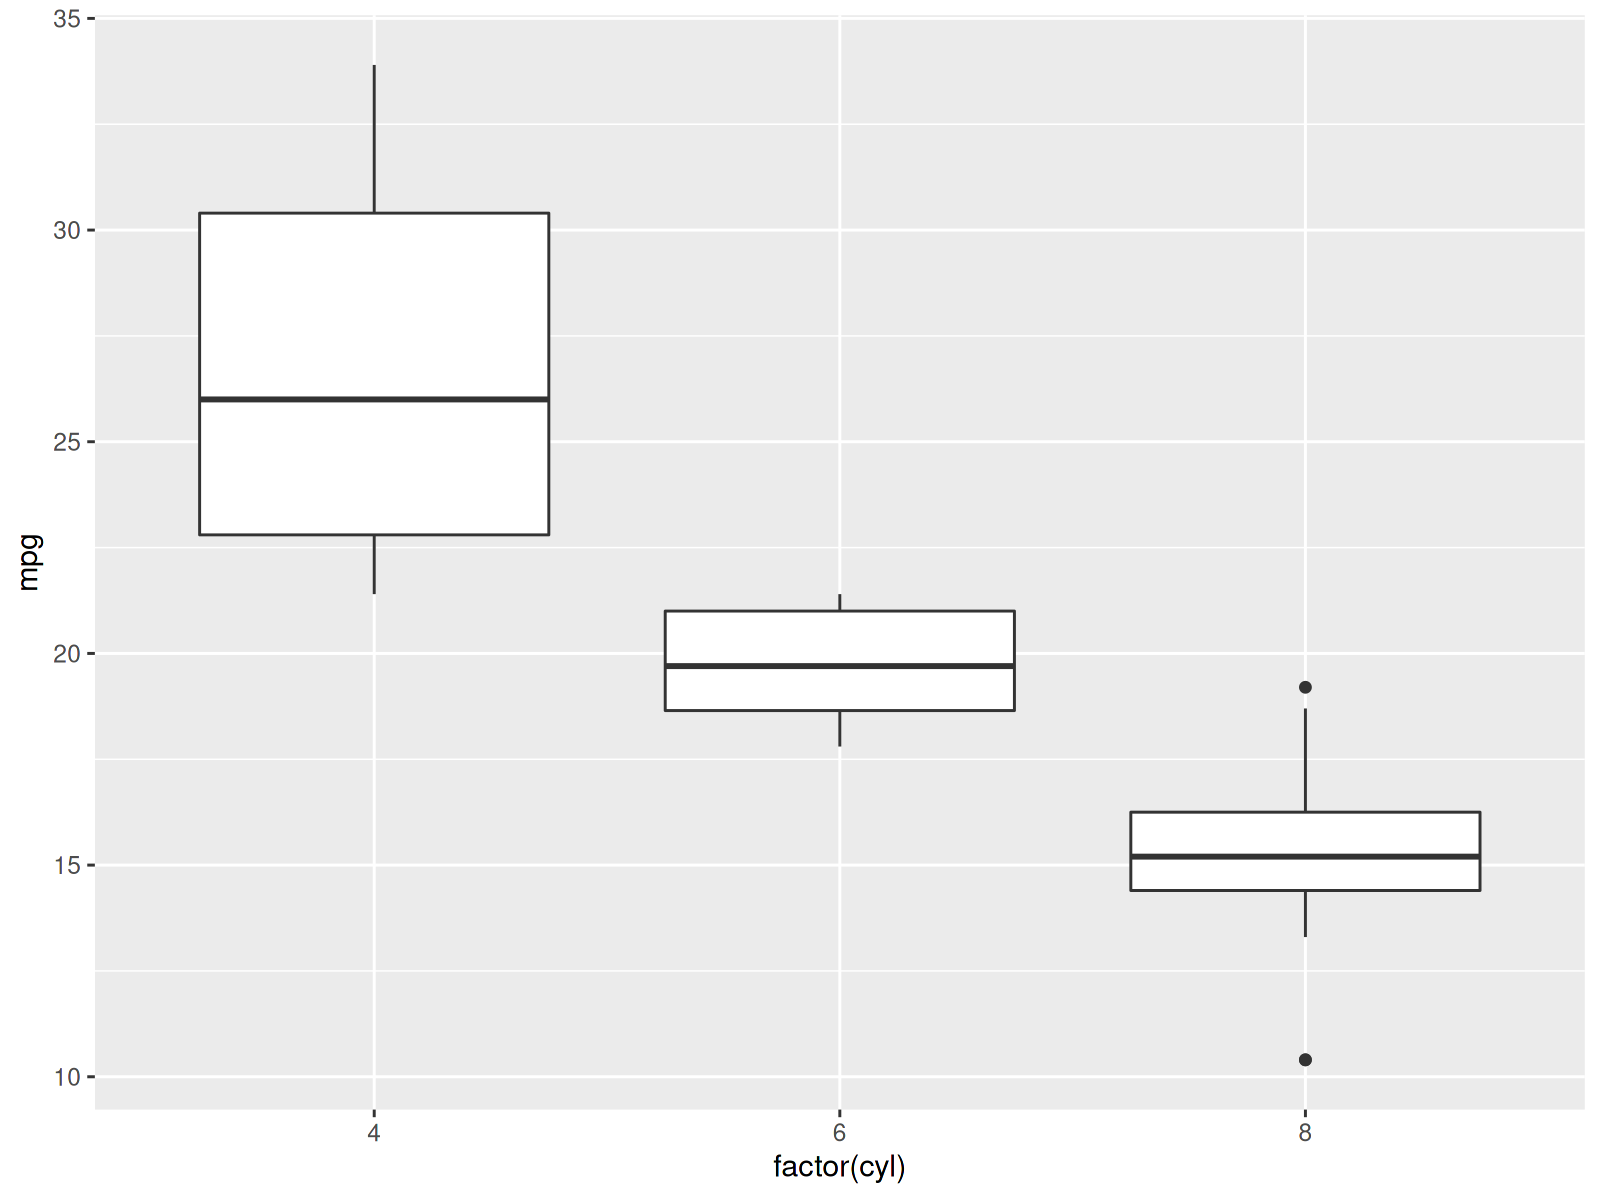

In [48]:
ggplot(data = mtcars, aes(x = factor(cyl), y = mpg)) +
    geom_boxplot()

### Scatter-Plot

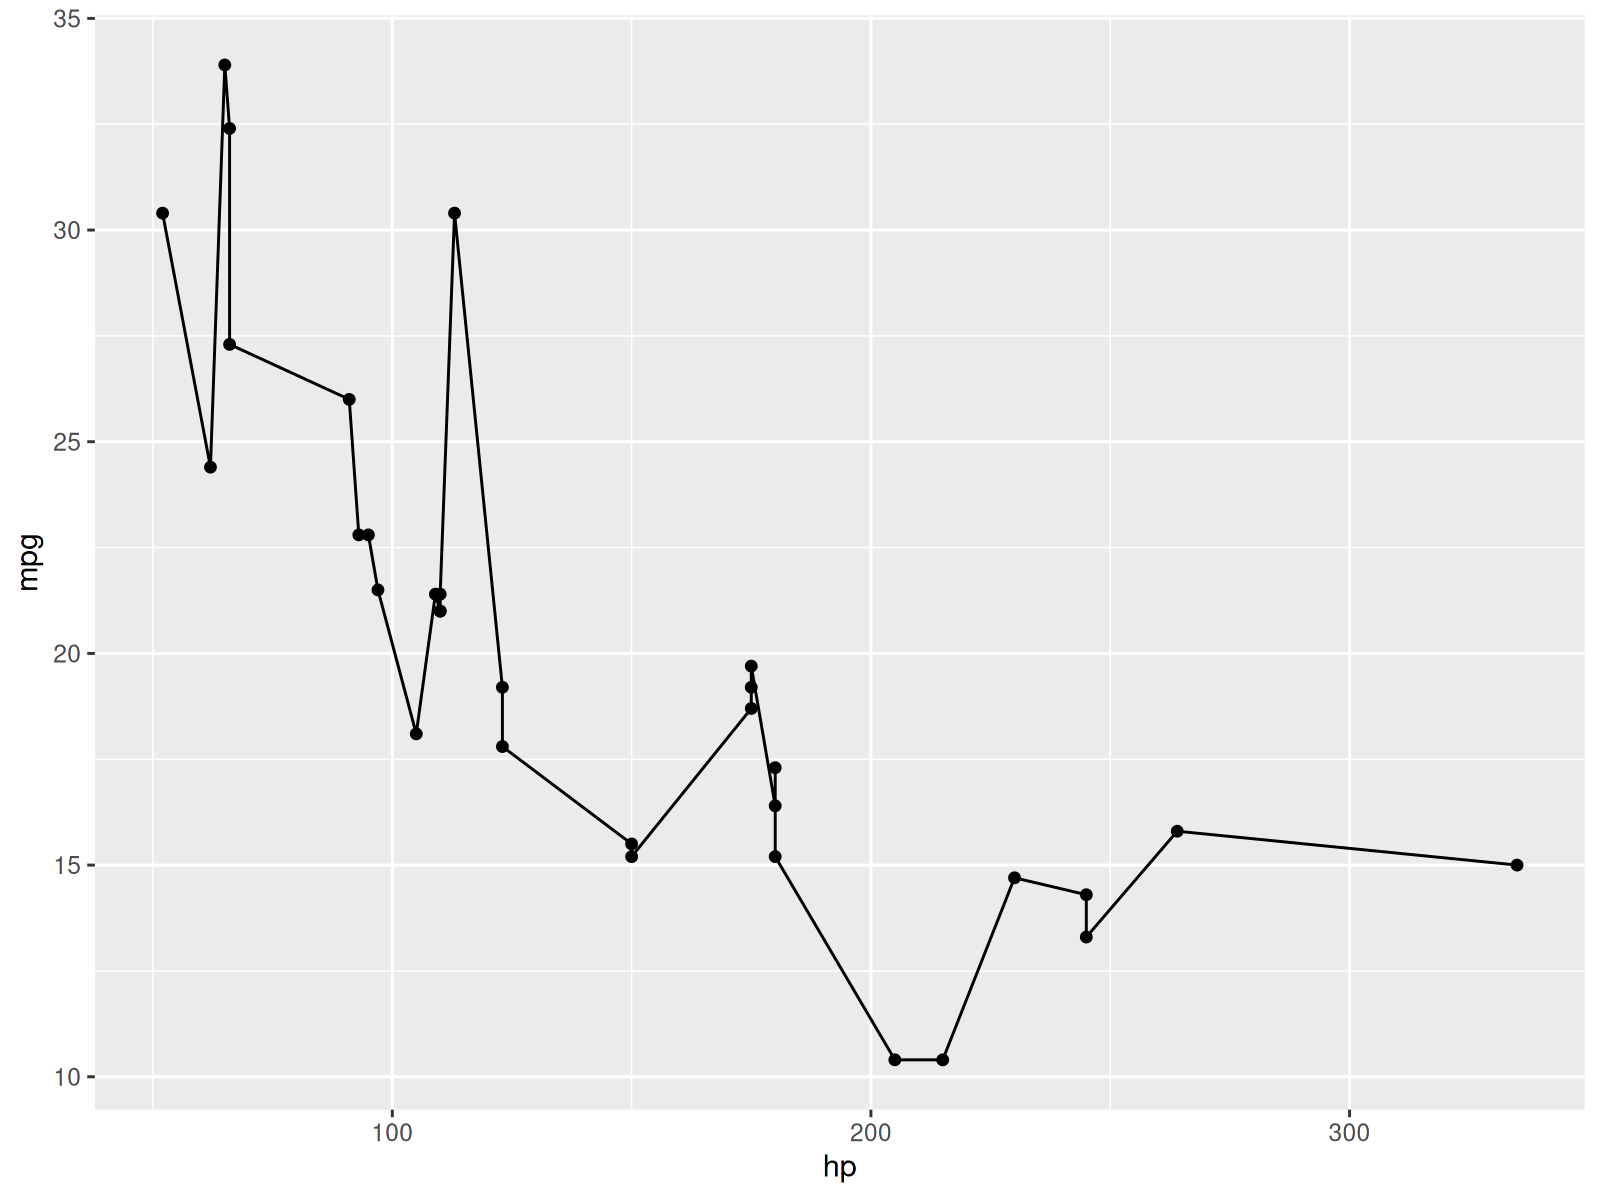

In [81]:
plot <- ggplot(data = mtcars, aes(x = hp, y = mpg)) +
    geom_point() +
    geom_line()
plot

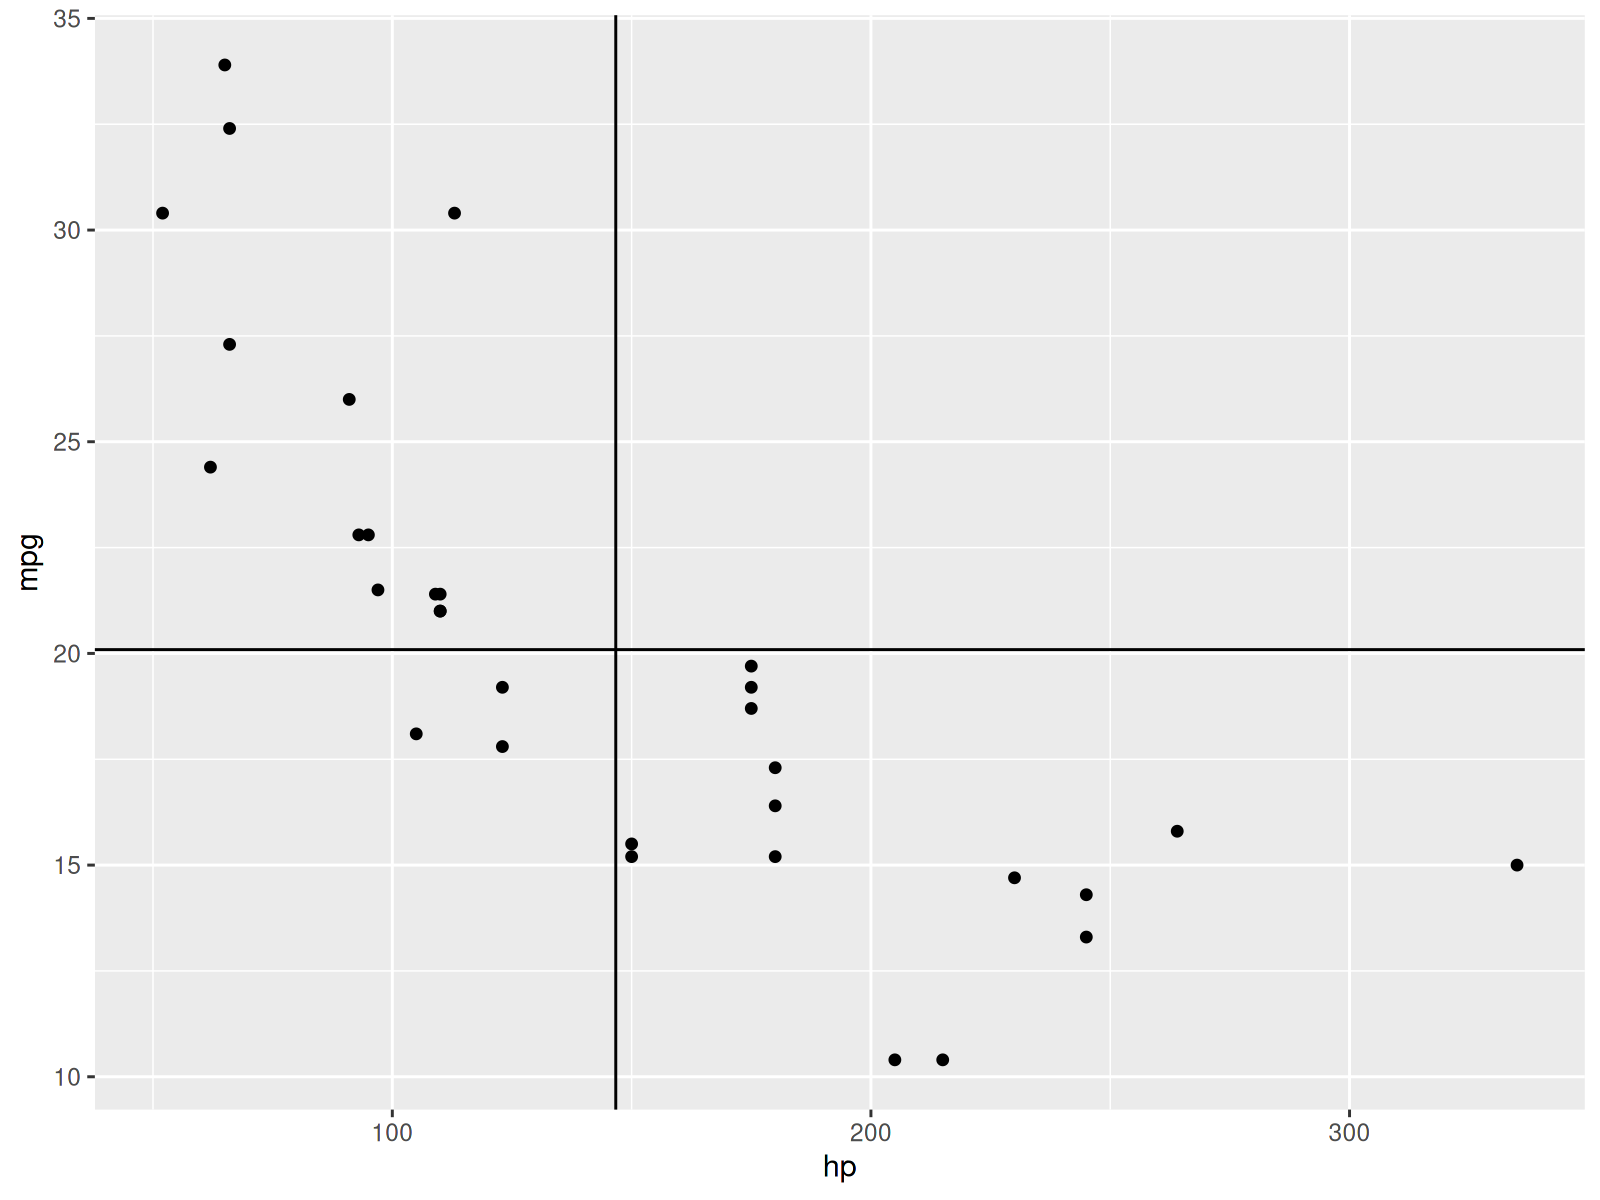

In [82]:
plot <- ggplot(data = mtcars) +
    geom_point(aes(x = hp, y = mpg)) 

plot + 
    geom_hline(aes(yintercept = mean(mpg))) +
    geom_vline(aes(xintercept = mean(hp)))

### Regressions-Plot

`geom_smooth()` using formula 'y ~ x'



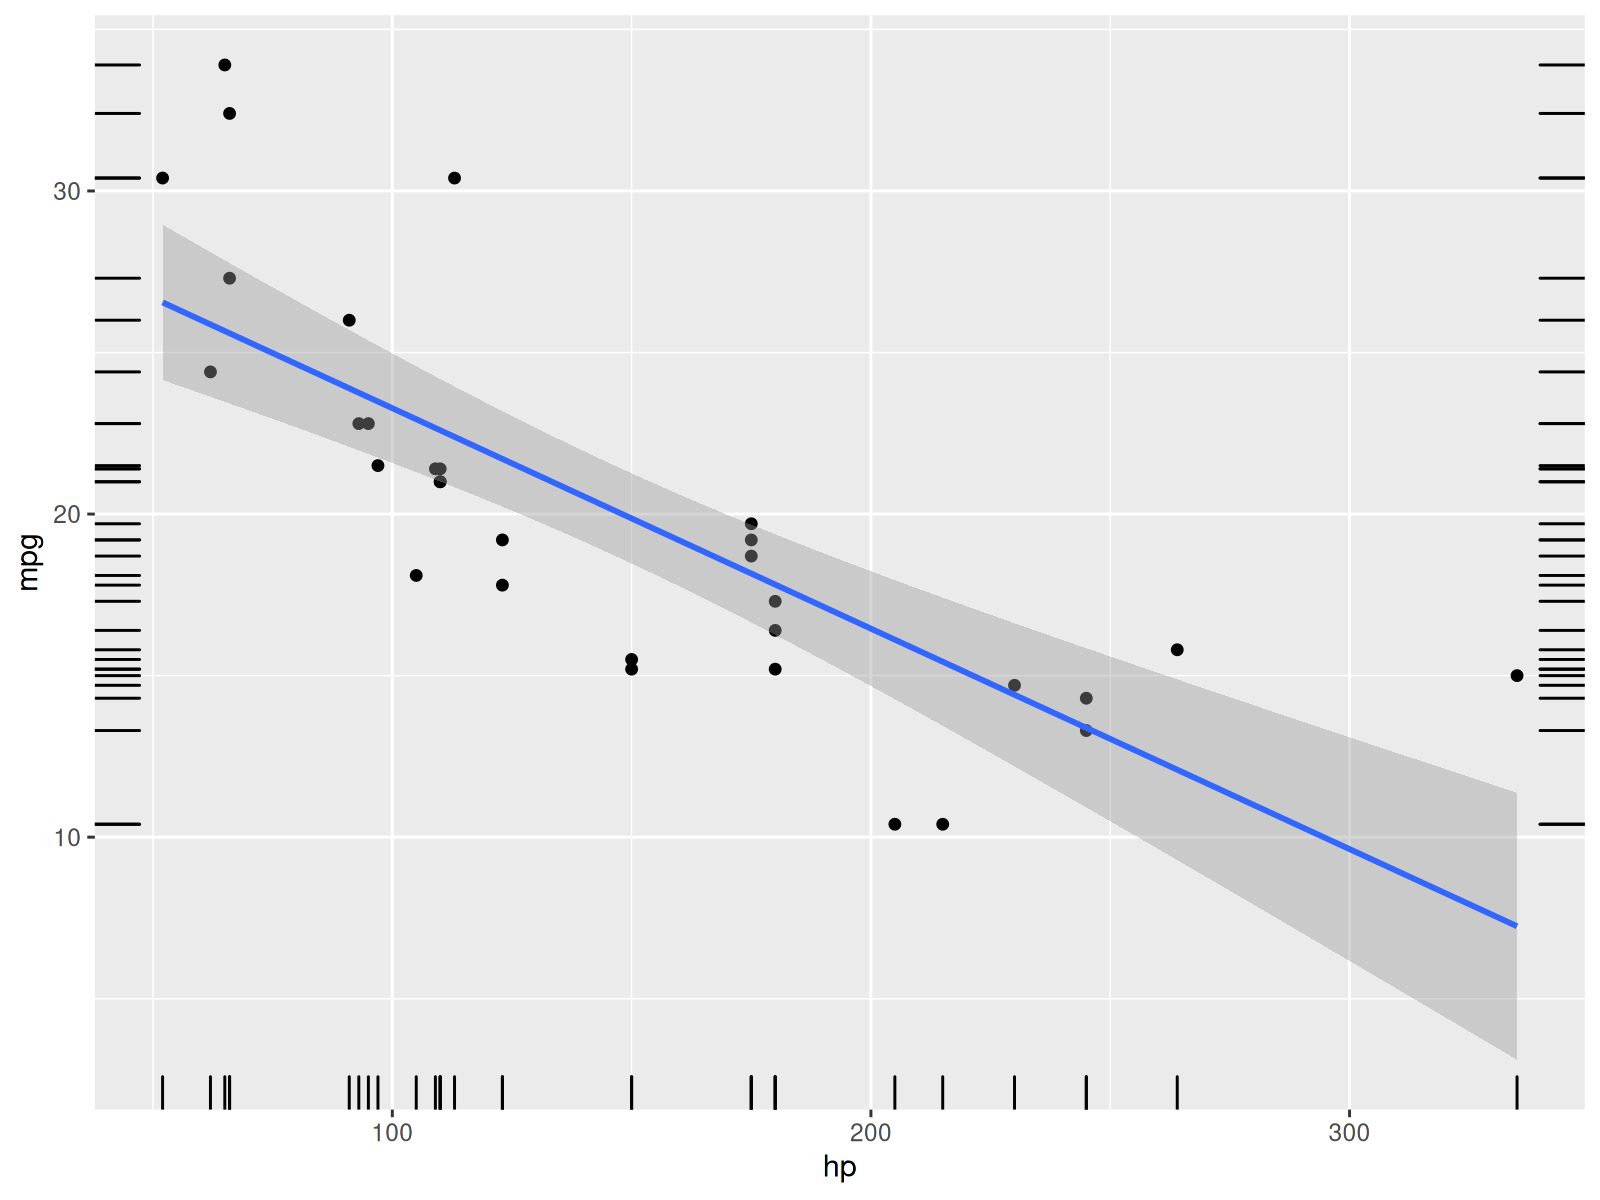

In [83]:
plot <- ggplot(data = mtcars) +
    geom_point(aes(x = hp, y = mpg))

plot +
    geom_smooth(method = "lm", aes(x = hp, y = mpg)) +
    geom_rug(aes(y = mpg, x = hp), sides = "lrb")

### Funktion

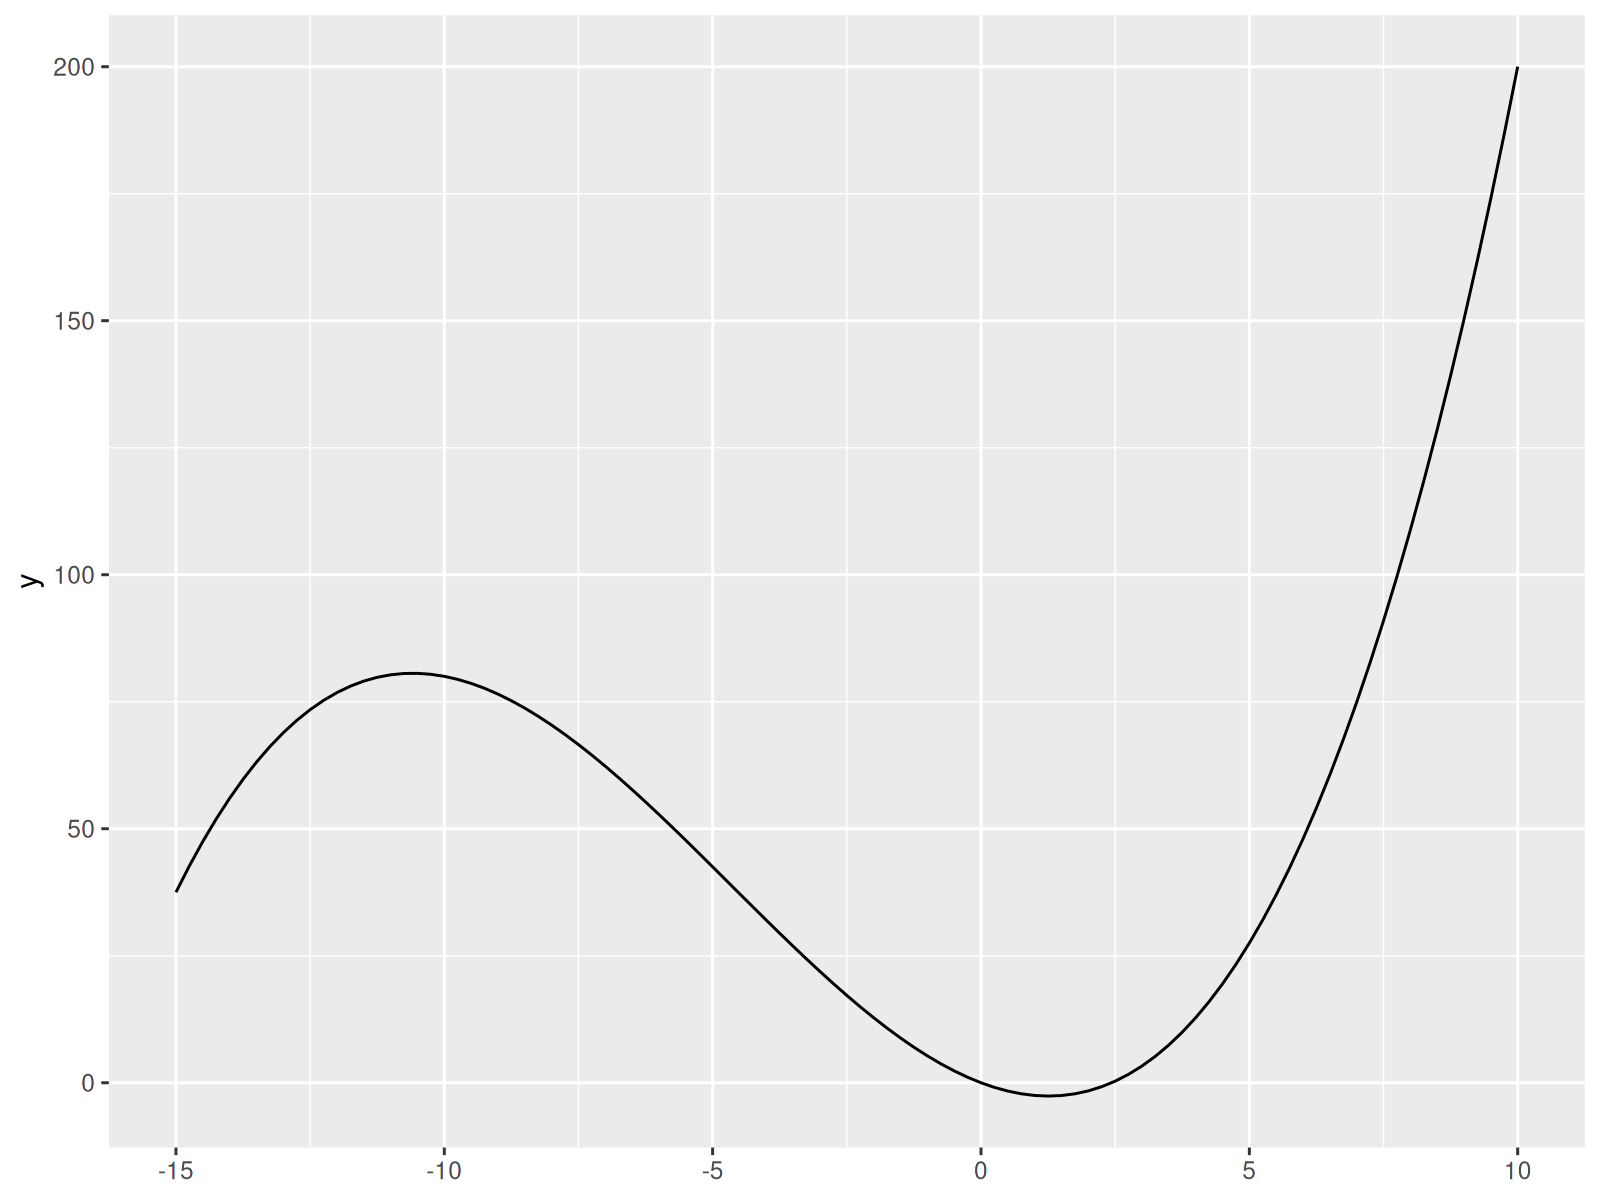

In [52]:
fun <- function(x) {0.1 * x^3 + 1.4 * x^2 - 4 * x}

ggplot() +
    geom_function(fun = fun, xlim = range(-15, 10))

### Zeitreihen-Plots

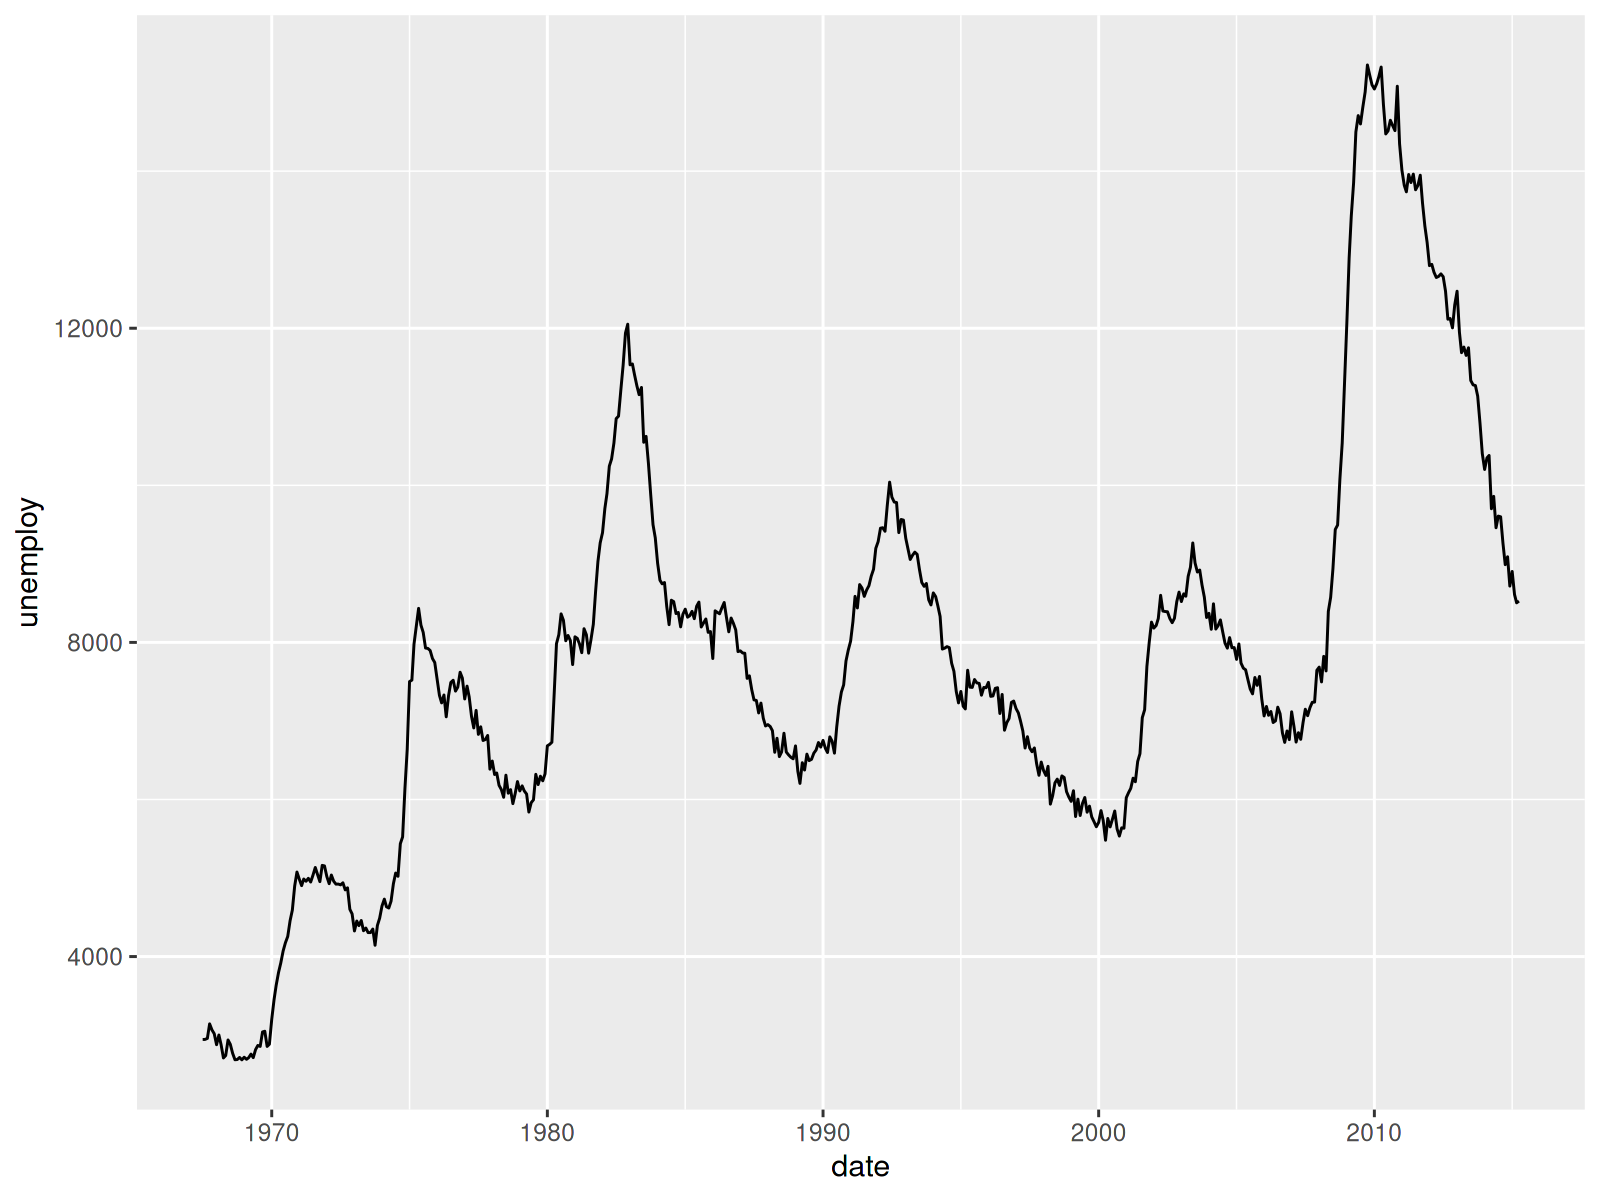

In [53]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy))

plot +
    geom_line()

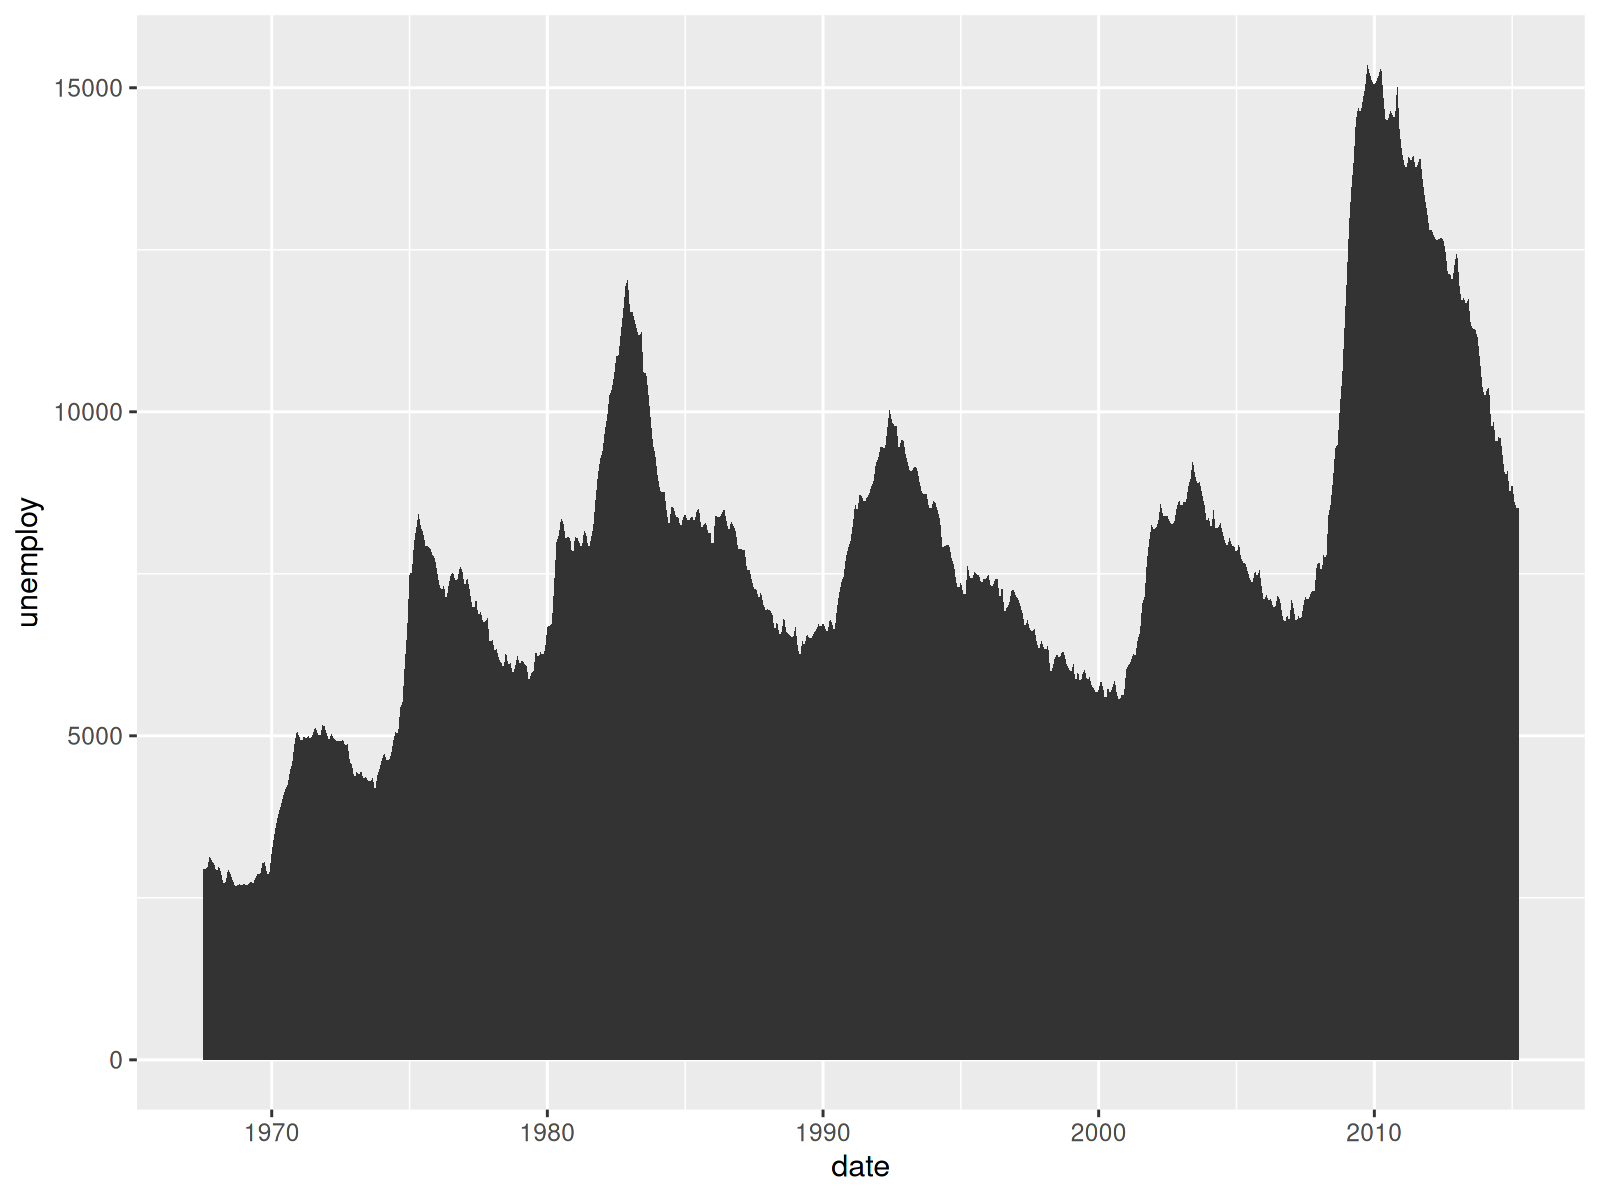

In [54]:
plot <- ggplot(economics, aes(x = date, y = unemploy))

plot +
    geom_area()


## Sonstiges

### Maps

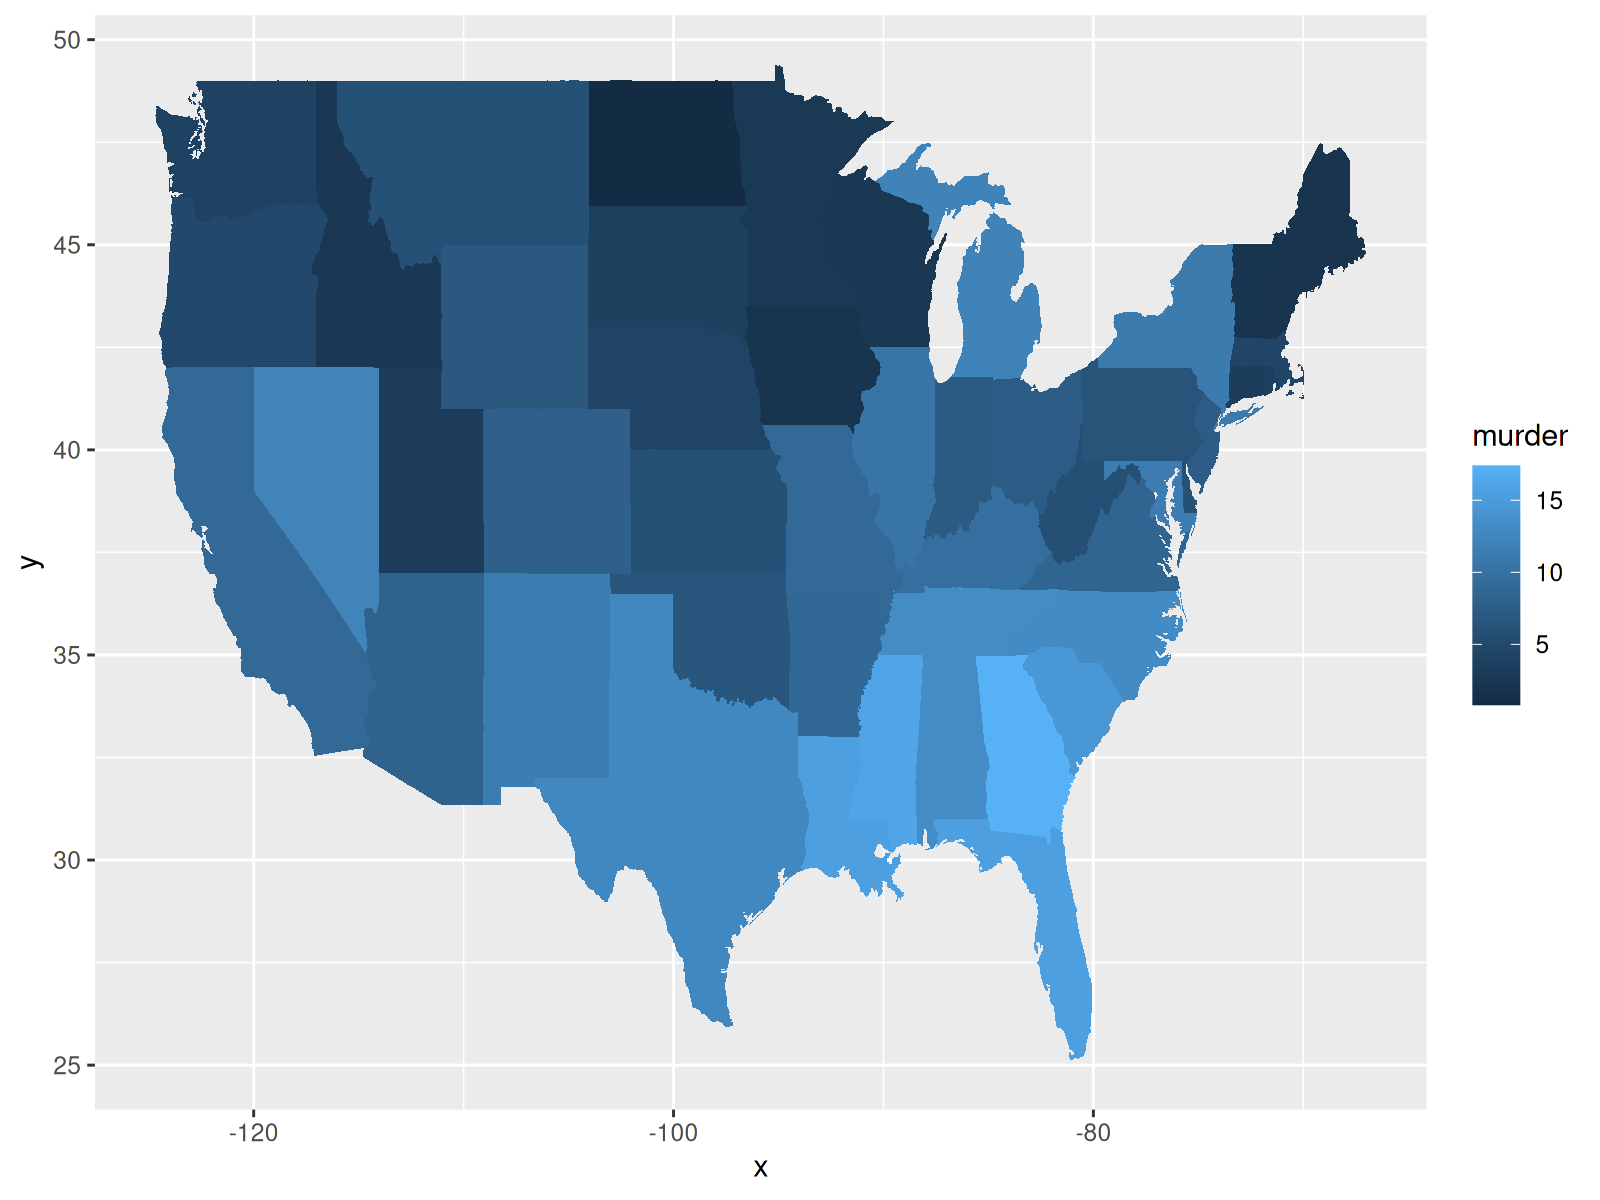

In [55]:
library(maps)
data("USArrests")
data <- data.frame(murder = USArrests$Murder, 
                   state = tolower(rownames(USArrests)) )
map <- map_data("state")
ggplot(data, aes(fill = murder)) +
    geom_map(aes(map_id = state), map = map) +
    expand_limits(x = map$long, y = map$lat)

***

# Koordinatensystem: coords und scale

## coords

### Normal

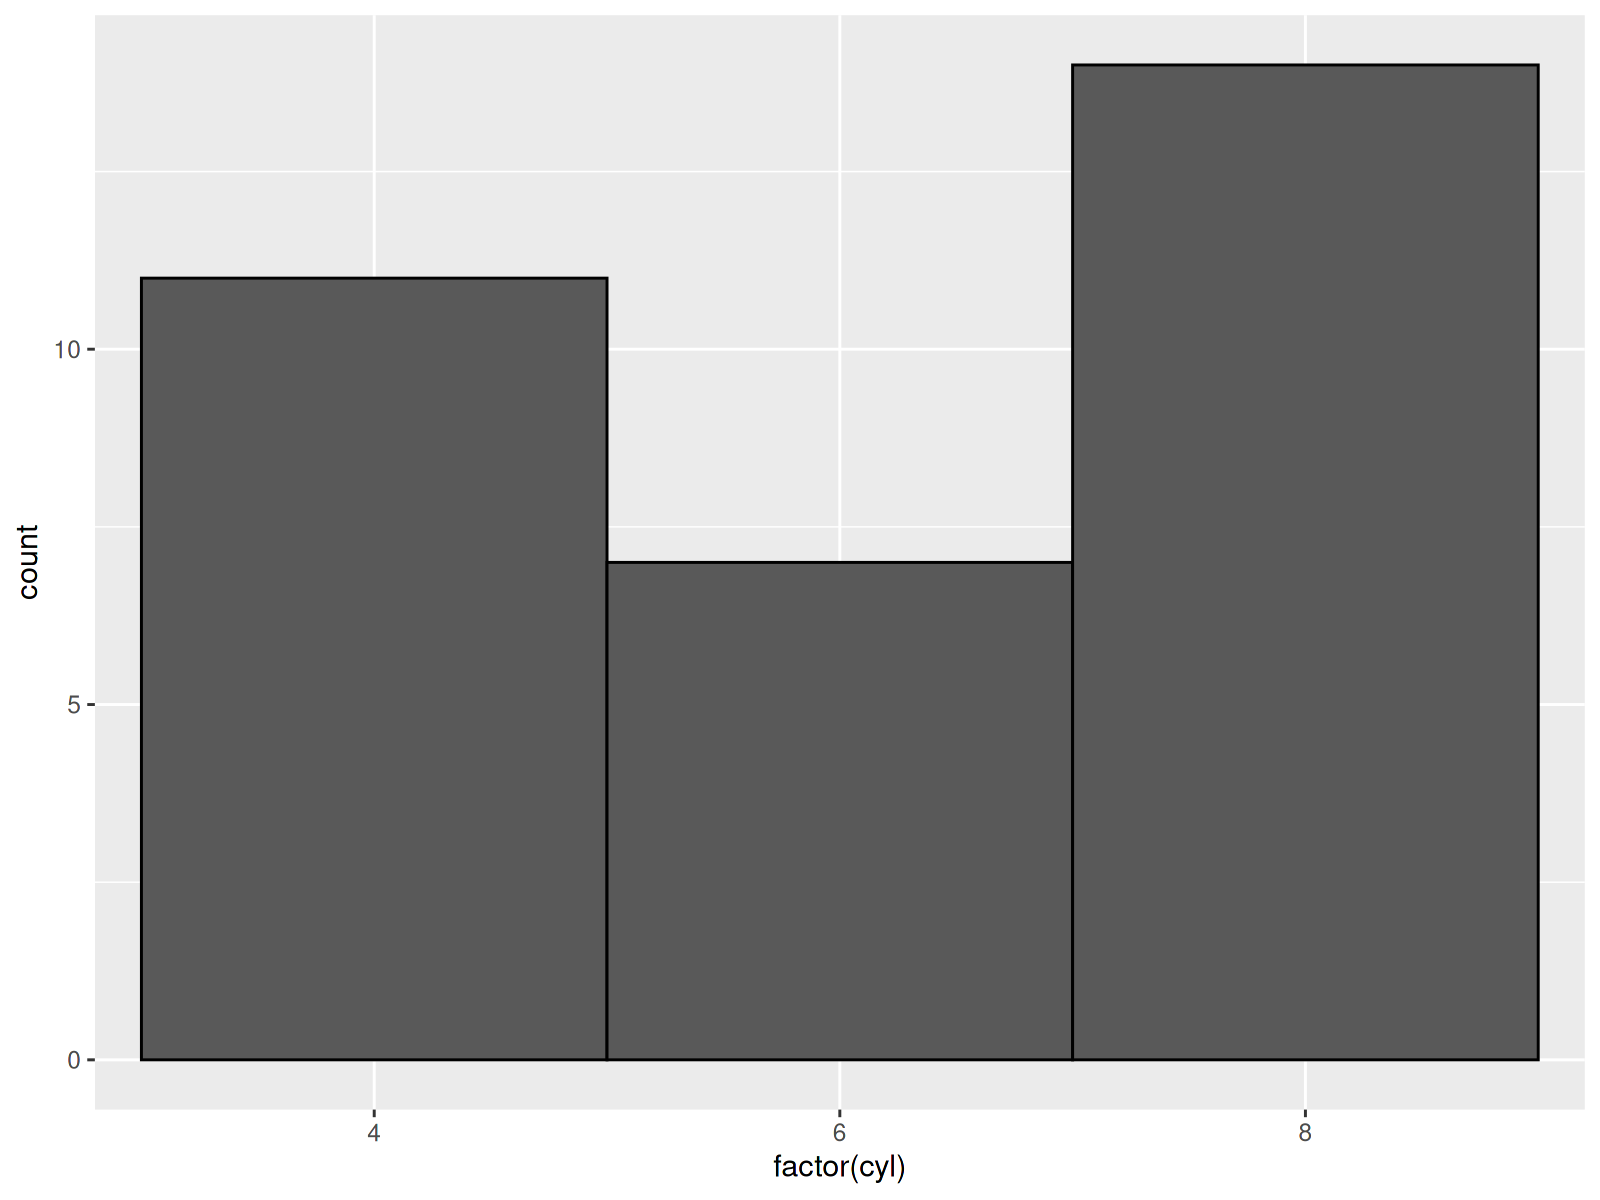

In [56]:
plot <- ggplot(mtcars, aes( x = factor(cyl))) +
  geom_bar(width = 1, color = "black")

plot

### Flip

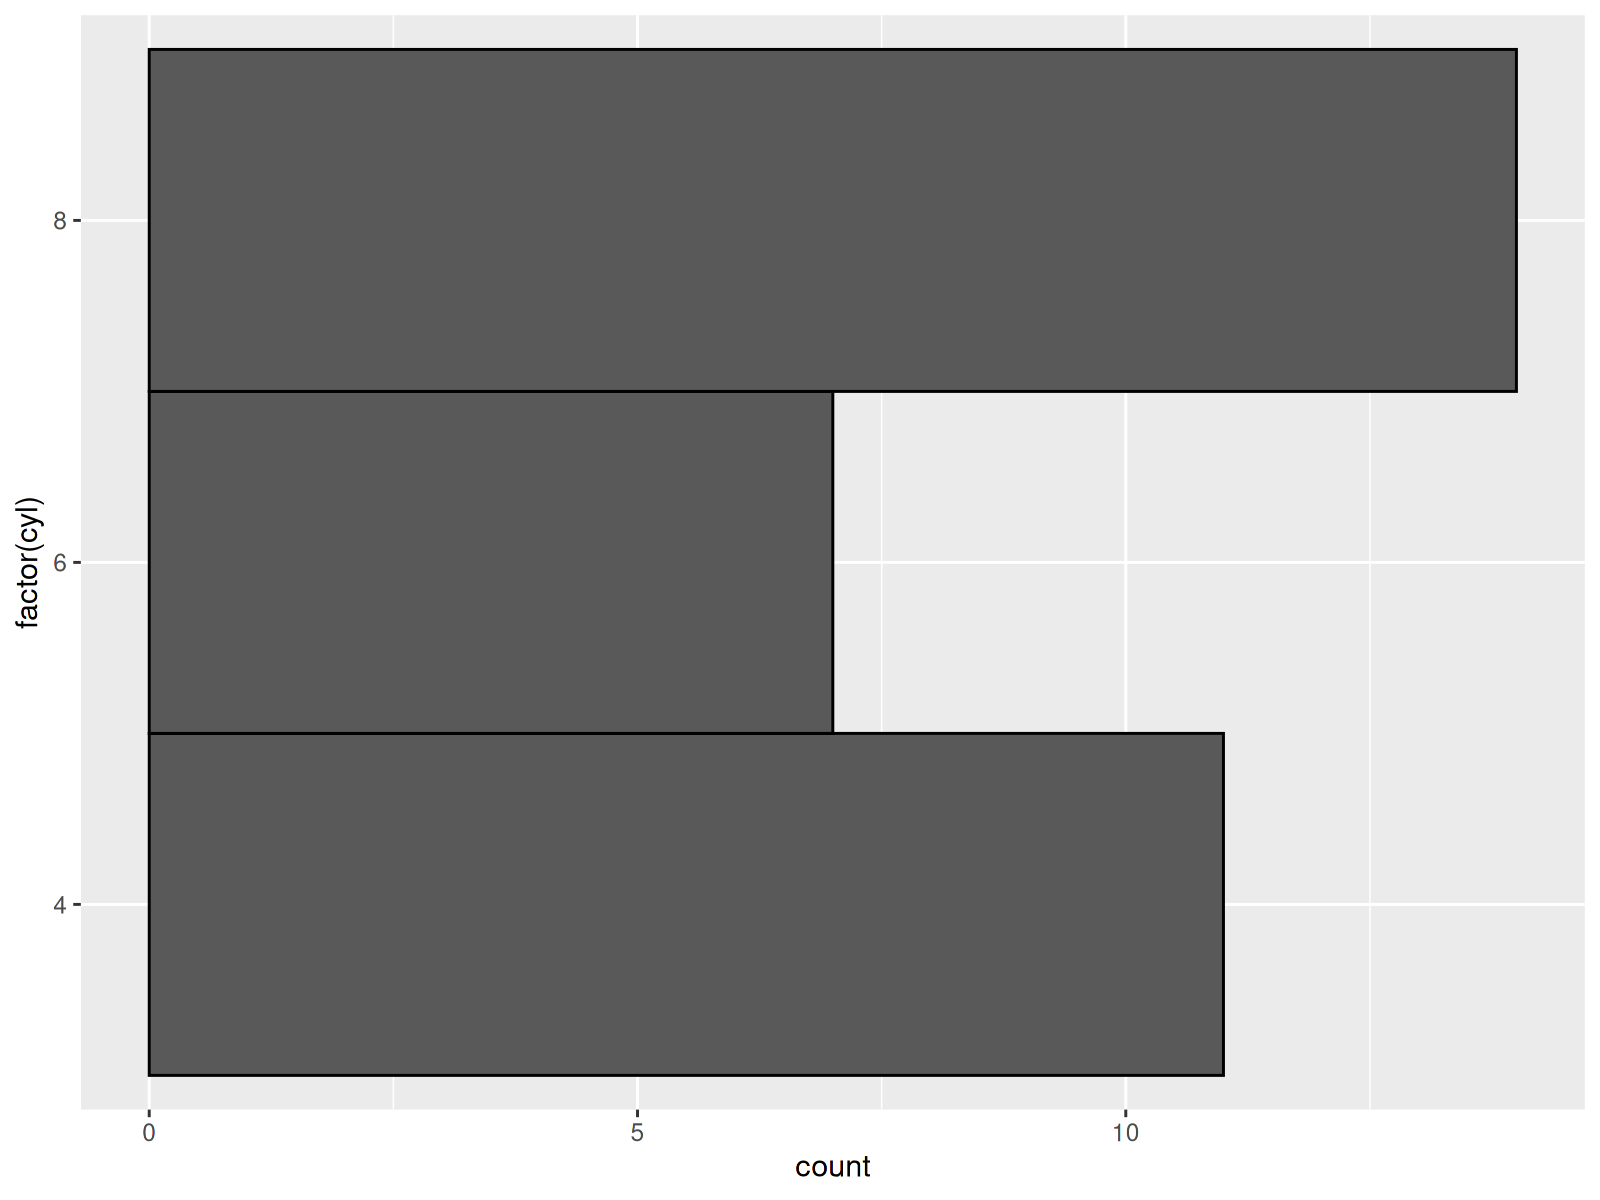

In [57]:
plot <- ggplot(mtcars, aes( x = factor(cyl))) +
  geom_bar(width = 1, color = "black")

plot +
  coord_flip()

### Polar

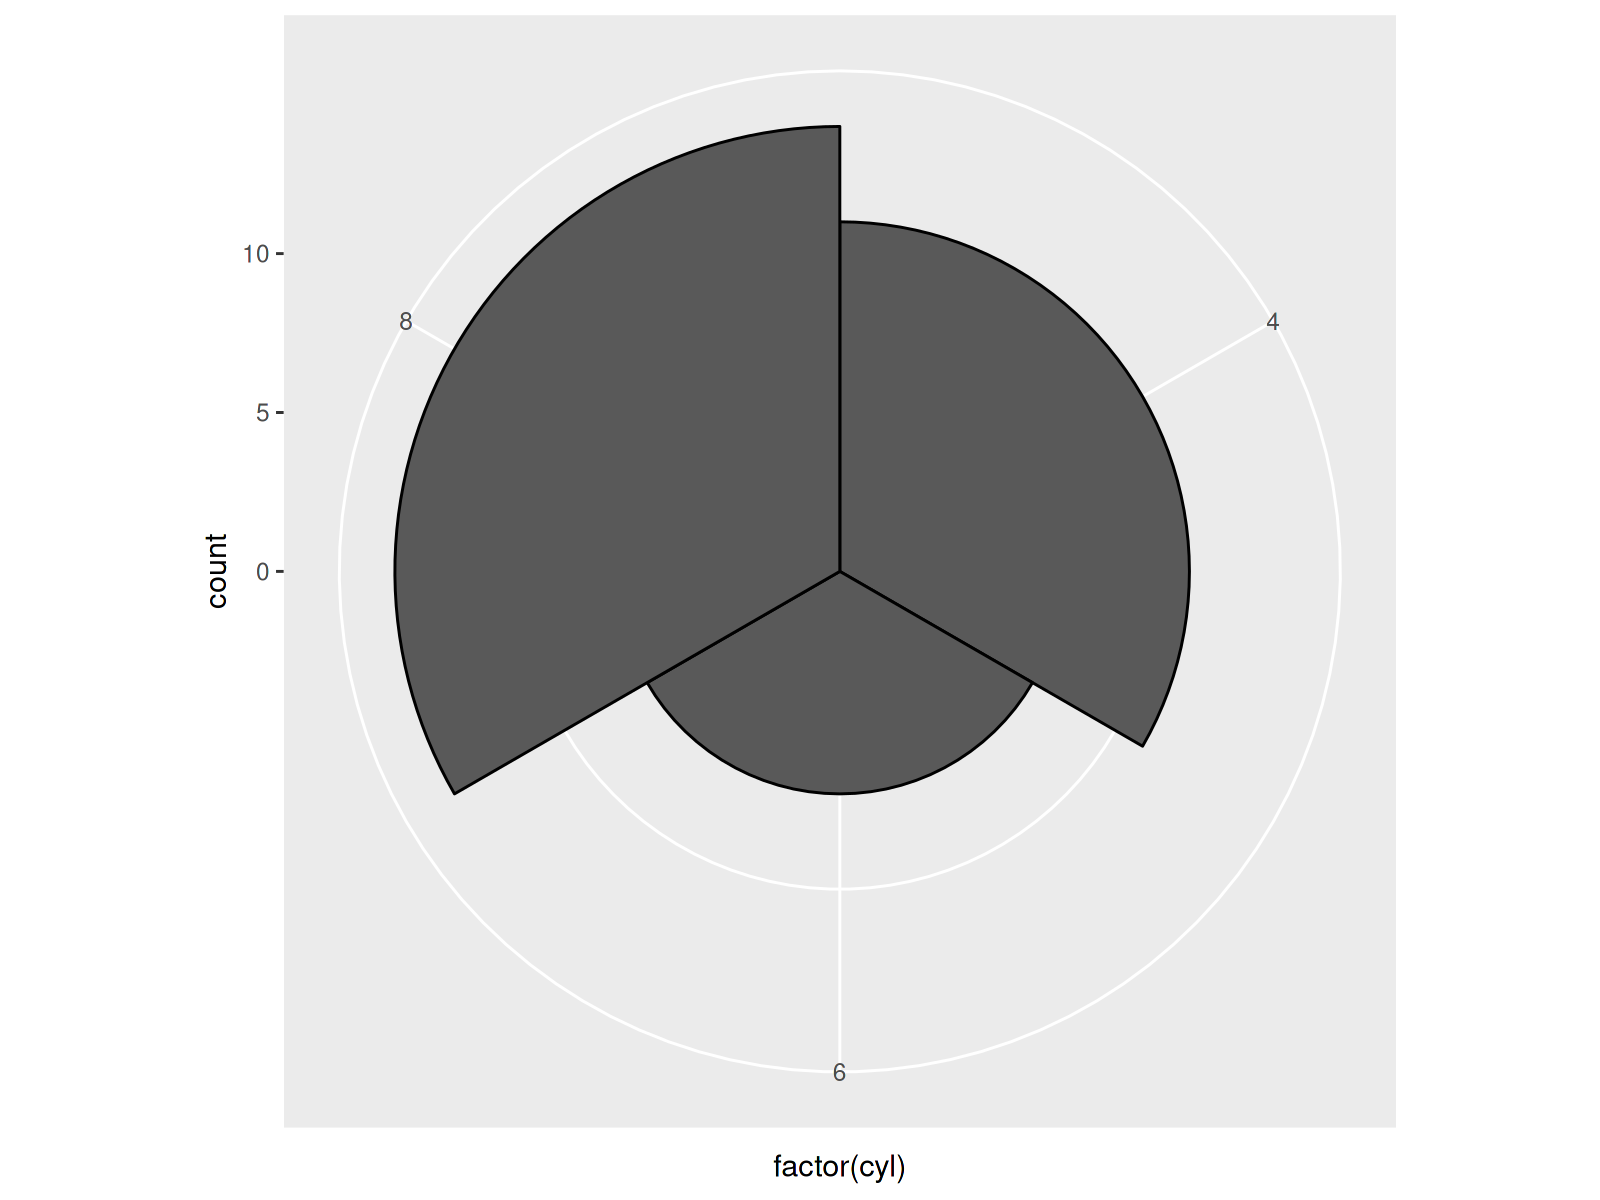

In [58]:
plot <- ggplot(mtcars, aes( x = factor(cyl))) +
  geom_bar(width = 1, color = "black")

plot +
  coord_polar()

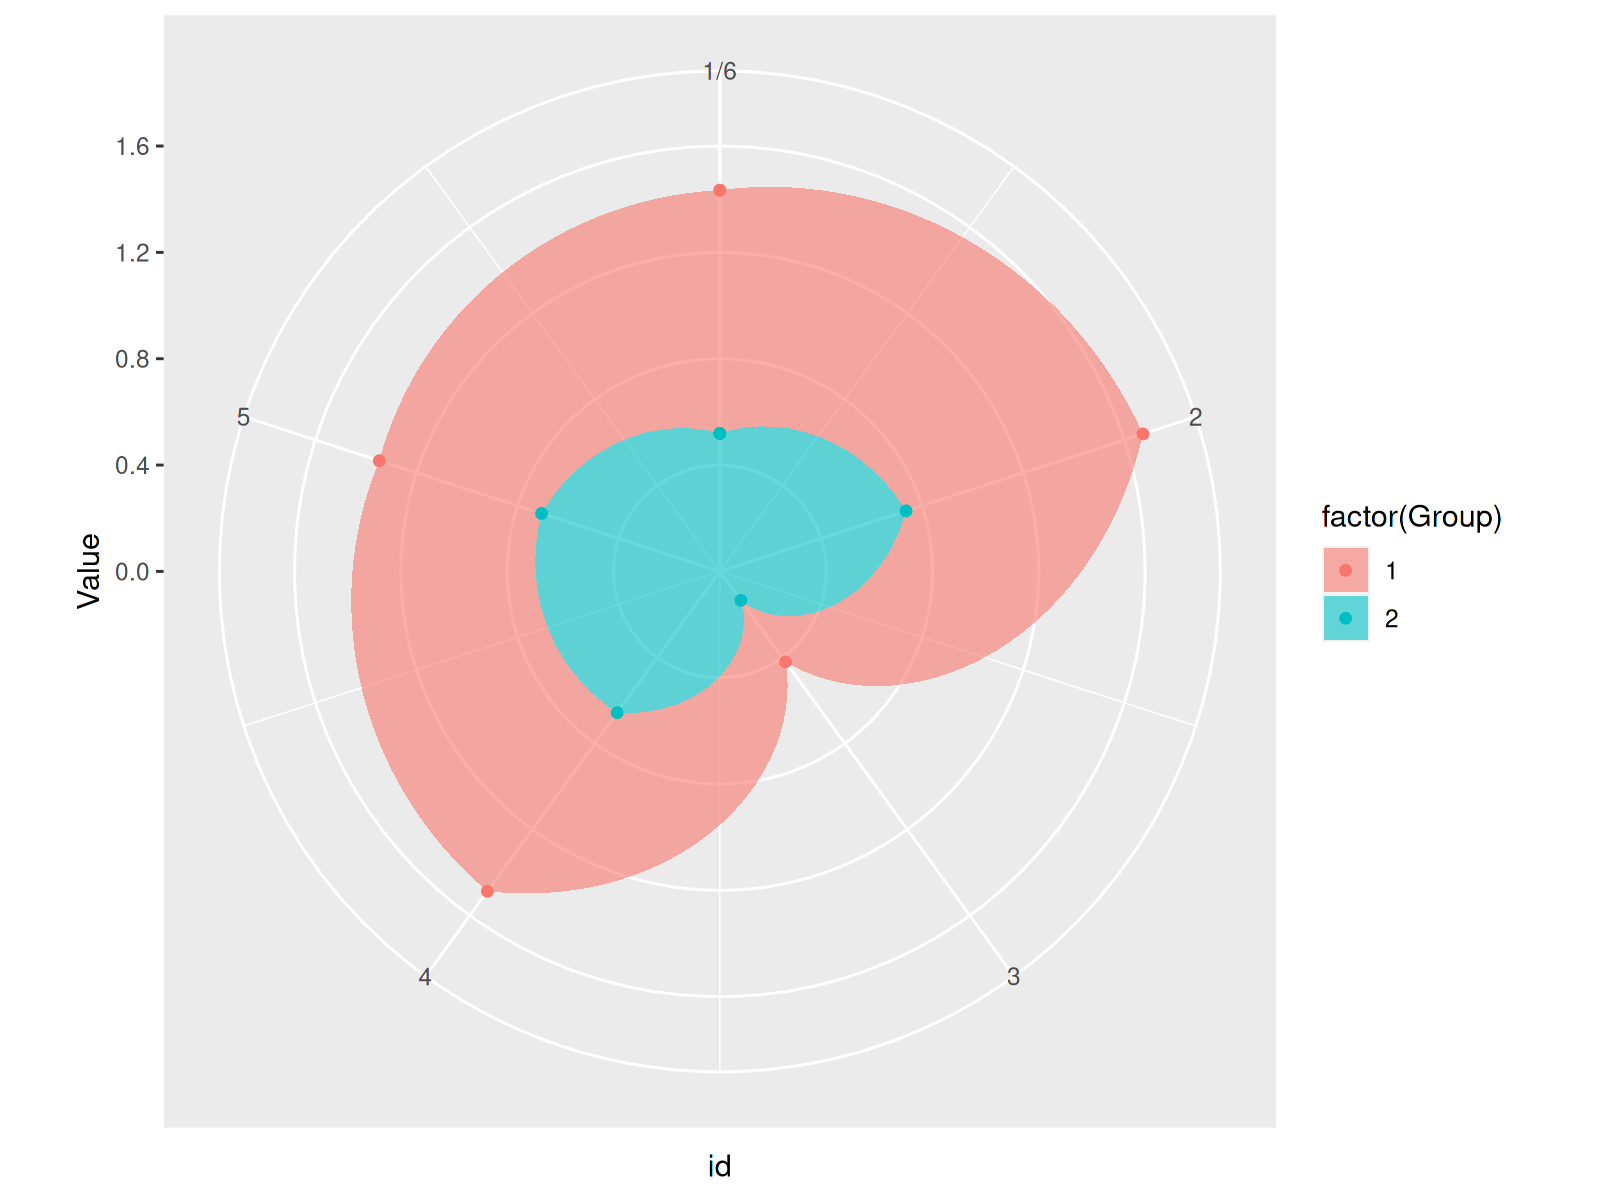

In [59]:
# Datengenerierung
set.seed(42)
data <- data.frame(Obs1 = runif(5, 0, 1), 
                   Obs2 = runif(5, 0, 1))

data <- rbind(data, data[1, ])

data.long <- reshape(data, 
                     varying = c("Obs1", "Obs2"), 
                     v.names = c("Value"),
                     direction = "long",
                     timevar = "Group")

# Plot
ggplot(data.long) +
  geom_area(aes(x = id, y = Value, fill = factor(Group)), alpha = 0.6) +
  geom_point(aes(x = id, y = Value, color = factor(Group)), position = "stack") +
  coord_polar(theta = "x")

## scale

-   ggplot unterscheidet i.d.R. selbständig zwischen diskreter und stetiger Skalierung, dies kann dennoch auch vorgegeben werden

-   interessanter an dieser Stelle: Skalierung erlaubt Beeinflussung von Darstellungsbereich, "Breaks", Achsen-Skalierung, etc.

### Achsenskalierung

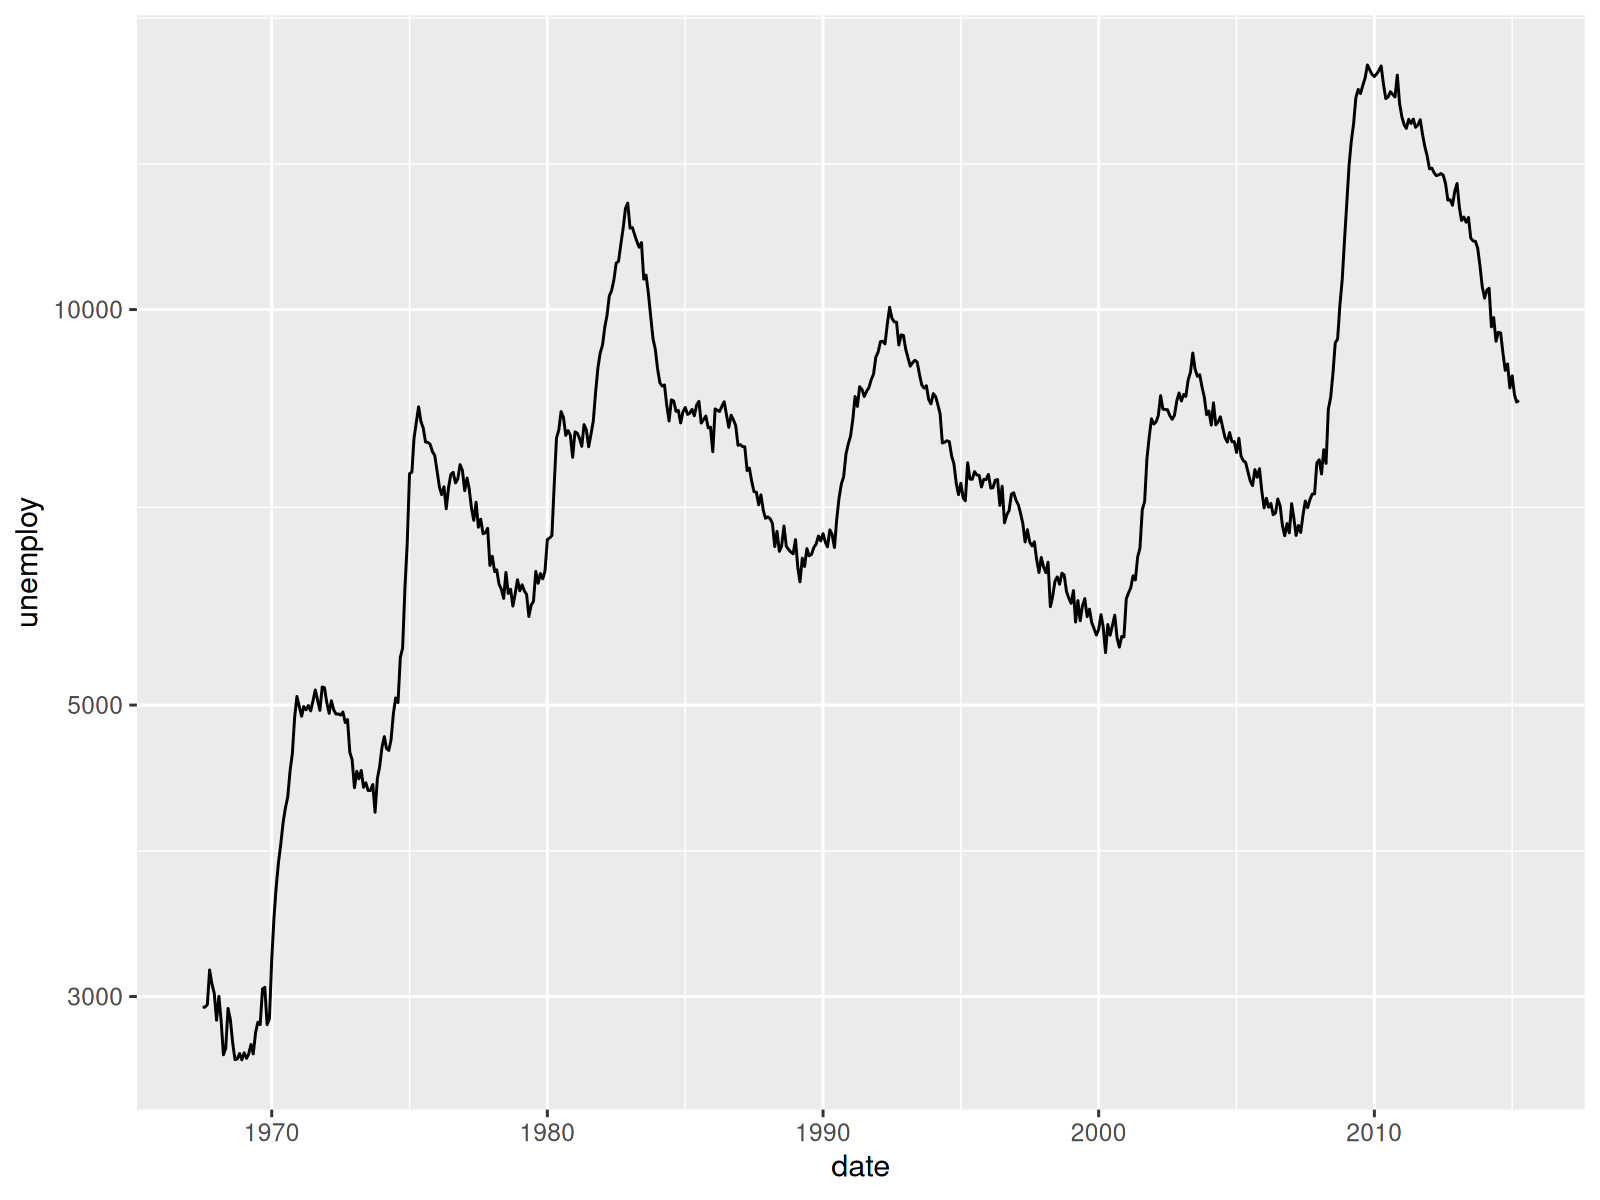

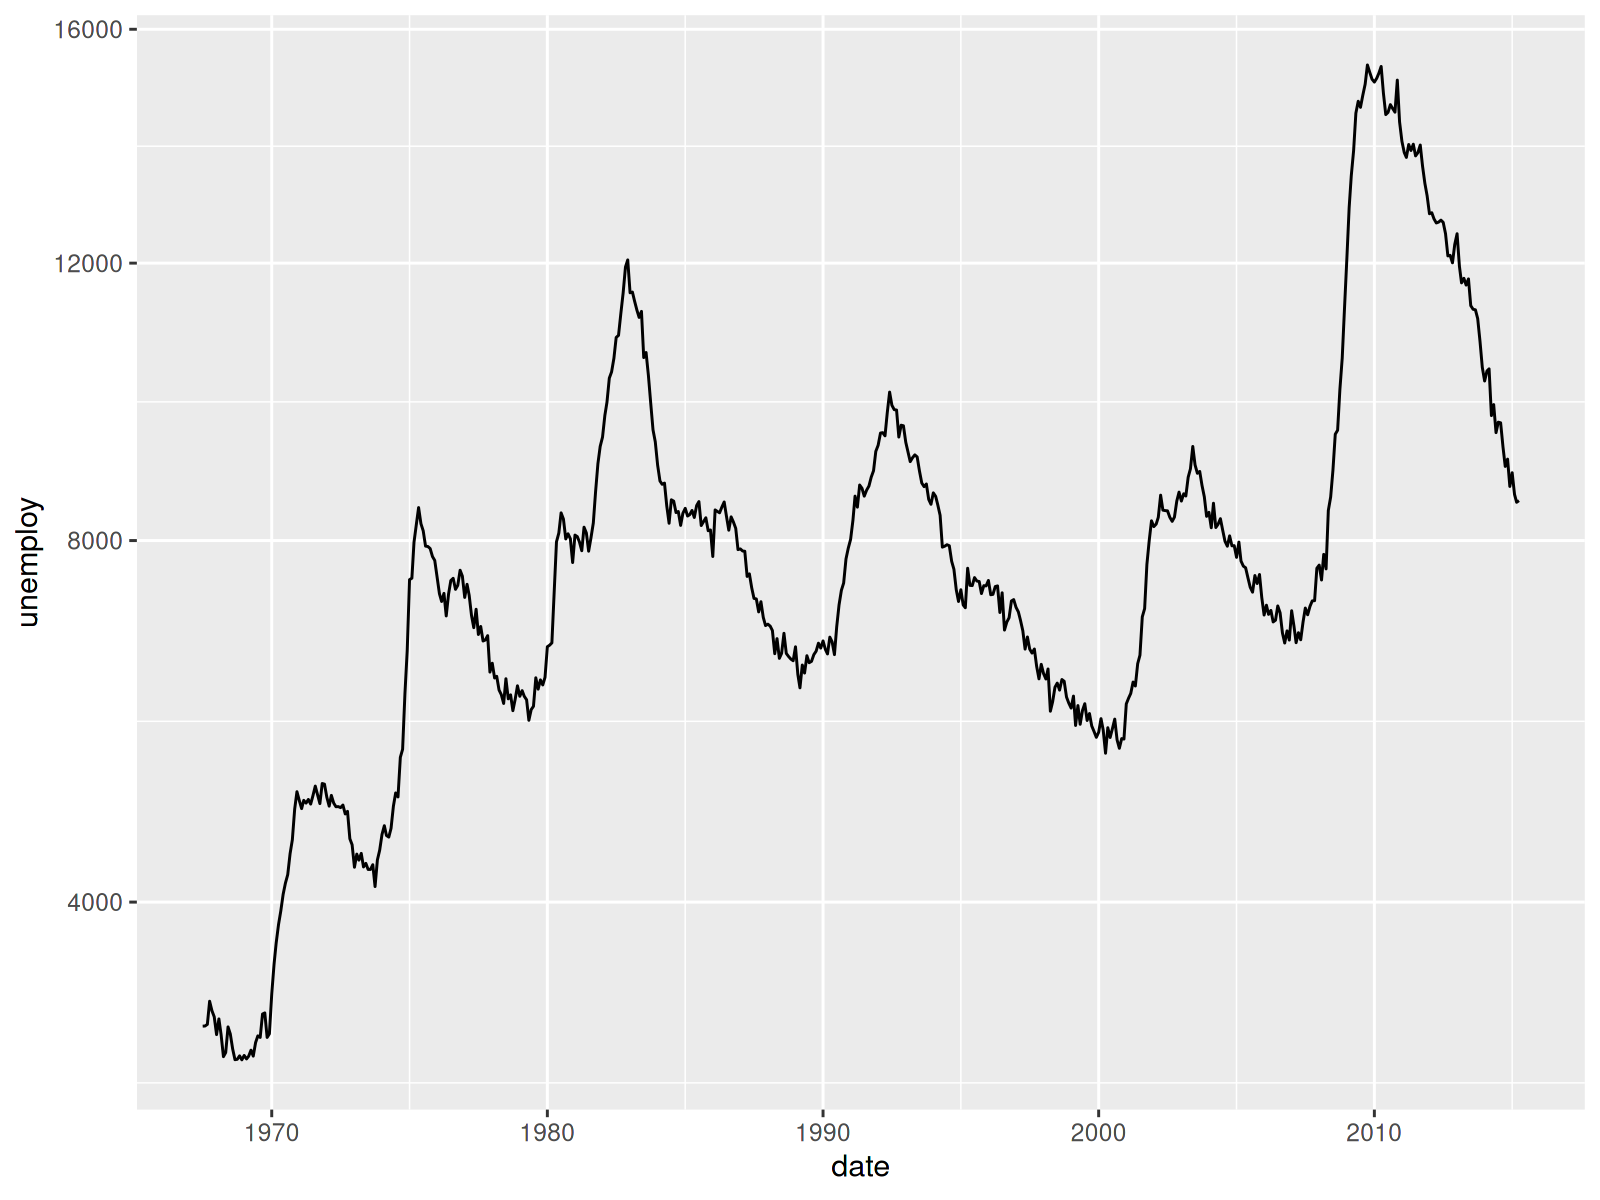

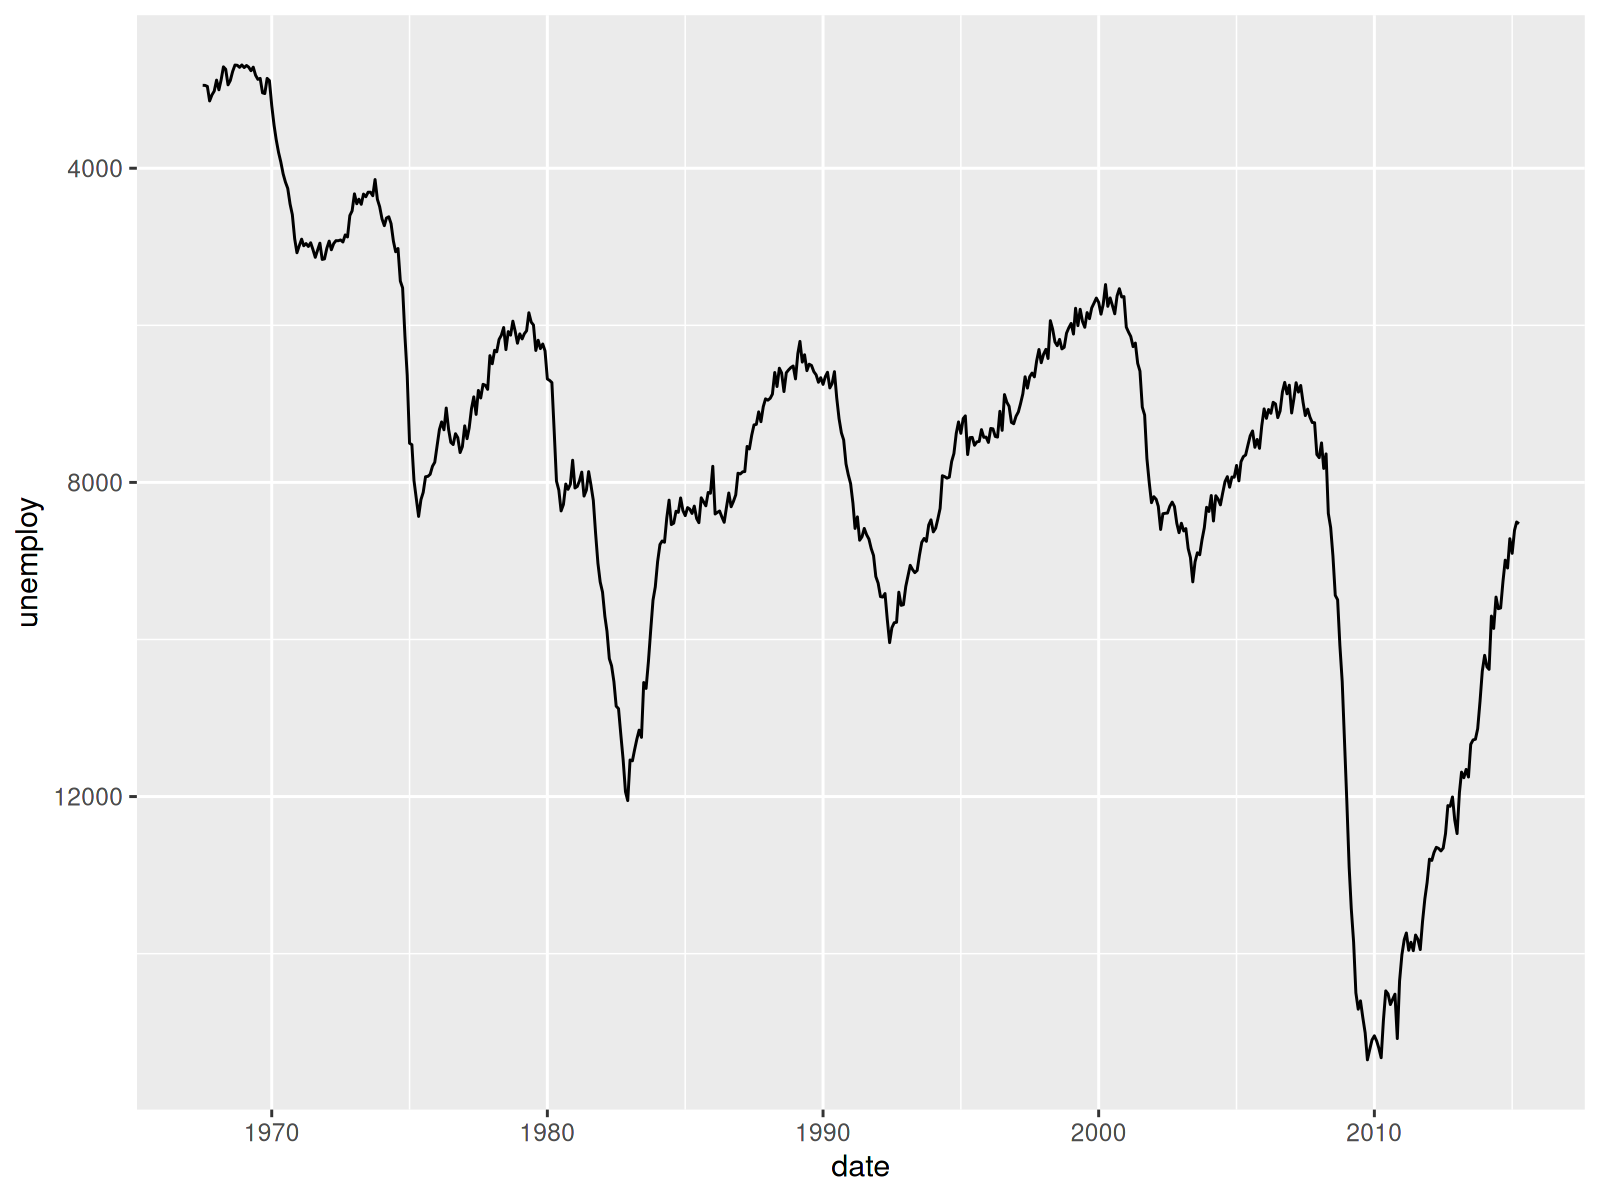

In [60]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()

plot +
  scale_y_log10()

plot +
  scale_y_sqrt()

plot +
  scale_y_reverse()

Hier sieht man wie sich einfach durch Addition der entsprechenden `scale_*`-Funktion auf der Y-Achse z.B. eine logarithmische- oder Wurzel-Skalierung umsetzen lässt.

### Darstellungsbereich

Lässt sich grundsätzlich über zwei verschiedene Ansätze lösen:
1. Einschränkung der Skala mit `scale_*`-Funktion: Funktioniert wie ein Filter für die Daten
2. Einschränkung des Koordinatensystems `coord_*`-Funktion: Funktioniert wie "Zoomen" (alle nicht geplotteten Daten werden trotzdem berücksichtigt)

Warning message:
“Removed 453 row(s) containing missing values (geom_path).”


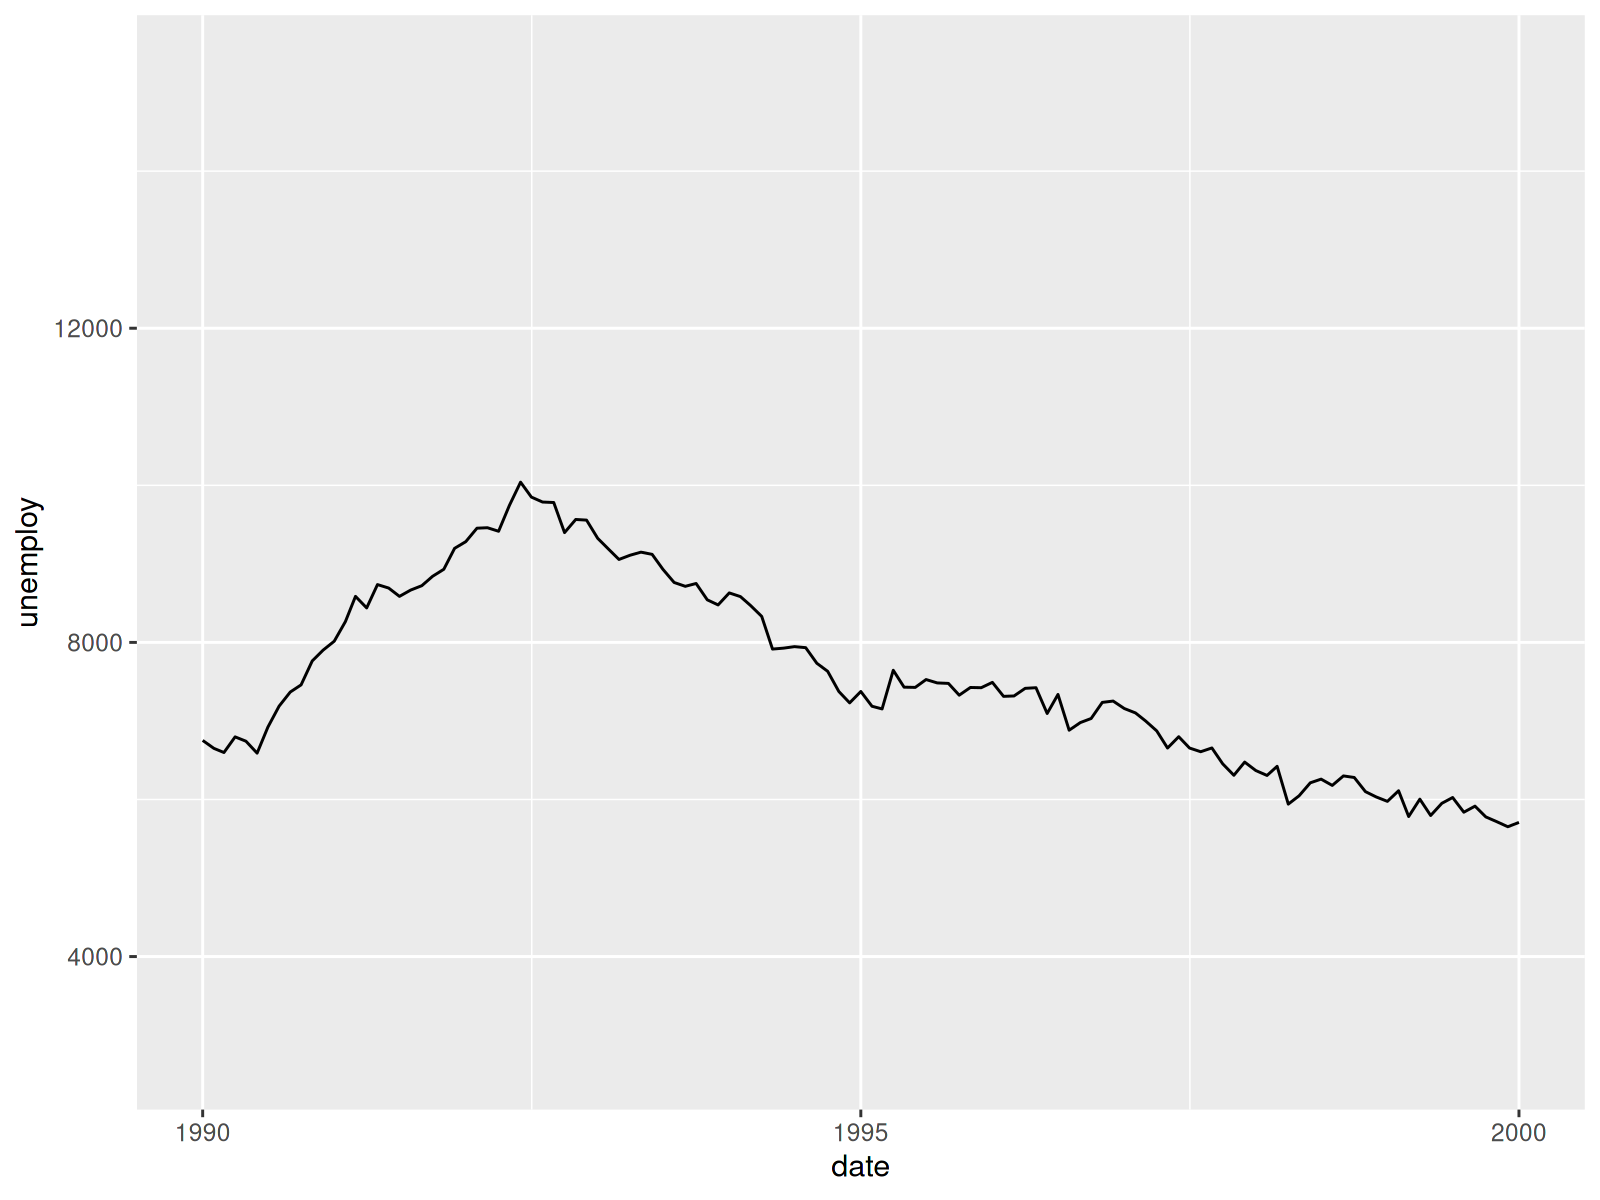

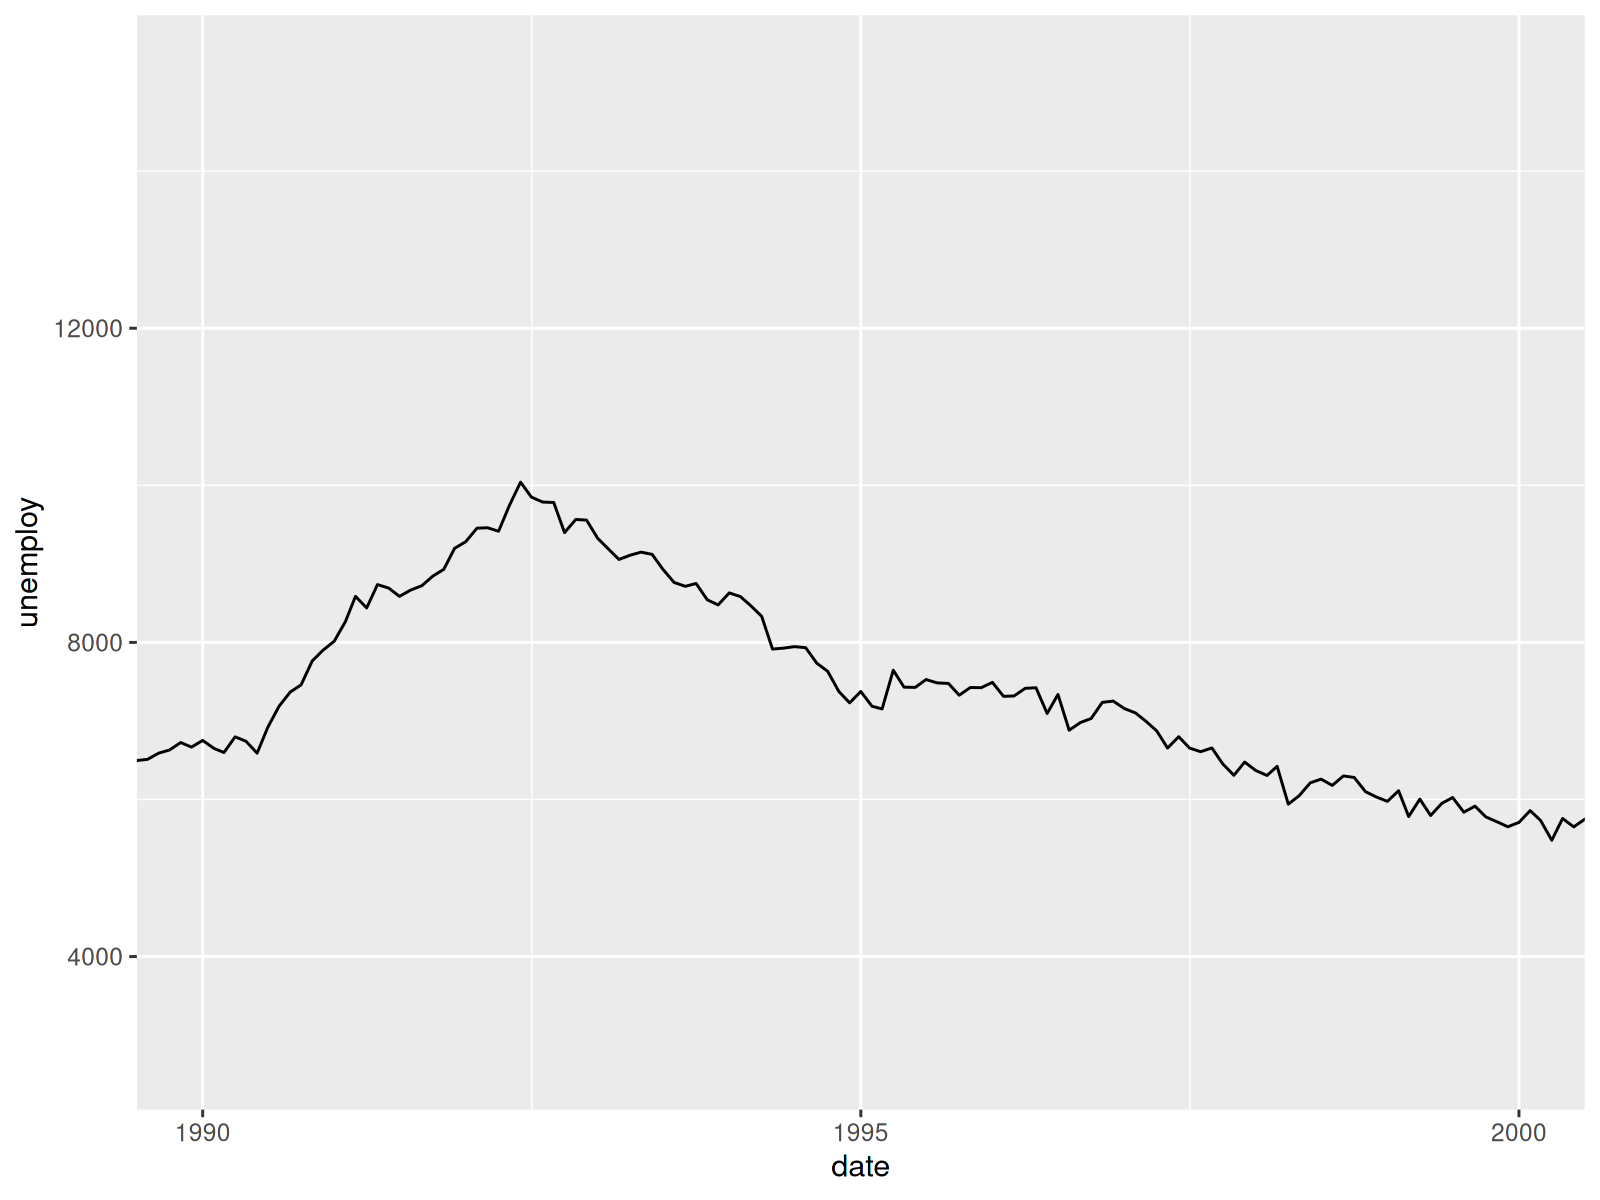

In [61]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()

plot +
  scale_x_date(limits = as.Date(c("1990-01-01", "2000-01-01")))

plot +
  coord_cartesian(xlim = as.Date(c("1990-01-01", "2000-01-01")))

### Breaks

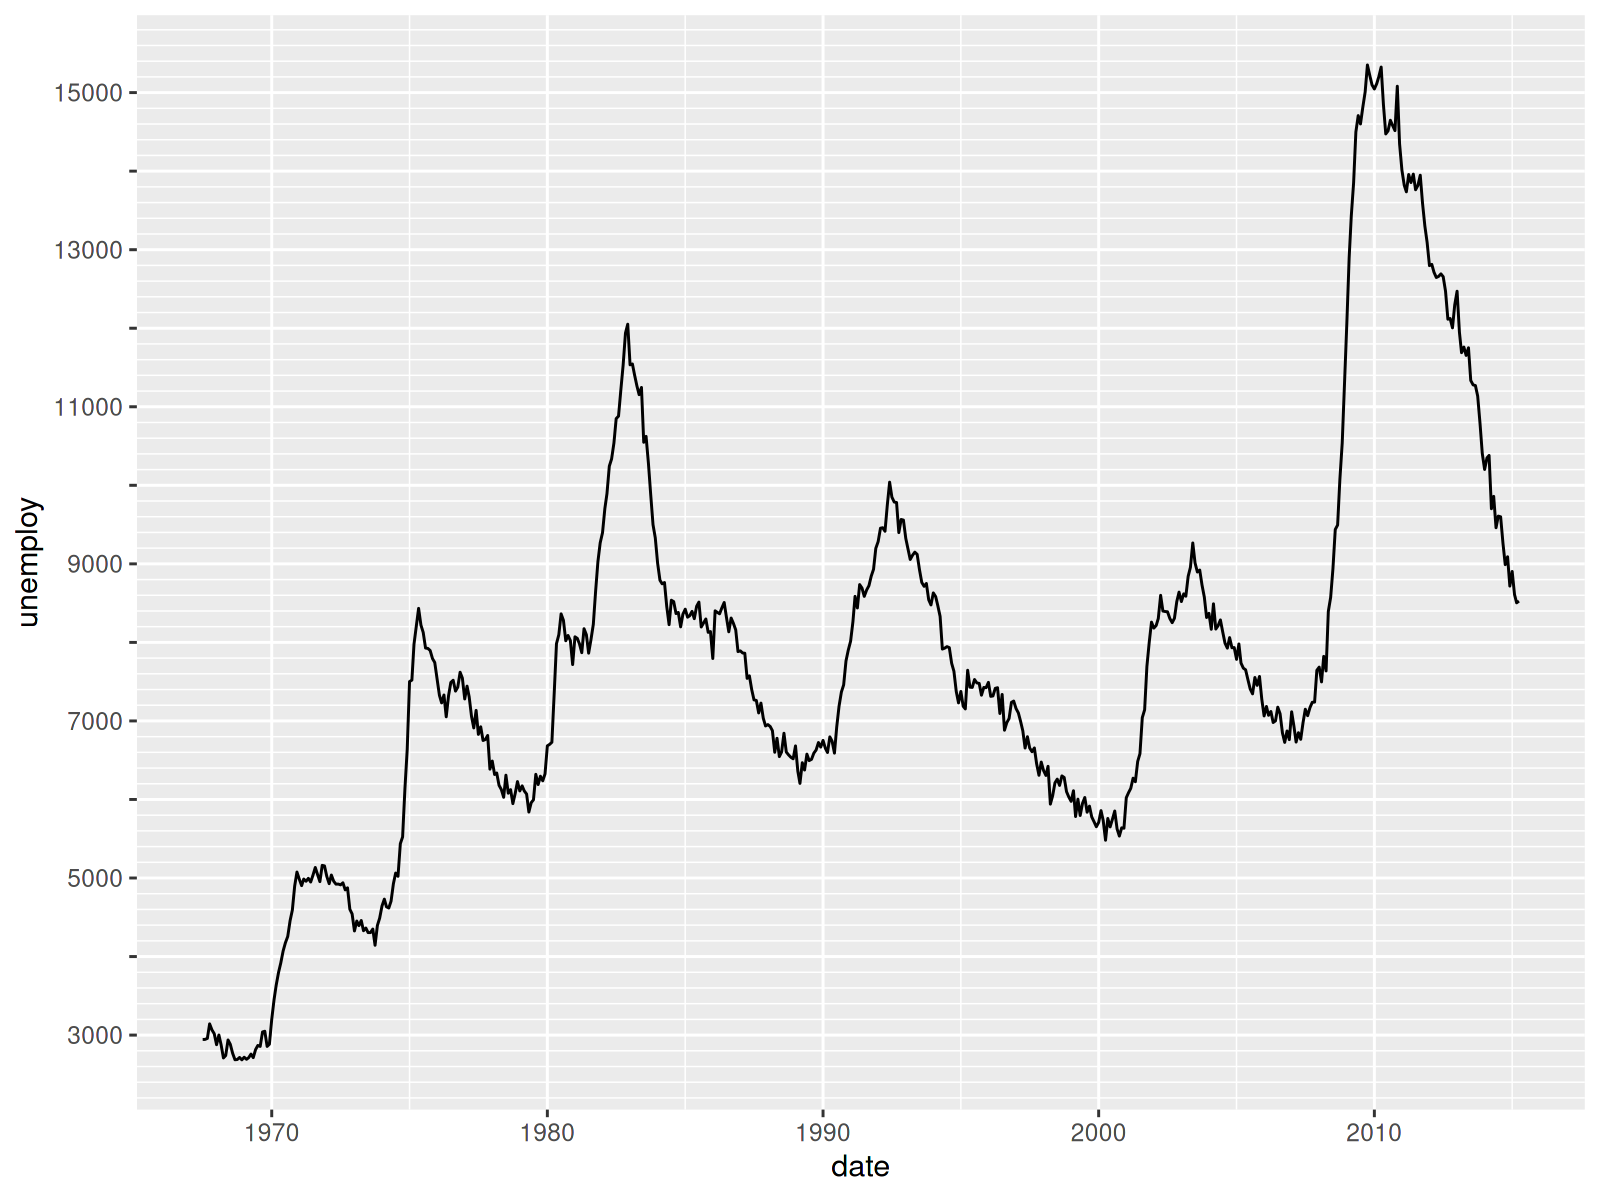

In [84]:
plot <- ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()

plot +
  scale_y_continuous(
    breaks = seq(from = 0, to = max(economics$unemploy), by = 1000), 
    minor_breaks = seq(from = 0, to = max(economics$unemploy)*1.2, by = 200),
    labels = function(x) ifelse(x %% 2000 == 1000, as.character(x), ""))

### Beschriftungen

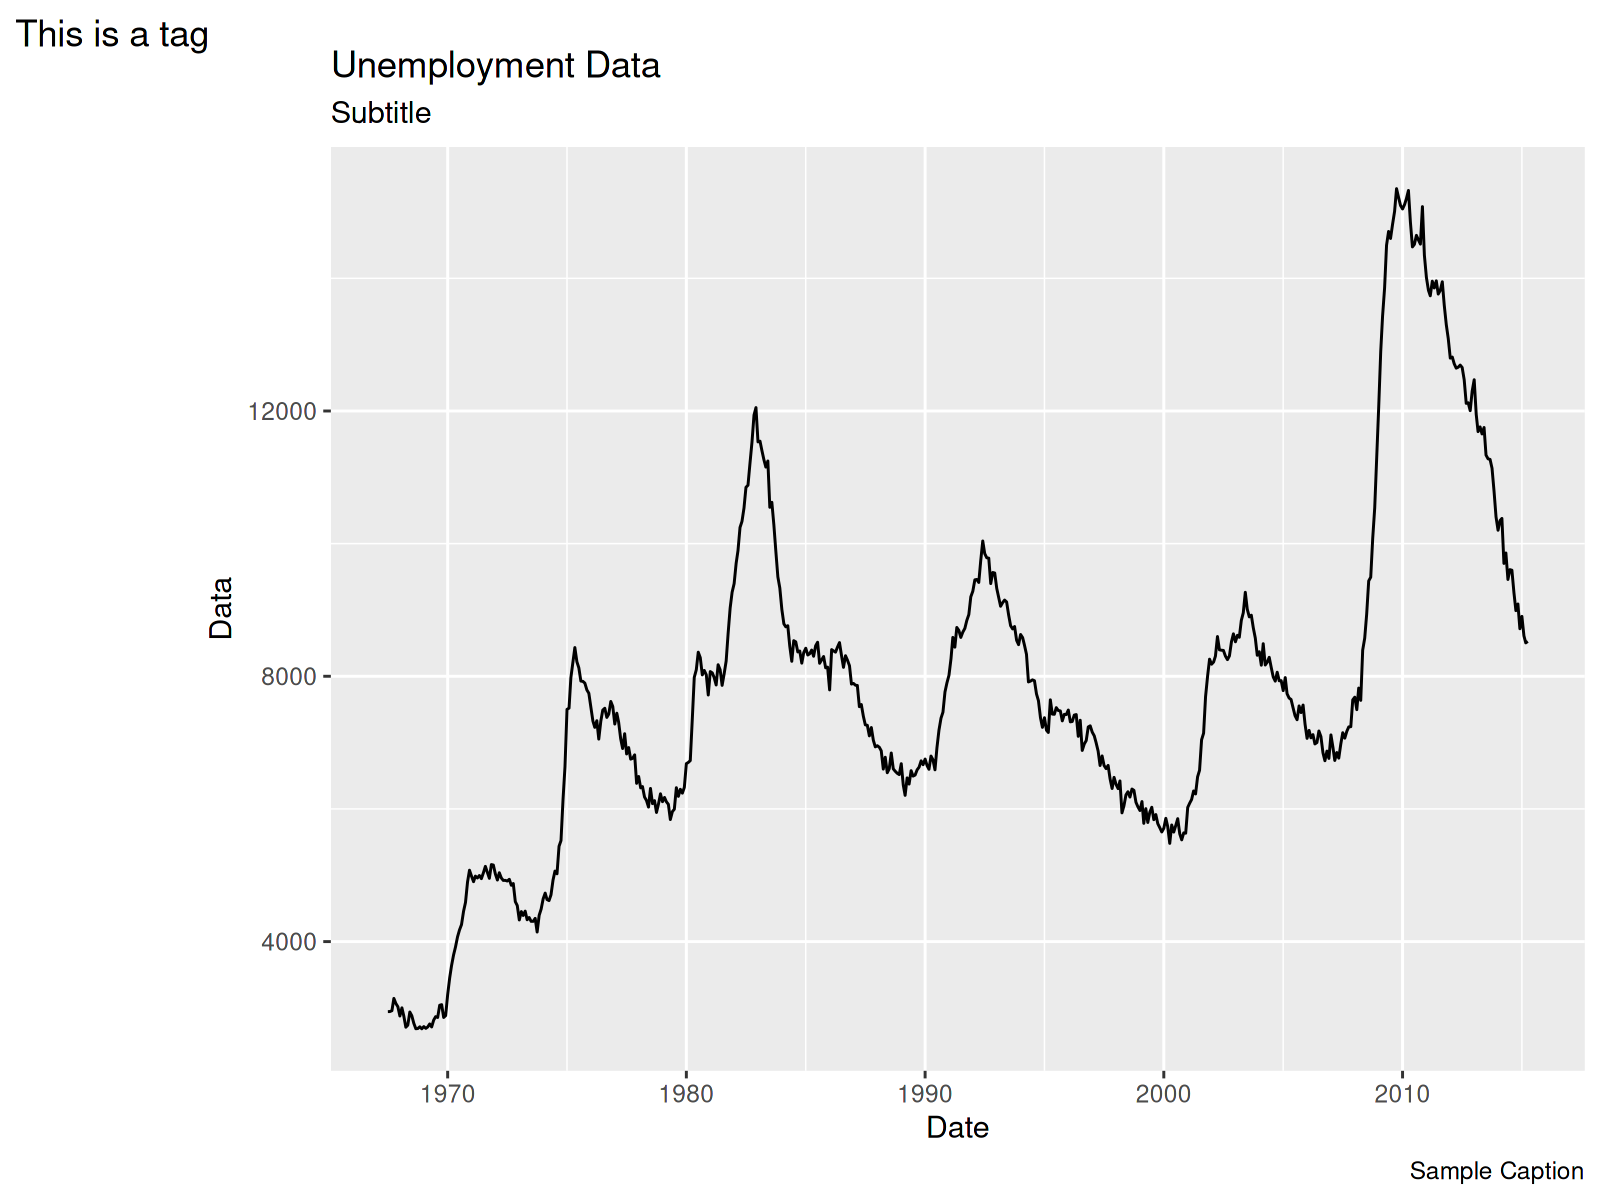

In [63]:
data("economics", package = "ggplot2")

ggplot(economics, aes(x = date, y = unemploy)) +
    geom_line() +
    labs(title = "Unemployment Data", subtitle = "Subtitle", caption = "Sample Caption", tag = "This is a tag", x = "Date", y = "Data")

***

# Farben: color, fill und groups

## Einfache Farben

Einfache Umsetzung von Farben in einer Grafik:
Hier muss für jedes Dataset das Attribut `color` konstant auf einen Wert gesetzt werden. Dazu ist es nötig die Daten manuell in entsprechend viele subsets zu unterteilen.
Für aufwändige Grafiken oder Datasets empfiehlt es sich daher, das Attribut "color" datengetrieben zu befühlen.

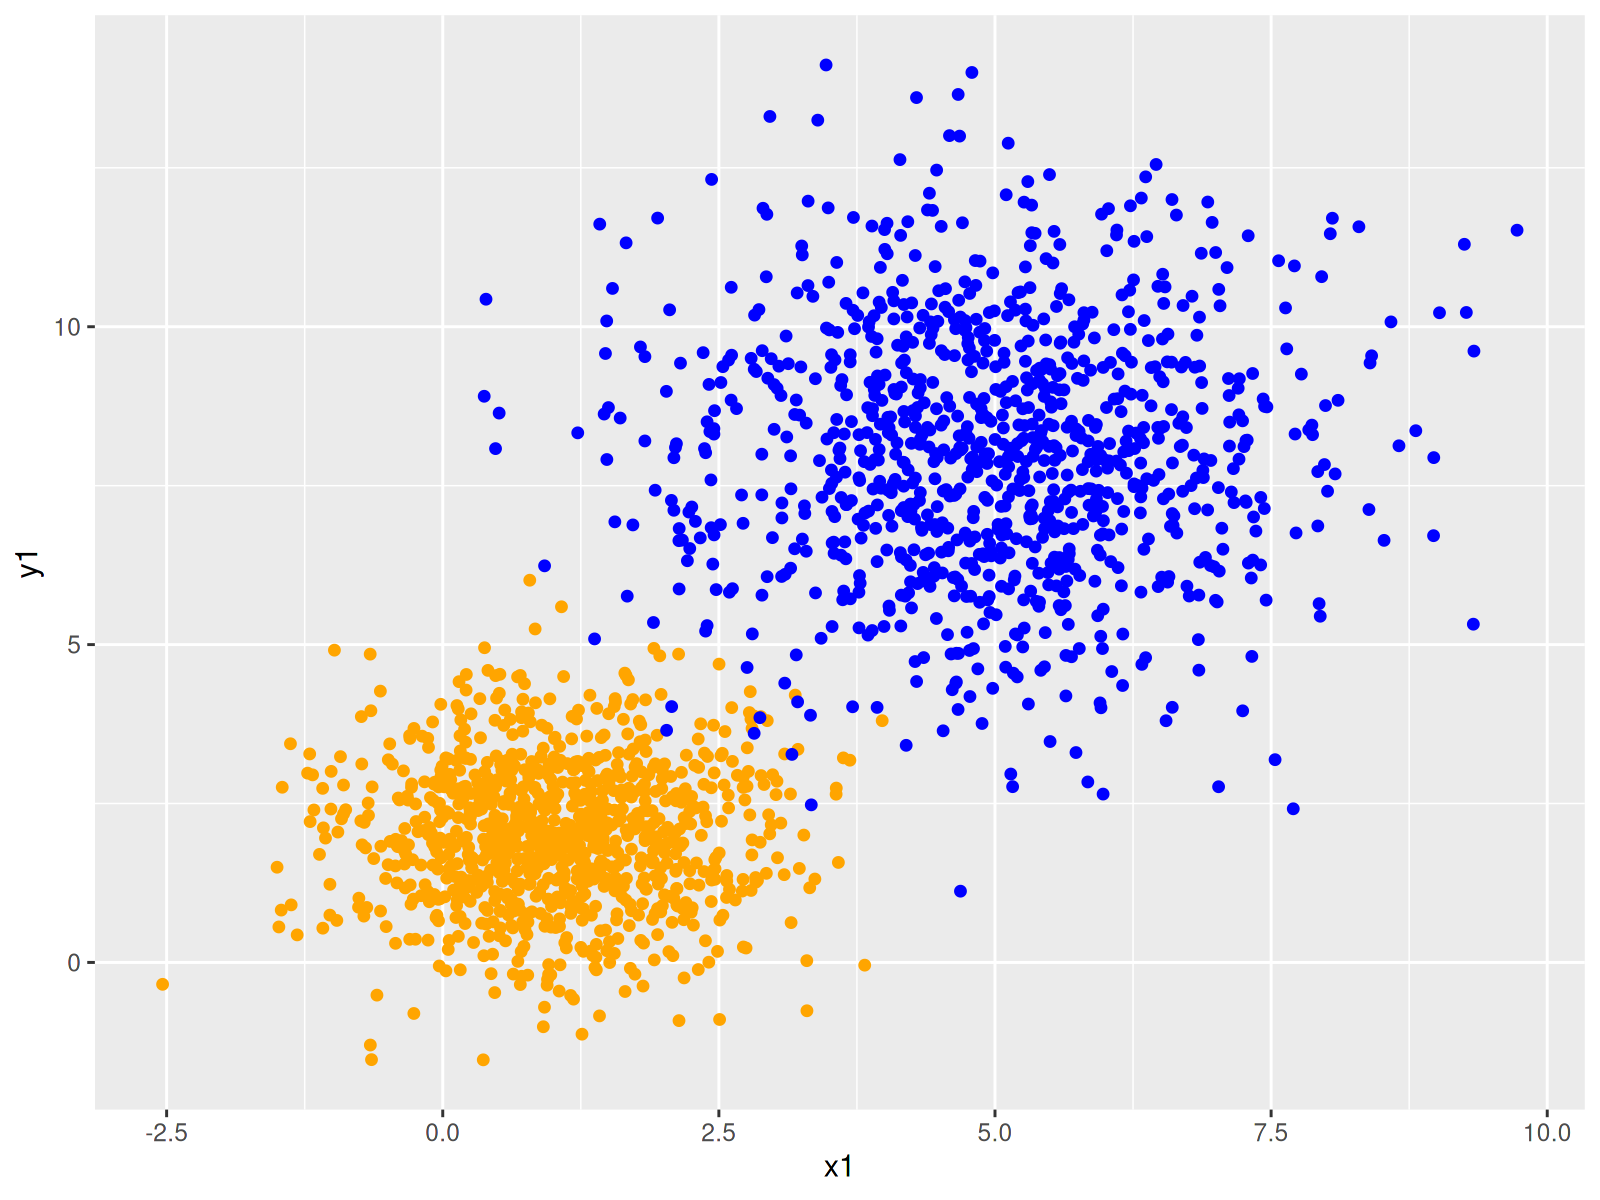

In [87]:
# Datengenerierung
library(MASS)
n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)

data <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

# Plot
ggplot(data = data) +
  geom_point(aes(x = x1, y = y1), color = "orange") +
  geom_point(aes(x = x2, y = y2), color = "blue")

## Benutzung von fill, color und group

Einfacher ist es die Farben datengetrieben zuzuweisen. Dazu ist allerdings i.d.R. eine long-Struktur der Daten notwendig.

Hier wurde die Datentabelle um eine Variable `Gruppe` ergänzt, welche dem entsprechenden Datensatz einer Gruppe zuordnet. Das `color` Attribut wird hier nun innerhalb der `aes` Funktion zugewiesen. Anstatt die Farbe konstant für eine Datenmenge zu setzen, kann ggplot nun automatisch die Gruppenzugehörigkeit bestimmen. Den Gruppen werden dann automatisch Farben zugewiesen (i.d.R. rot und blau). Die Farbzuweisung kann nun über eine anpassung der "Farbskala" umgesetzt werden, dabei wird jeder spezifische Gruppenwert auf einen Farbwert gemappt.


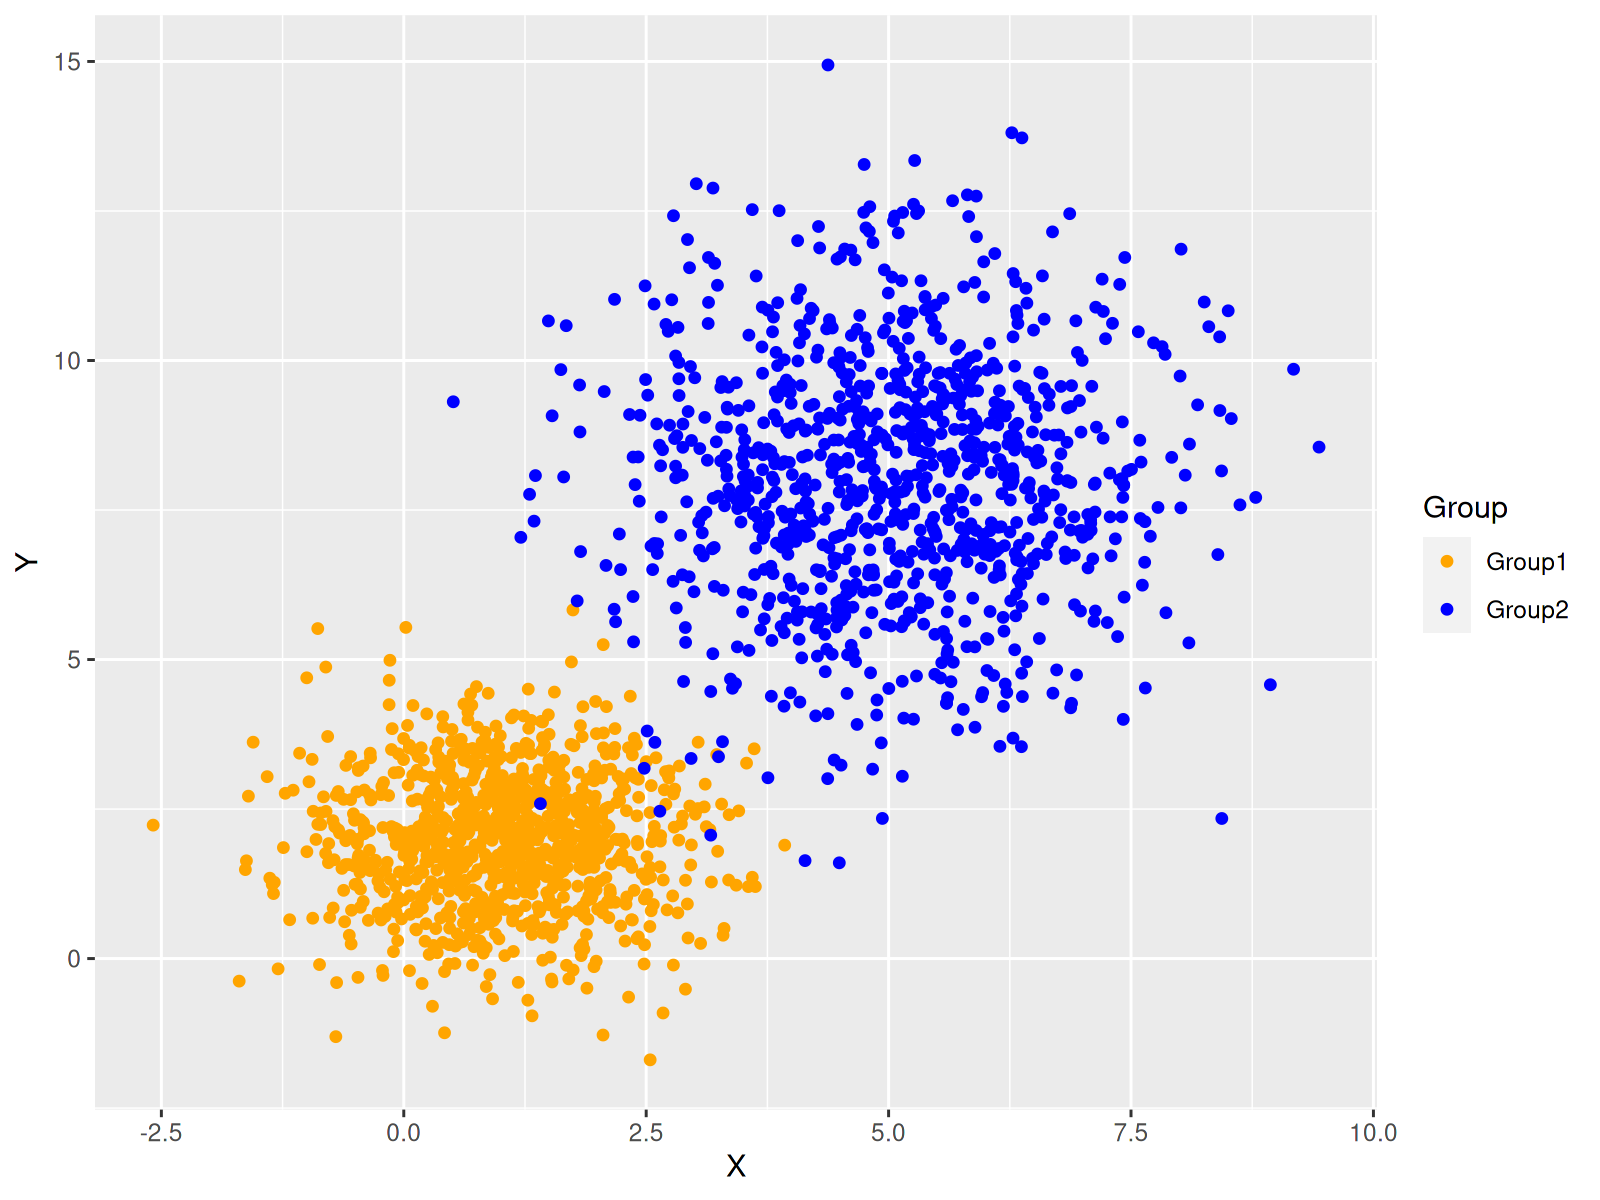

In [65]:
# Datengenerierung
data <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data) <- c("Group", "X", "Y")
data$Group %<>% factor
data$X %<>% as.numeric
data$Y %<>% as.numeric


# Plot
ggplot(data = data) +
  geom_point(aes(x = X, y = Y, colour = Group)) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue"))

Die Farbskala kann, wie jede andere ggplot-Skala, stetig und diskret sein. Stetige Farbskalen sind dabei "Farbverläufe".

Als Beispiel soll im folgenden eine Variable generiert werden, die den Abstand zum Mittelwert der zwei Gruppen angiebt. Die Füllfarbe der Punkte soll dann den Abstand zum Mittelwert wiederspiegeln.

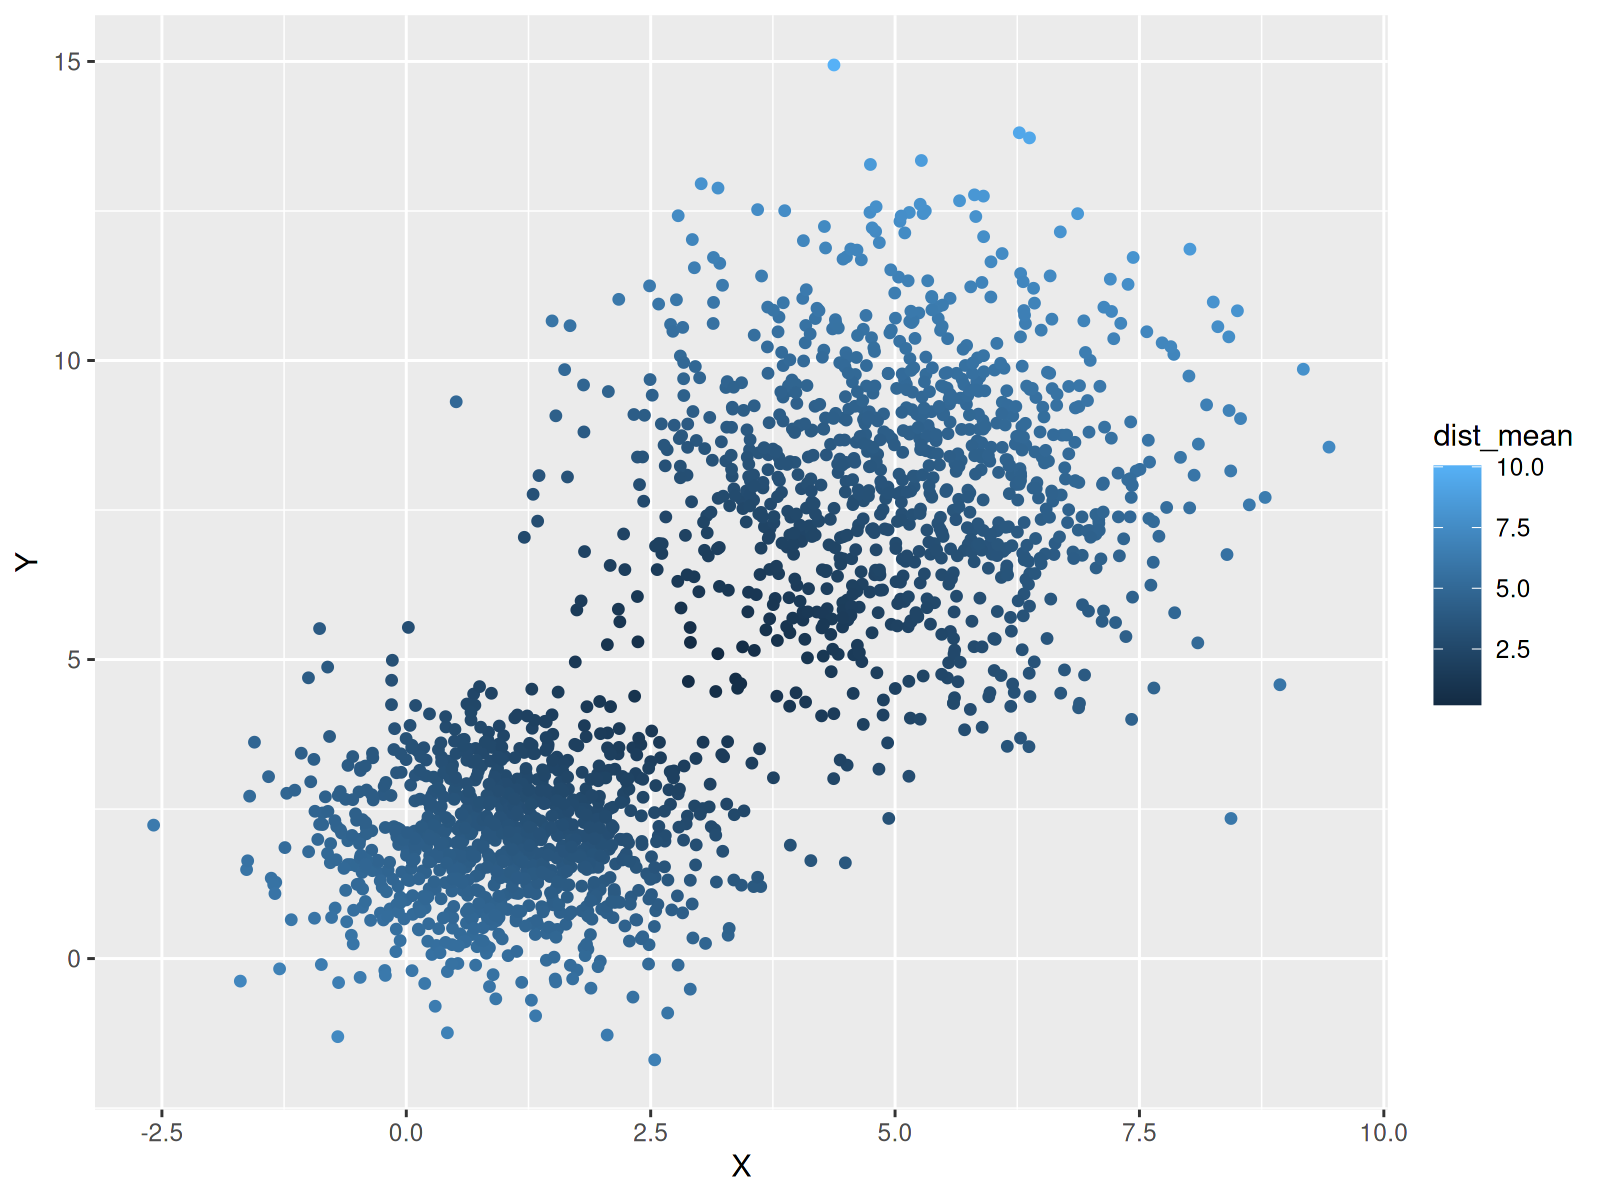

In [66]:
# Datengenerierung
data$dist_mean <- sqrt((data$X - mean(data$X))^2 + (data$Y - mean(data$Y))^2)


# Plot
ggplot(data = data) +
  geom_point(aes(x = X, y = Y, colour = dist_mean))



Neben der Farbe lassen sich alle andere Attribute des Plots datengetrieben steuern. Hier sieht man ein Beispiel, wie sich mehrere Gruppen dazu nutzen lassen mehrere Attribute (hier Füllfarbe und Linienfarbe) zu verändern.

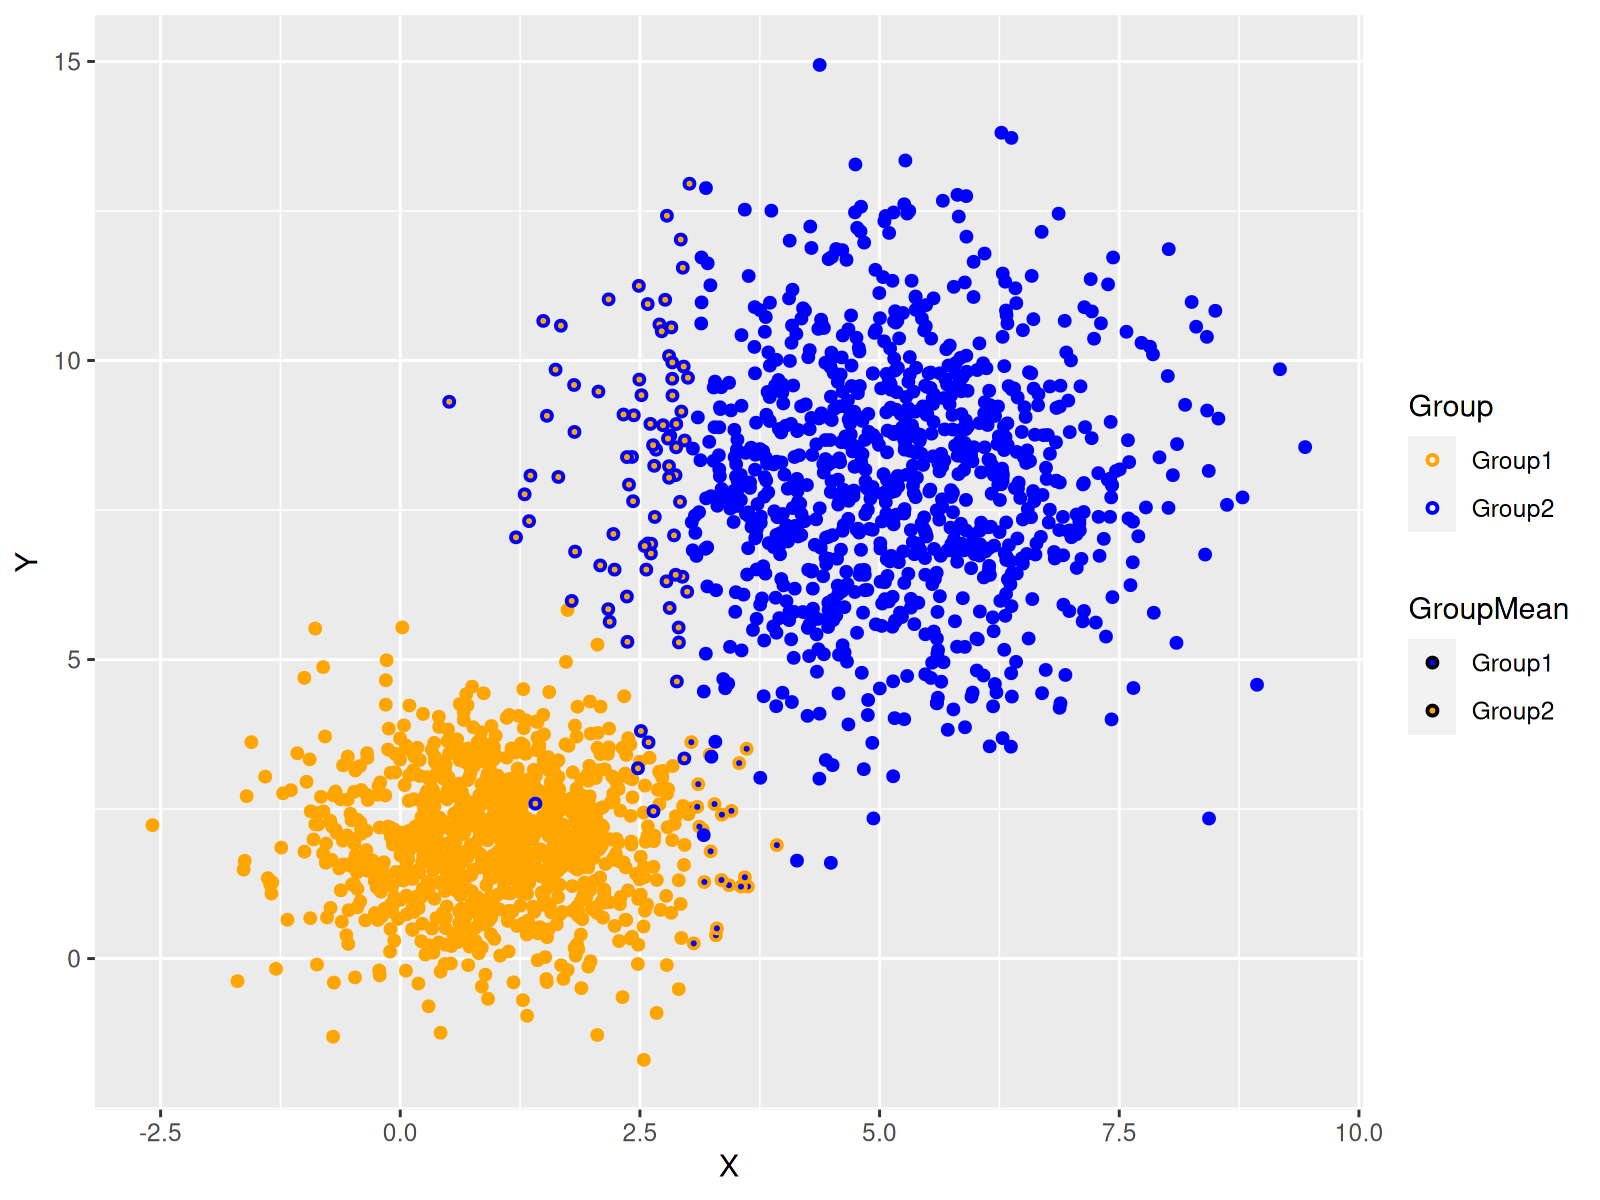

In [67]:
data$GroupMean <- factor(ifelse(data$X > mean(data$X), "Group1", "Group2"))

plot <- ggplot(data = data) +
  geom_point(aes(x = X, y = Y, fill = GroupMean, color = Group), shape = 21, stroke = 1, size = 1) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue")) +
  scale_fill_manual(values = c("Group1" = "blue", "Group2" = "orange"))
plot

Oder Füllfarbe und Form:

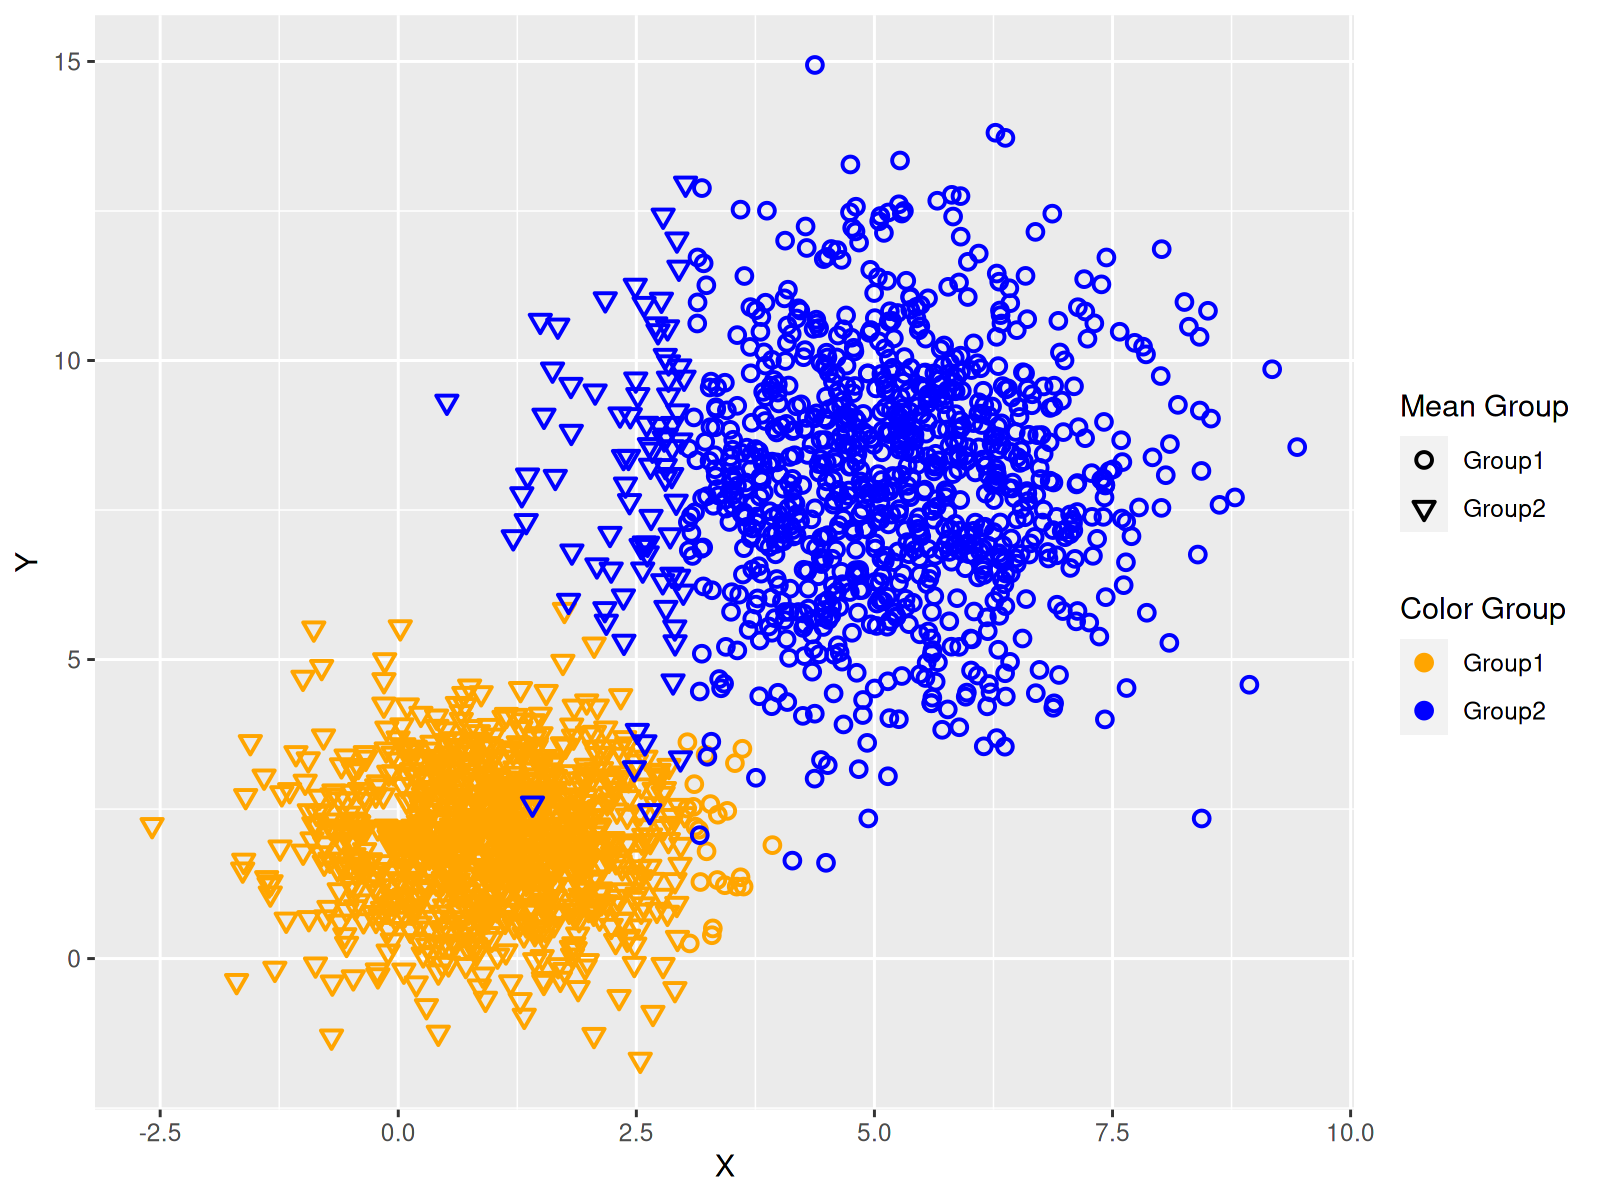

In [68]:
plot <- ggplot(data = data, aes(x = X, y = Y, shape = GroupMean, color = Group)) +
  geom_point(stroke = 1, size = 2) +
  scale_color_manual(name = "Color Group", 
                     values = c("Group1" = "orange", "Group2" = "blue")) +
  scale_shape_manual(name = "Mean Group", 
                     values = c("Group1" = 1, "Group2" = 6))
plot

***

## Einschub: Long- und Wide-Datenstruktur

-   ggplot arbeitet besser mit long-Datenstrukturen
-   arbeiten mit der intuitiven wide-Struktur ebenfalls möglich, jedoch kann dies häufig wesentlich aufwändiger sein, da bei dem fill-Attribut dann für jede Gruppe eine eigene Codezeile verwendet werden muss
-   Dank einigen automatisierten Funktionen lassen sich wide-Strukturen relativ einfach in long-Strukturen überführen

In [69]:
# Datengenerierung
library(MASS)
library(magrittr)

n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data.wide <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

data.long <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data.long) <- c("Group", "X", "Y")
data.long$Group %<>% factor
data.long$X %<>% as.numeric
data.long$Y %<>% as.numeric

head(data.wide)

head(data.long)

x1        y1        x2       y2       
1 1.1188095 0.9052596 5.091501  7.487357
2 0.1064411 2.3109119 5.359812  6.562535
3 0.7888855 0.7937024 6.226056  3.959726
4 1.4887798 3.0772026 8.121957  8.779226
5 1.2203719 0.8863427 6.294620  3.216016
6 3.2962458 1.0536368 5.346431 10.125132

Group  X         Y        
1 Group1 1.1188095 0.9052596
2 Group1 0.1064411 2.3109119
3 Group1 0.7888855 0.7937024
4 Group1 1.4887798 3.0772026
5 Group1 1.2203719 0.8863427
6 Group1 3.2962458 1.0536368



Funktion `reshape()`:
- `varying`:   Vektor der Variablennamen die im wide-Format getrennt sind und im long-Format vereint werden sollen. Wichtig dabei ist, dass sich die Zugehörigkeit zur Variable im long-Format und die Zugehörigkeit zu einer Gruppe aus dem Variablennamen ableiten lässt: Bsp.: `x.1` und `x.2`, `x1` und `x2`, `x_1` und `x_2`, `station1_prognose` und `station1_beobachtet`
- `vnames`:    Vektor der Namen der neuen Variablen im long-Format
- `direction`: Richtung der Transformation, kann `"long"` oder `"wide`" sein (Achtung für Transformation nach wide, müssen andere Variablen verwendet werden)
- `timevar`:   Name der Variable die im long-Format mehrere Gruppen differenzieren soll


In [70]:
n <- 100
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data.wide <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

data.wide$id <- 1:nrow(data.wide)

data.long <- reshape(data.wide, 
                     varying = c("x1", "y1", "x2", "y2"),   
                     v.names = c("x", "y"),
                     direction = "long",
                     timevar = "Group")

head(data.long)

id Group x           y        
1.1 1  1      2.56107339 2.5412202
2.1 2  1      2.38360218 1.1307070
3.1 3  1     -0.56831312 1.3972054
4.1 4  1      1.11828857 1.5855747
5.1 5  1     -0.01414637 0.3971396
6.1 6  1      1.01190794 3.1463799

***

# Eyecandy: Themes

## Standard Darstellungsweise

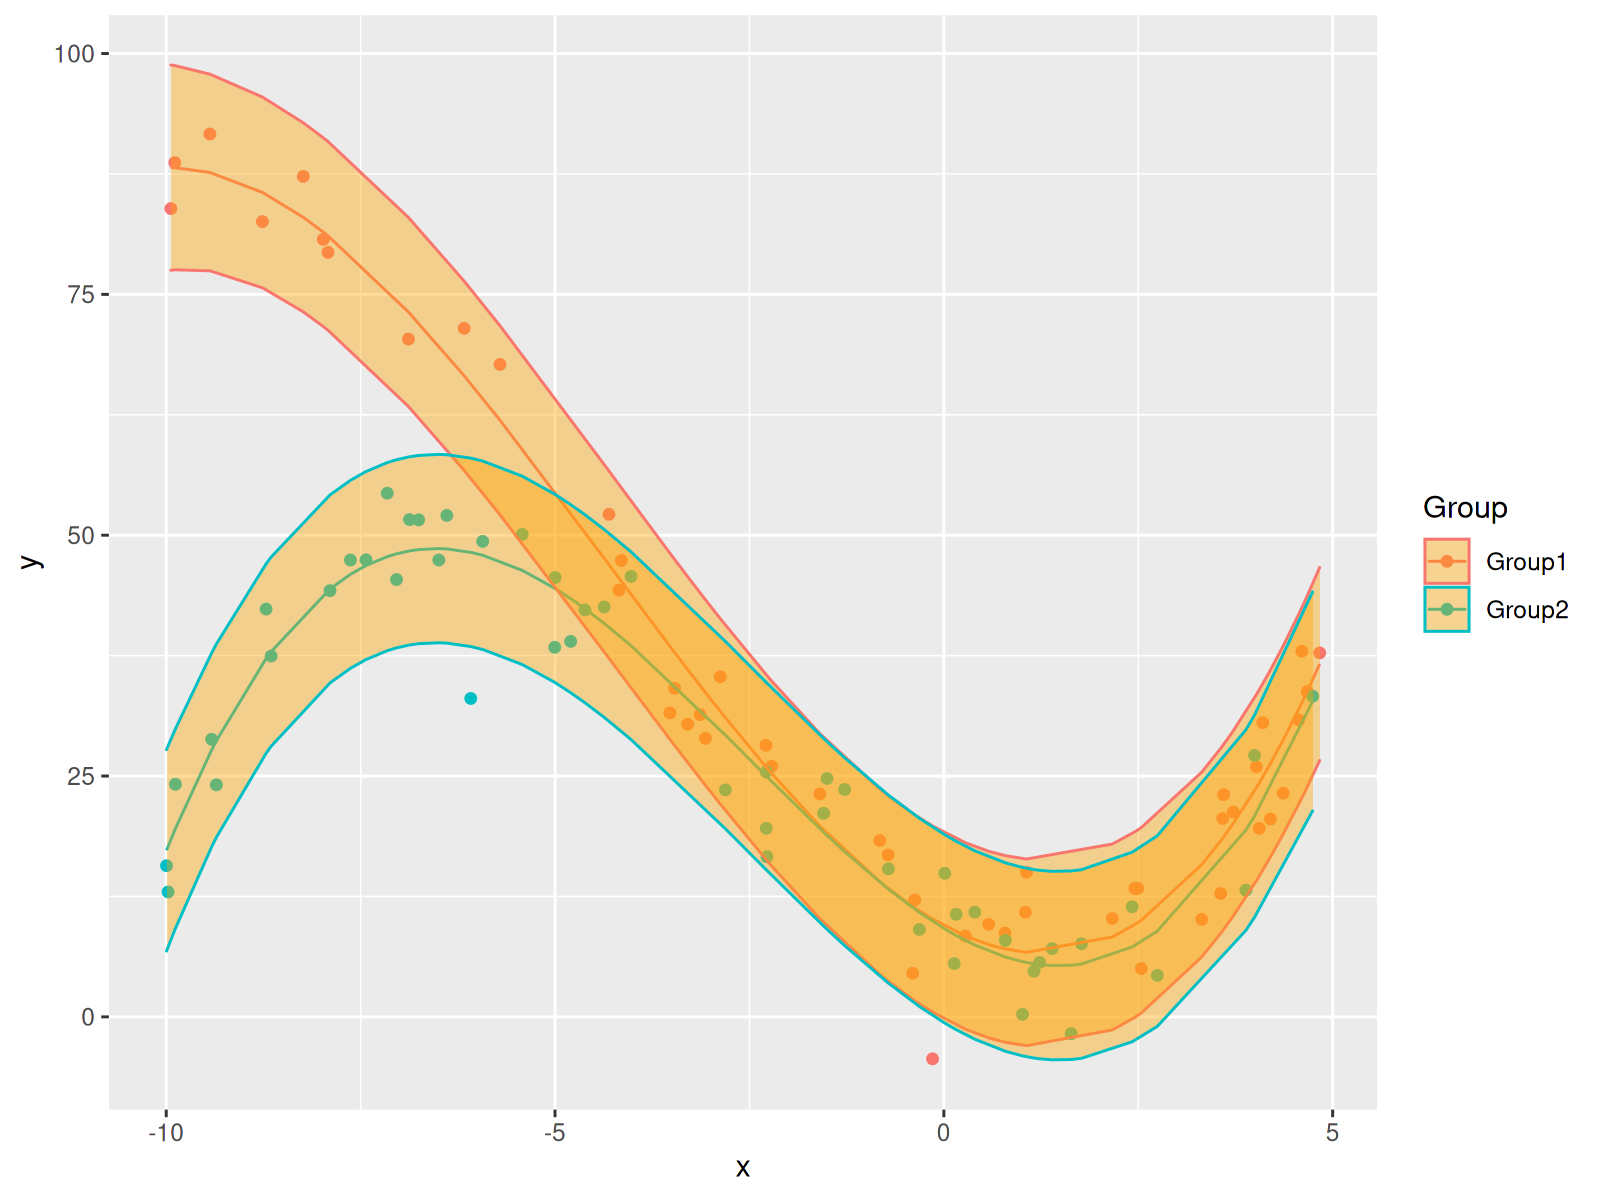

In [71]:
# Datengenerierung
set.seed(42)
x1 <- runif(n = 50, -10, 5)
x2 <- runif(n = 50, -10, 5)

u <- rnorm(n = 50, mean = 0, sd = 5)

y1 <- 10 + 0.1 * x1^3 + 1.4 * x1^2 - 4 * x1 + u
y2 <- 8 + 0.17 * x2^3 + 1.31 * x2^2 - 4.9 * x2 + u

data1 <- data.frame(Group = "Group1", y = y1, x = x1)
data2 <- data.frame(Group = "Group2", y = y2, x = x2)

lm1 <- lm(y ~ poly(x, degree = 3), data = data1)
lm2 <- lm(y ~ poly(x, degree = 3), data = data2)
data <- rbind(cbind(data1, predict(lm1, data1, interval="predict")),
              cbind(data2, predict(lm2, data2, interval="predict")))

# Plot
plot <- ggplot(data, aes(color = Group)) +
  geom_point(aes(x = x, y = y)) +
  geom_line(aes(x = x, y = fit)) +
  geom_ribbon(aes(x = x, ymin = lwr, ymax = upr), fill = "orange", alpha = 0.4)
plot

Mit den vorgefertigten Themes lässt sich schnell das Aussehen der Grafik an die eigenen Wünsche anpassen. Die hier verwendeten Themes sind dabei eine Sammlung von Standardwerten für die Attribute der `theme`-Funktion. Mithilfe dieser lassen sich noch weitaus detailliertere Anpassungen der Grafik tätigen.

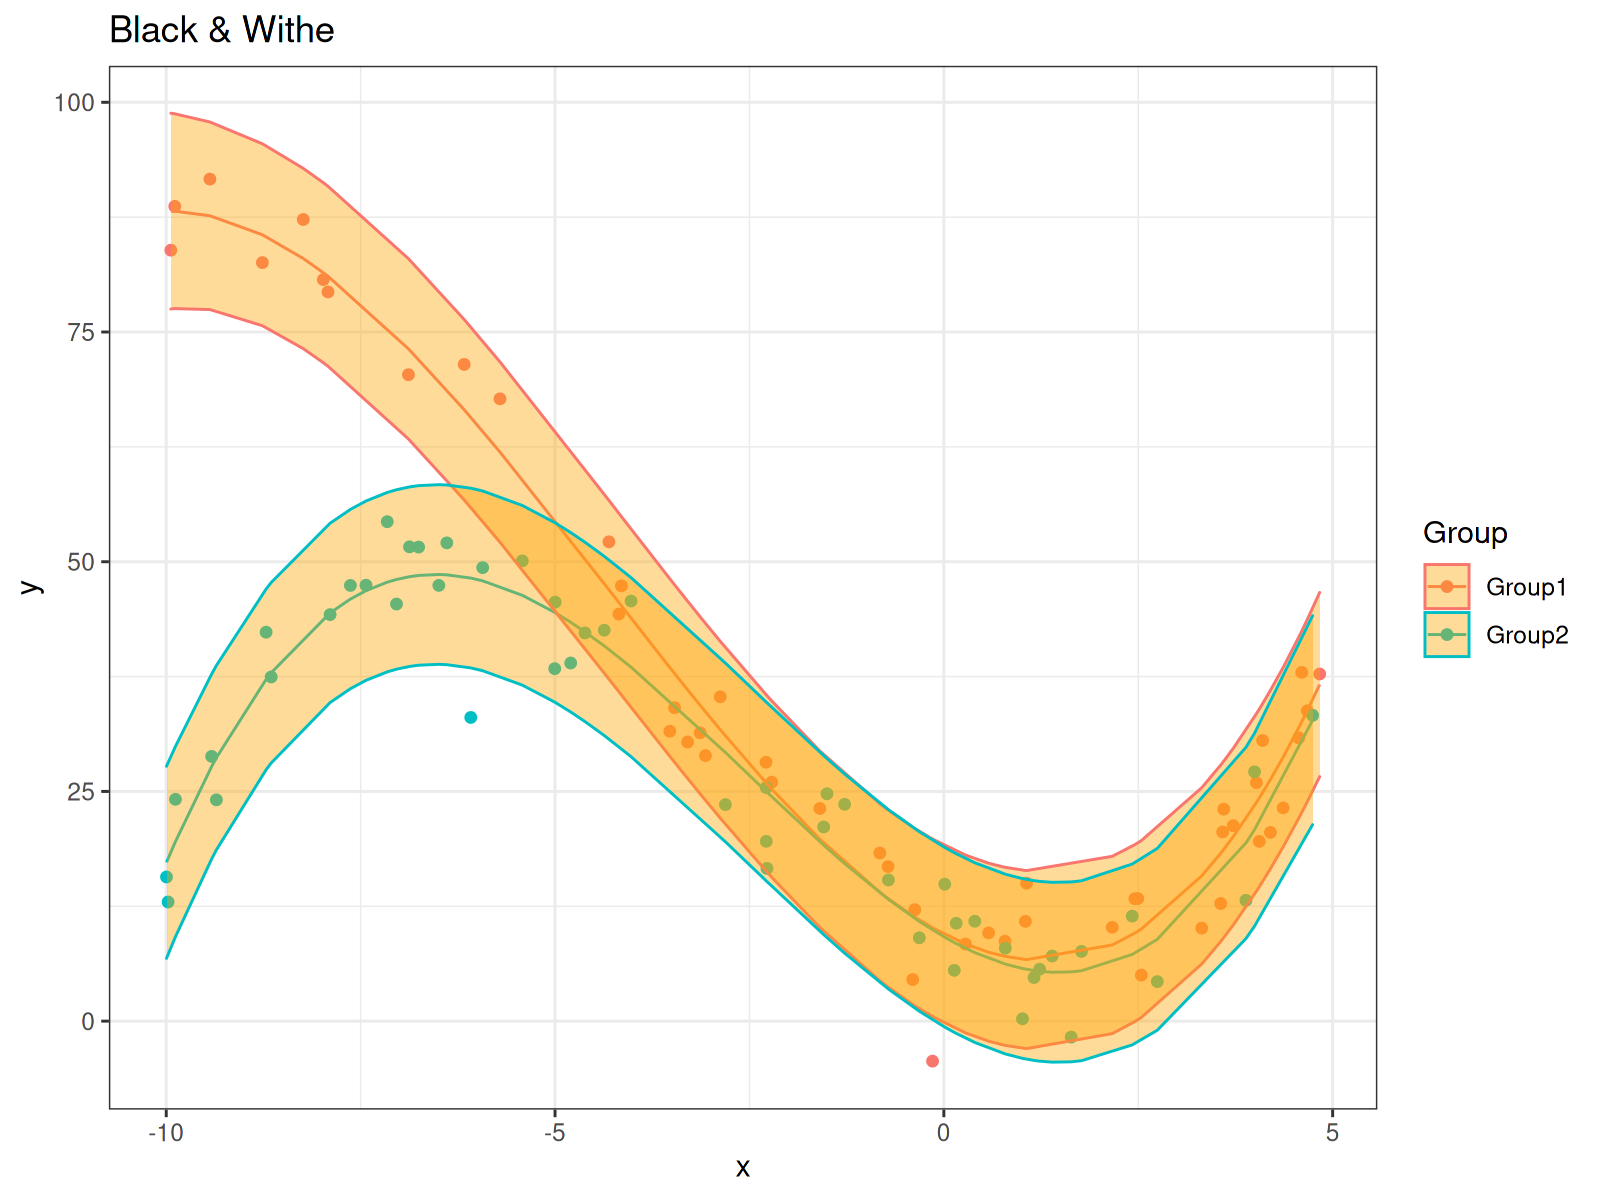

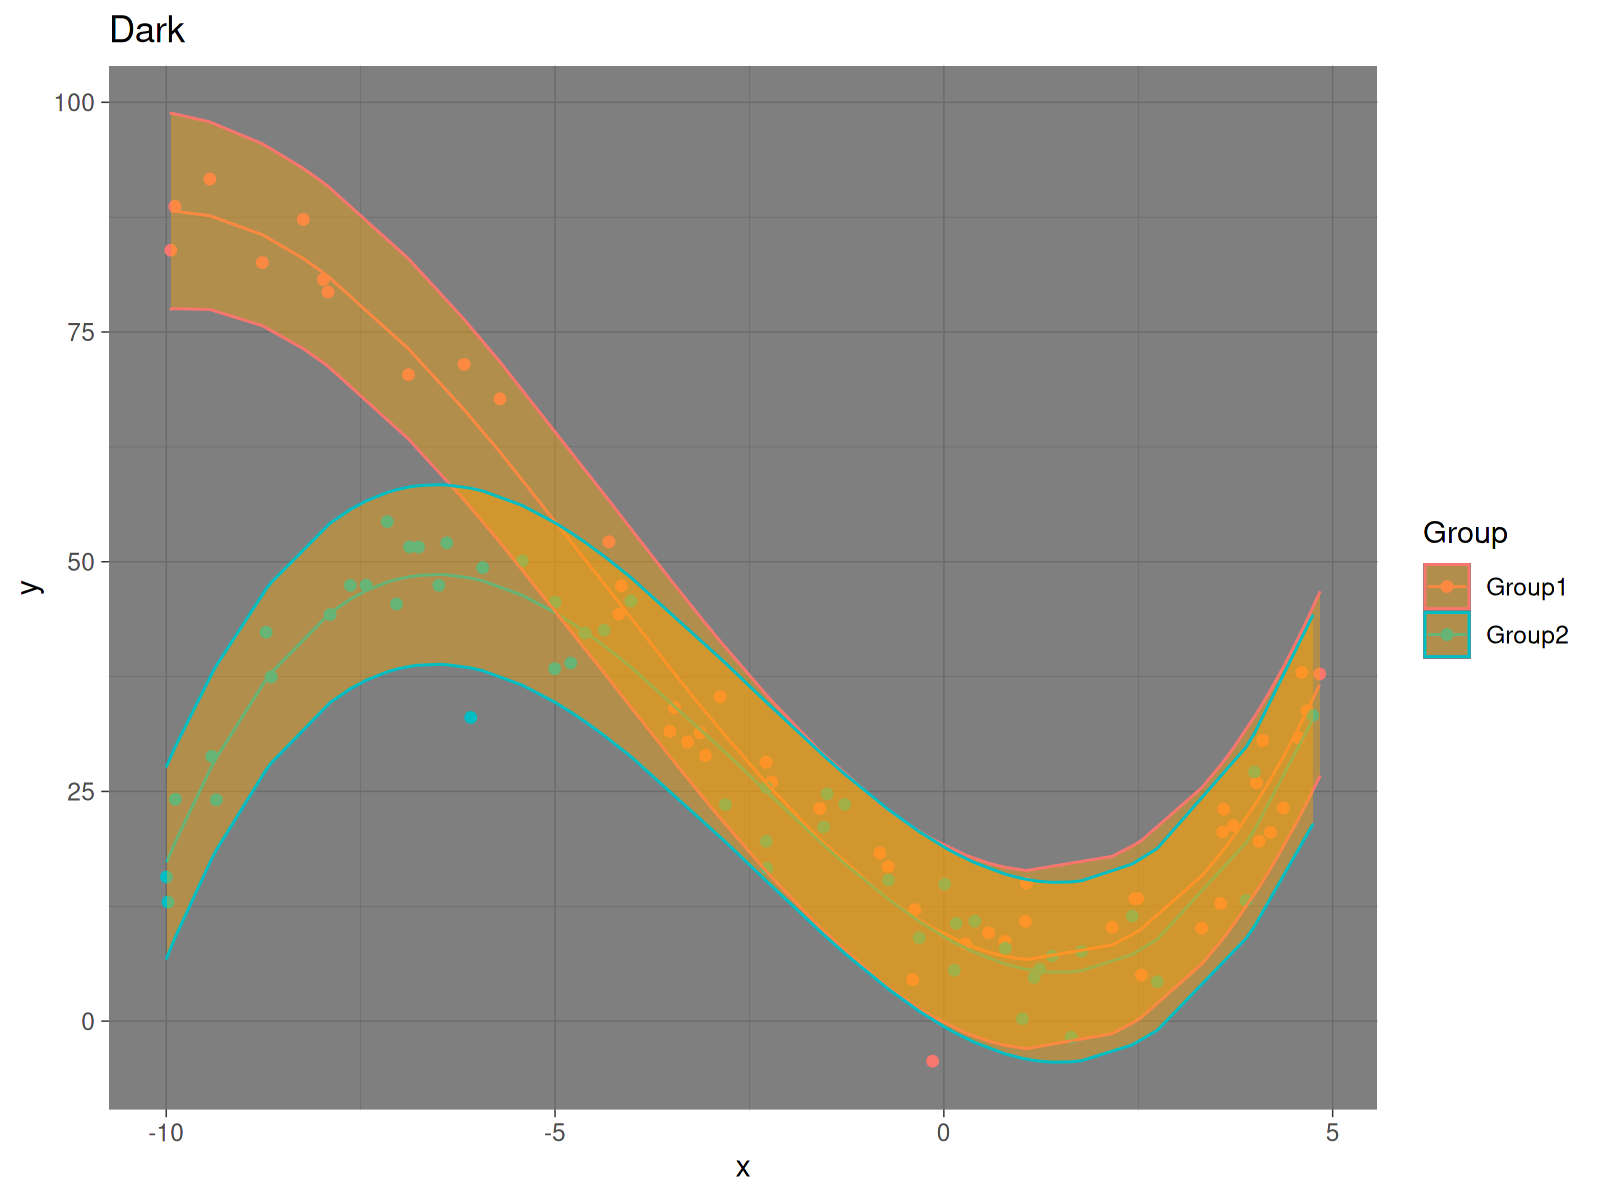

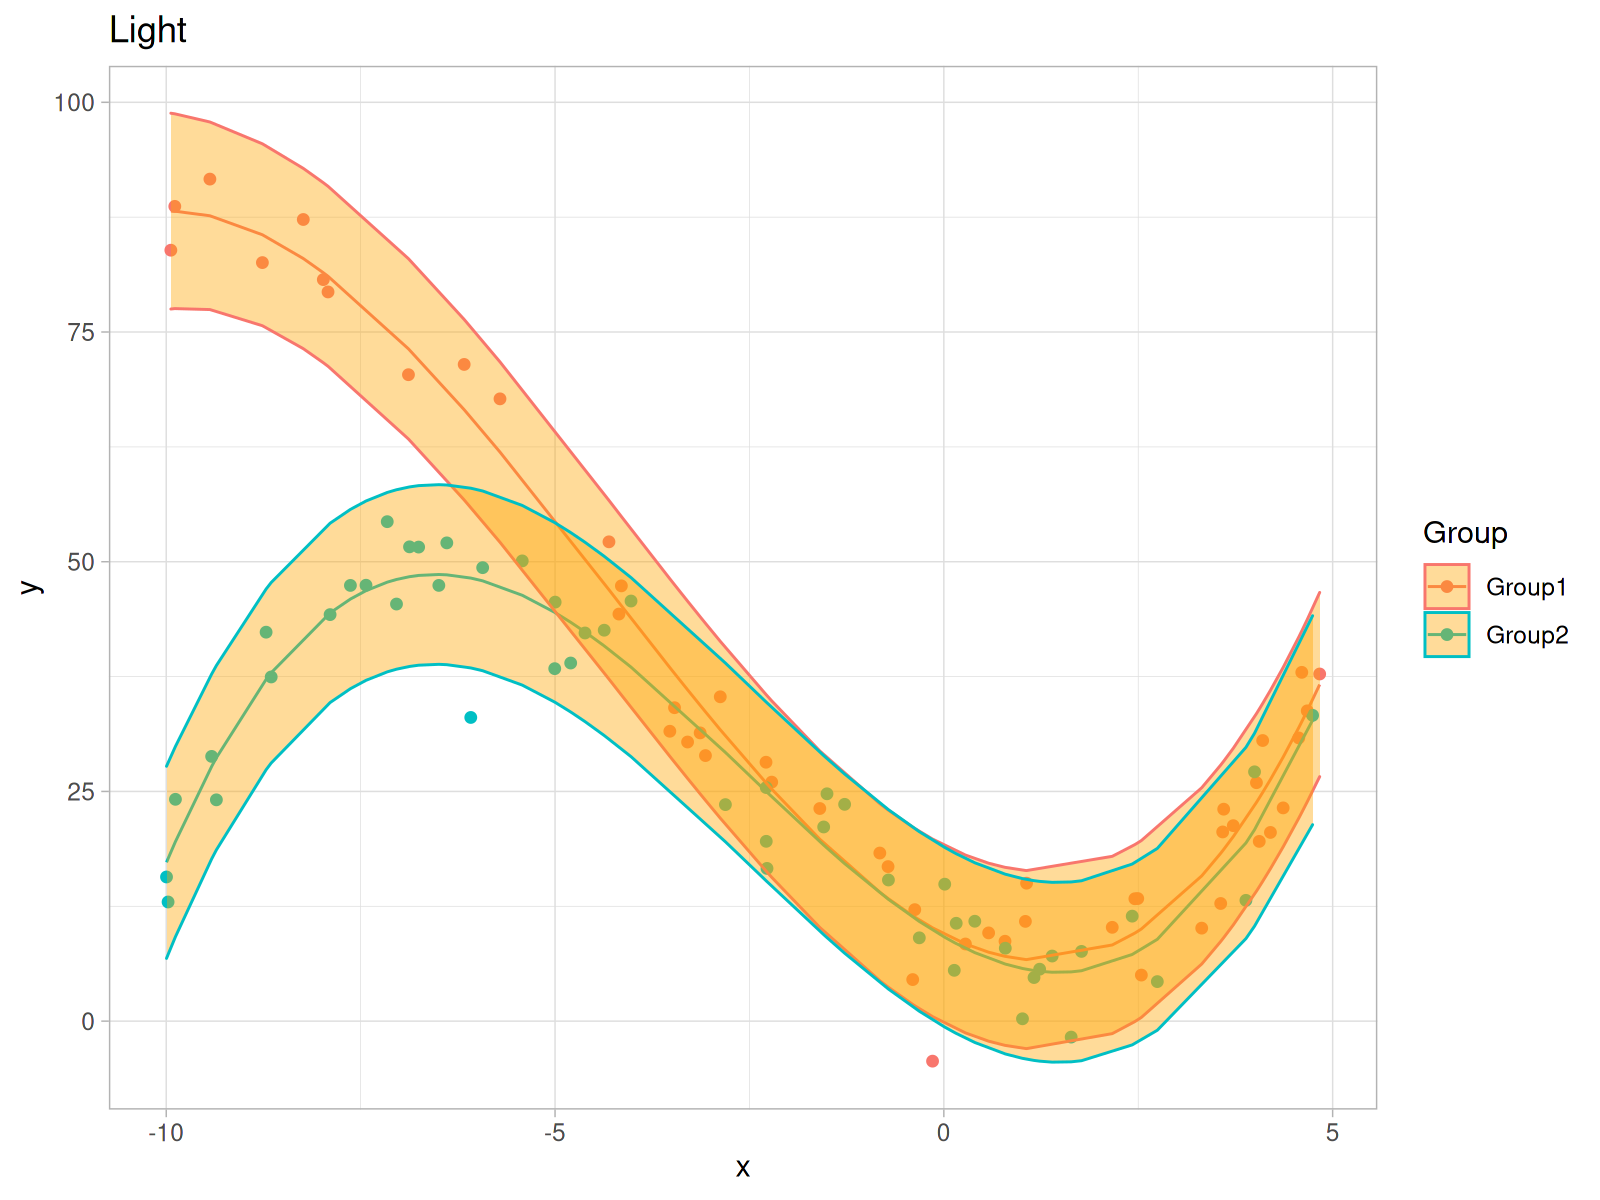

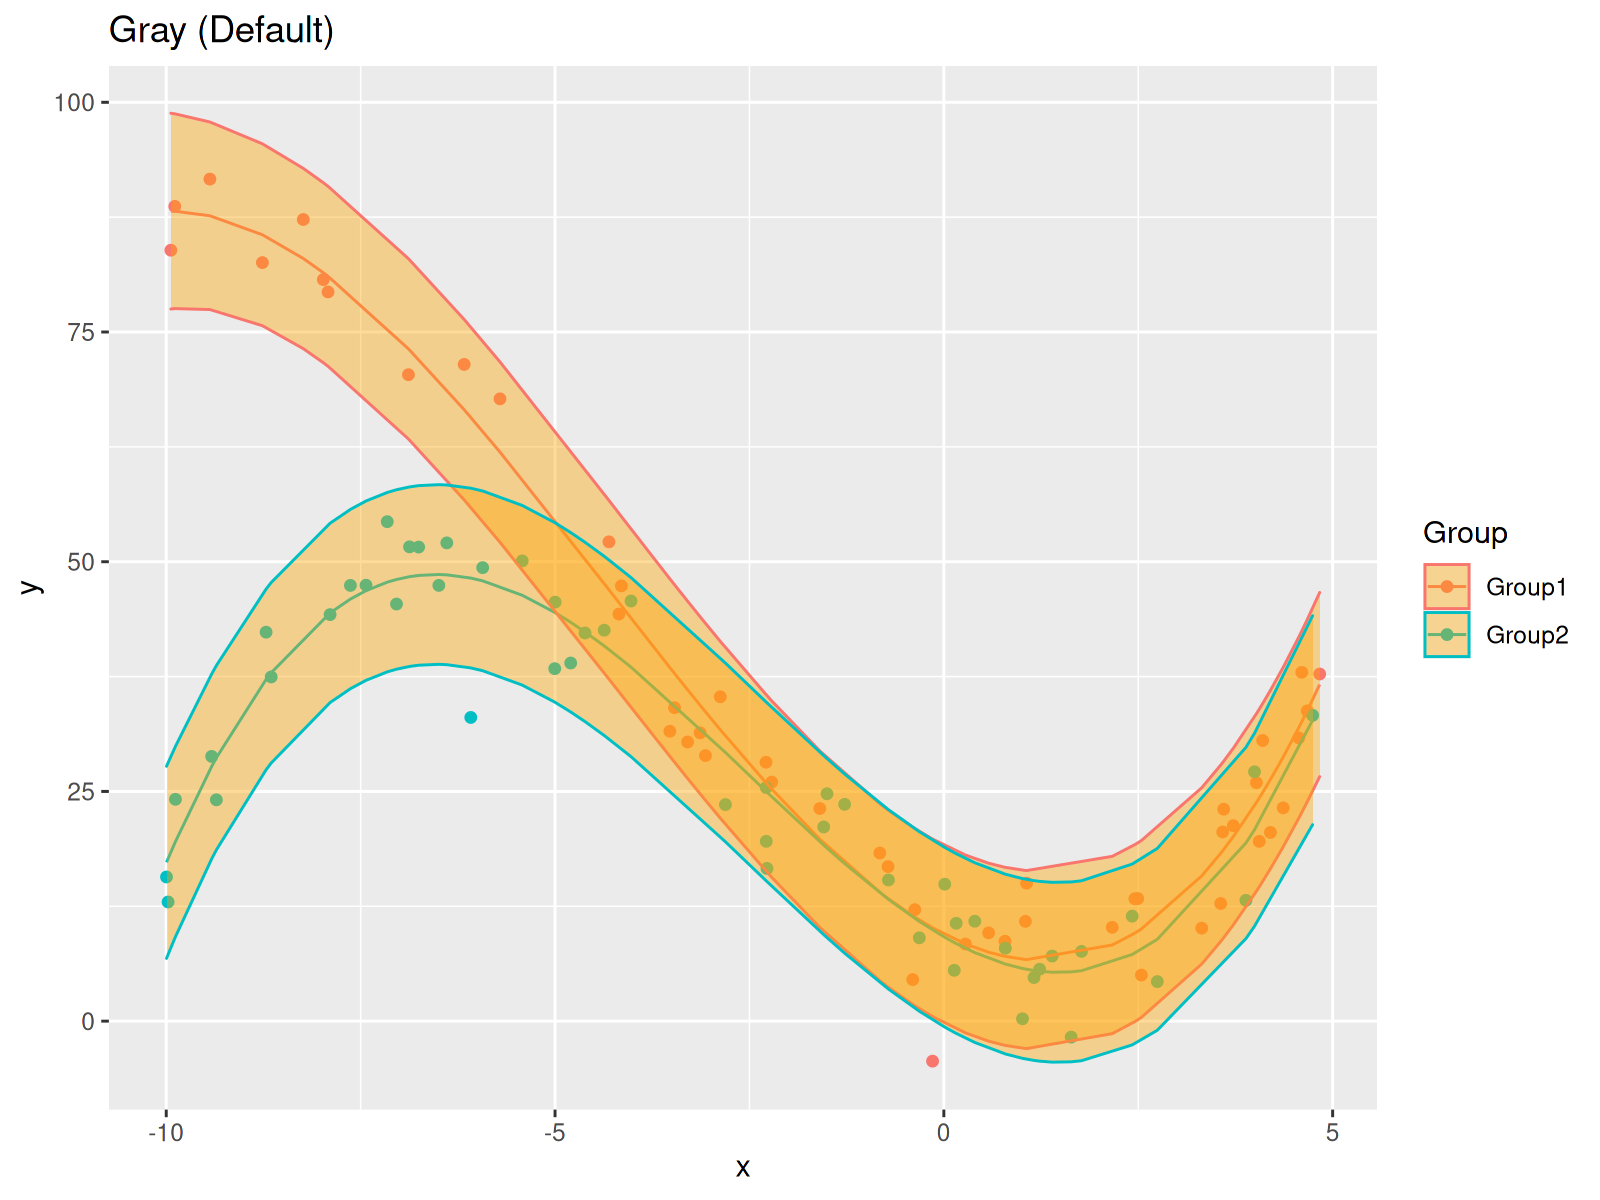

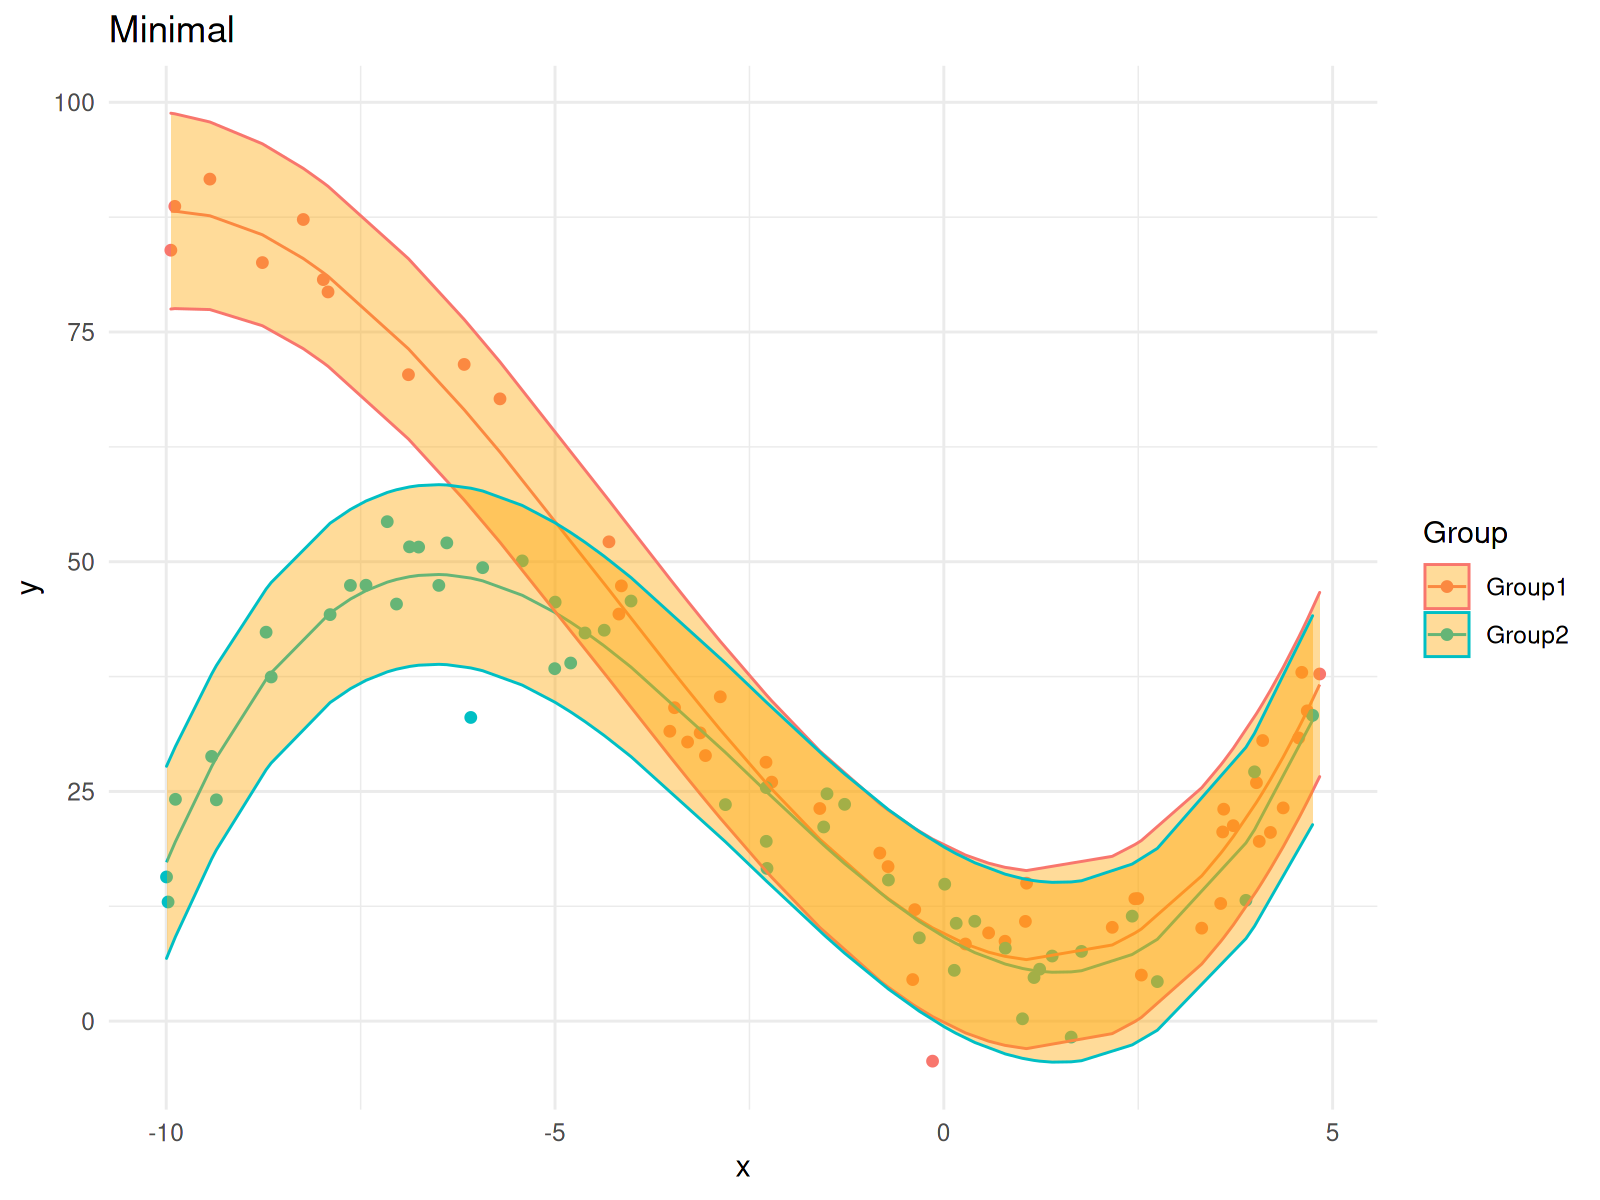

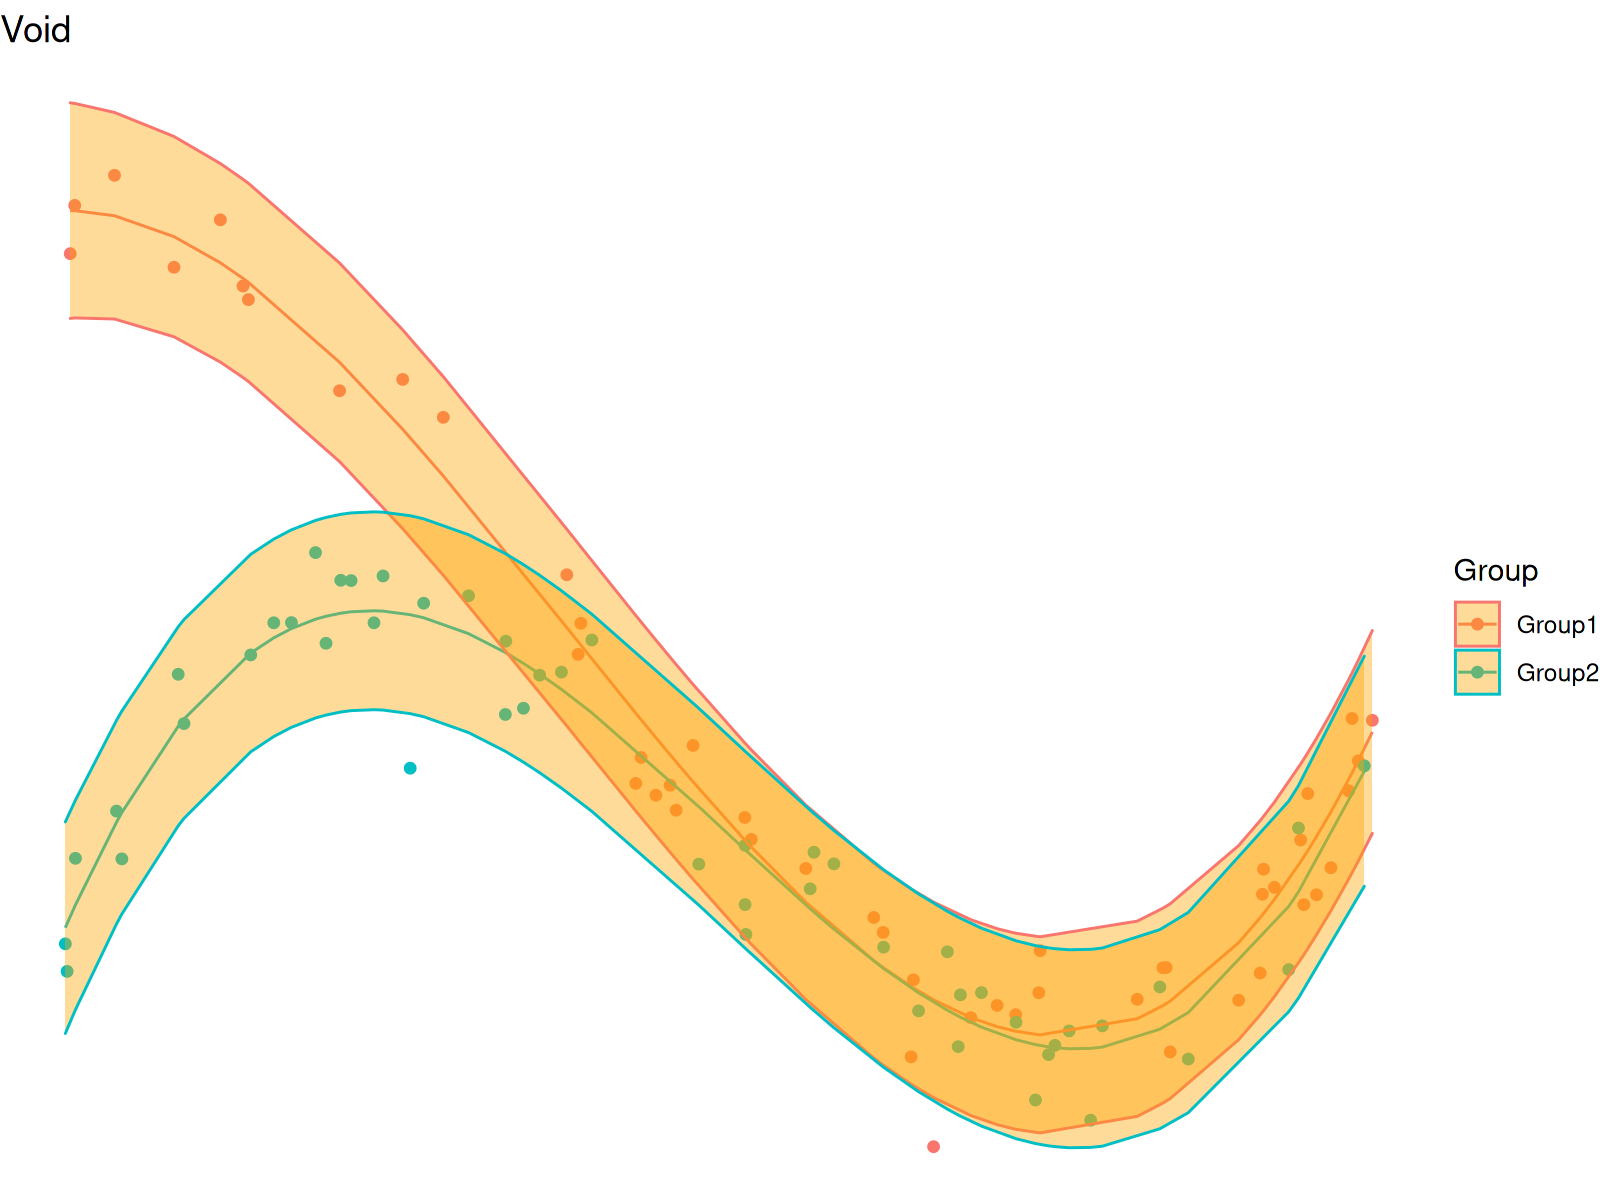

In [72]:
plot +
  labs(title = "Black & Withe") +
  theme_bw()

plot +
  labs(title = "Dark") +
  theme_dark()

plot +
  labs(title = "Light") +
  theme_light()

plot +
  labs(title = "Gray (Default)") +
  theme_gray()

plot +
  labs(title = "Minimal") +
  theme_minimal()

plot +
  labs(title = "Void") +
  theme_void()

## Weitere Optionen

### Legende

Im Allgemeinen wird die Legende automatisch von ggplot erstellt, wenn eine Variable auf aesthetics wie `group` `color`, `fill` etc. gemapped wird. Hier soll stattdessen veranschaulicht werden wie sich die Legende (als Beispiel für ein Grafikelement) sehr tiefgreifend an die eigenen Bedürfnisse anpassen lässt.
Informationen zu den Attributen können mit dem Befehl `?theme` nachgeschlagen werden.

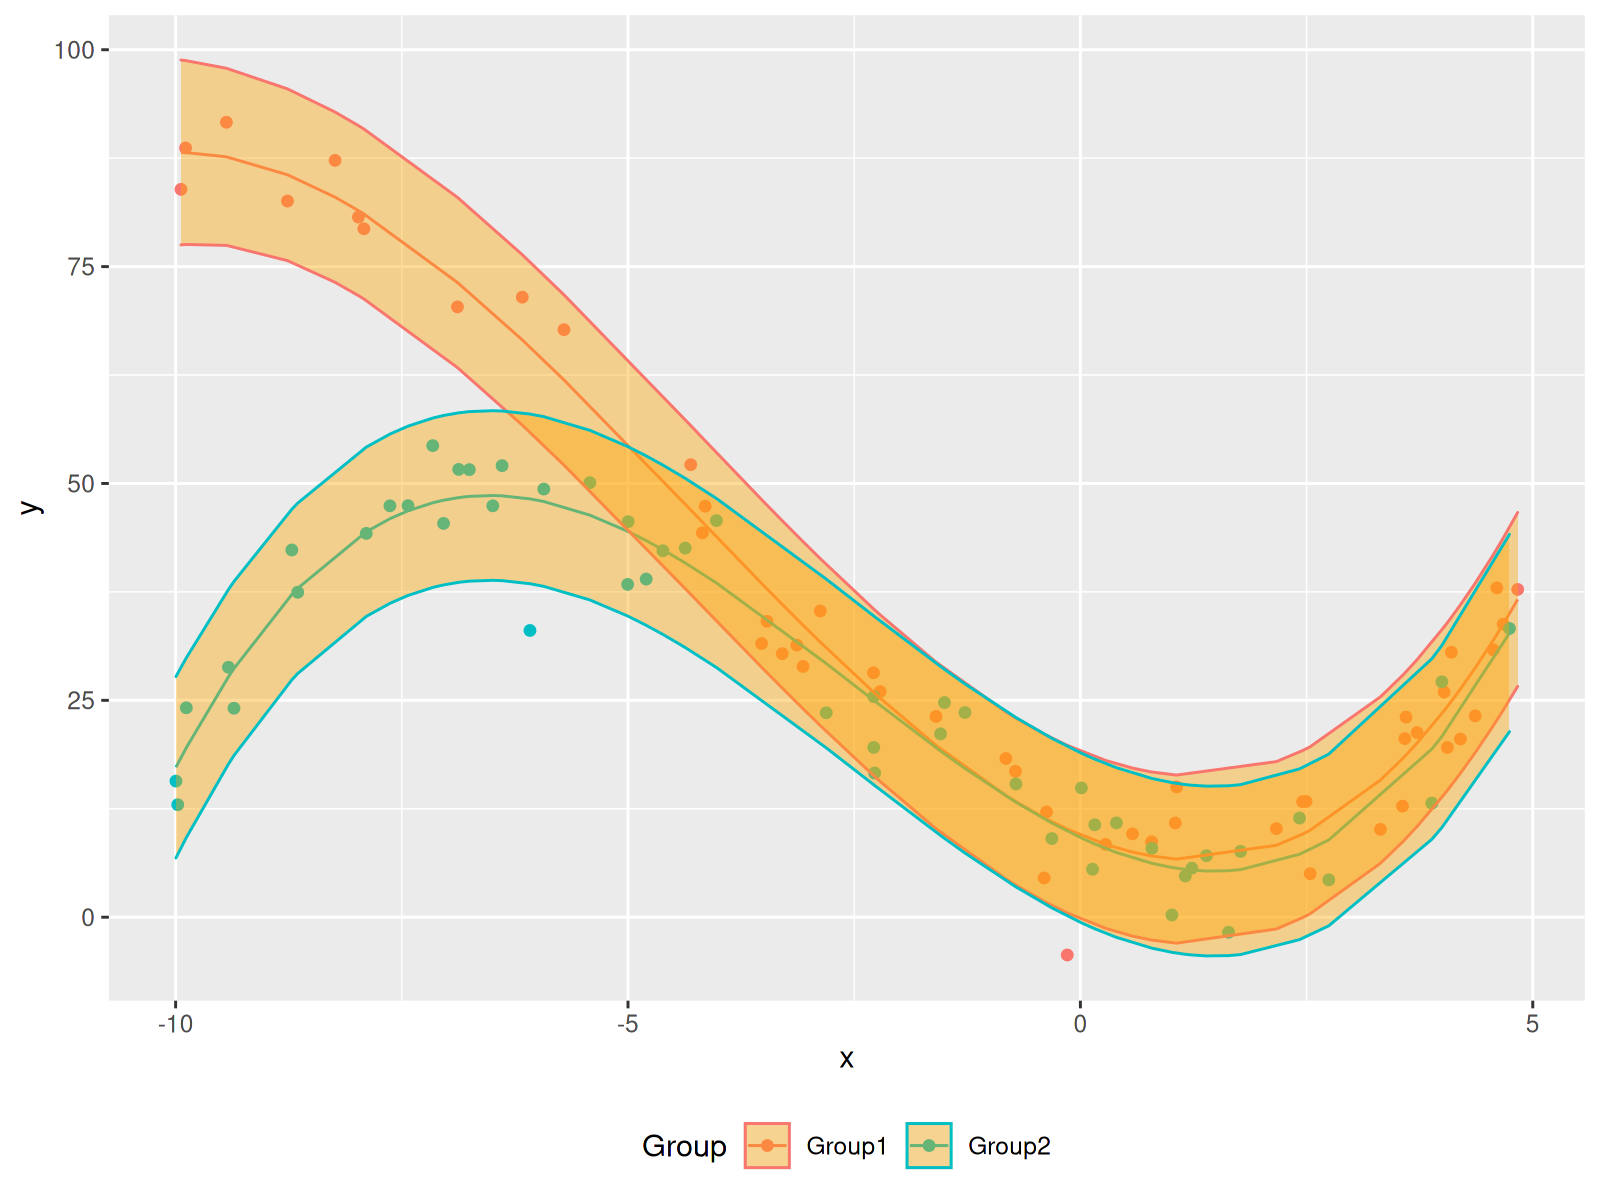

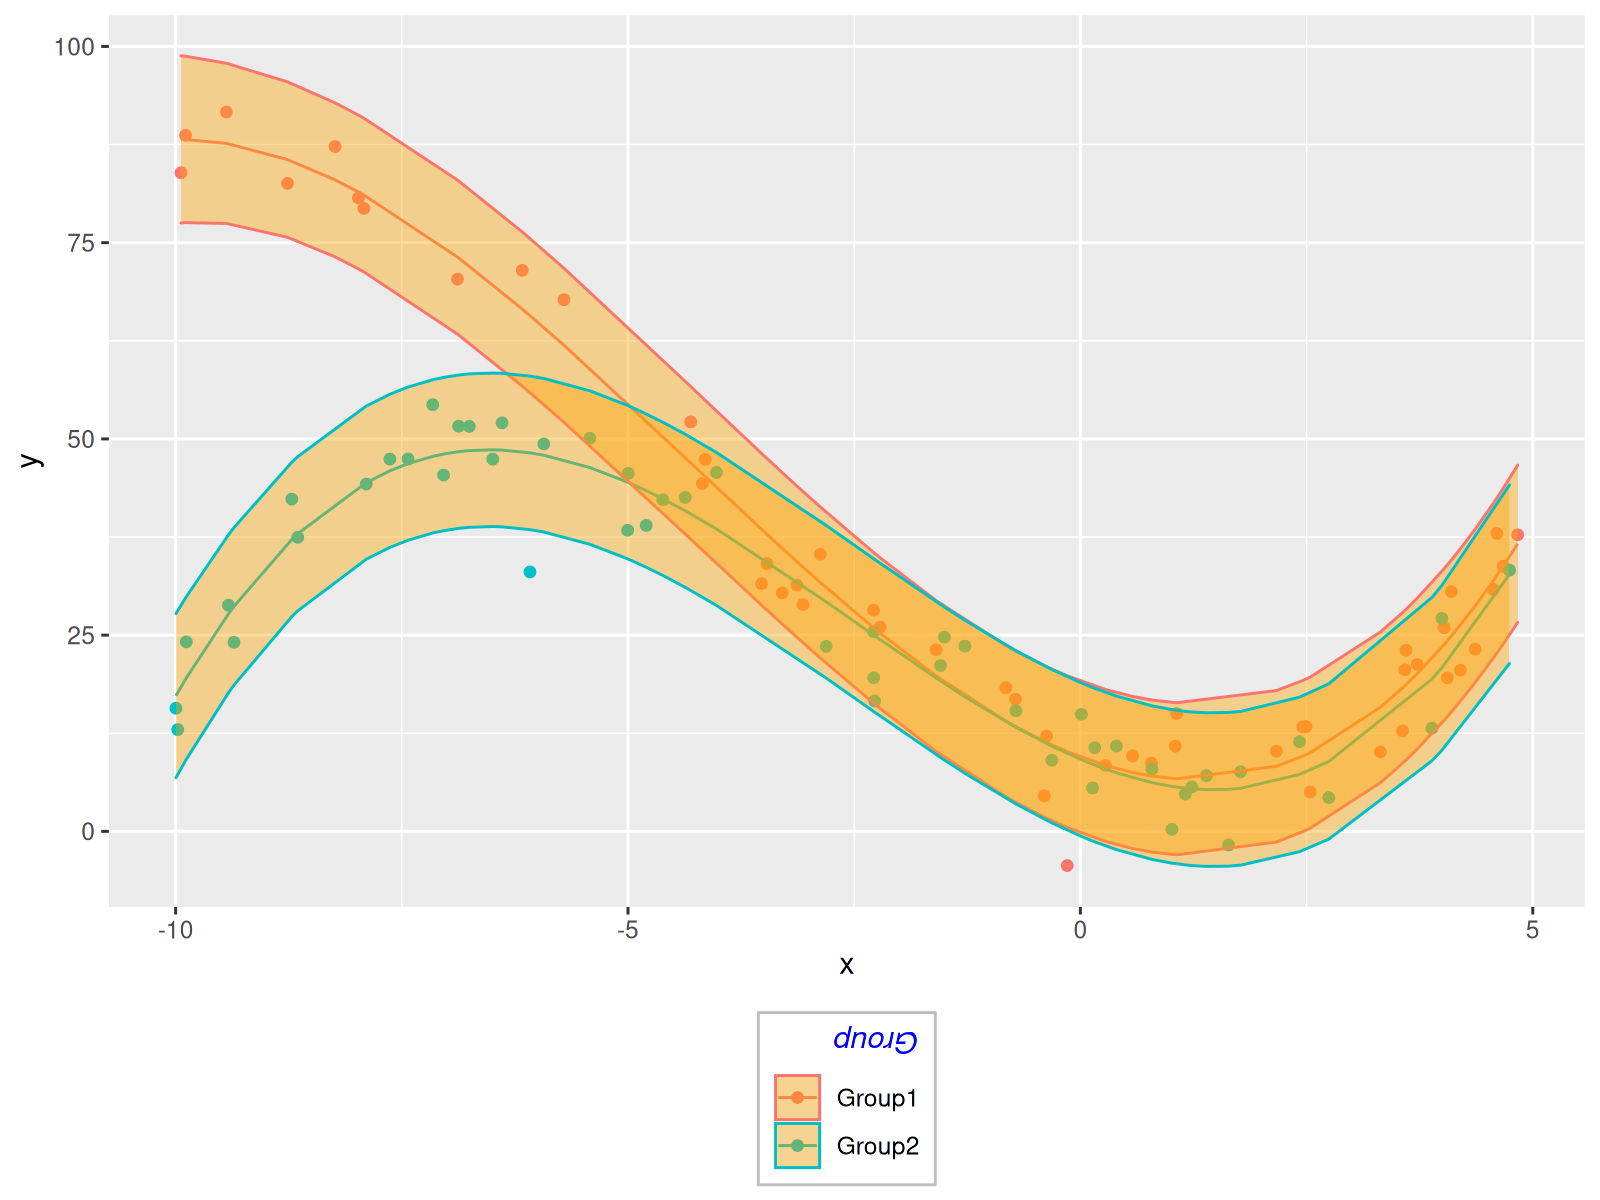

In [73]:
plot +
  theme(legend.position = "bottom")

plot +
  theme(legend.position = "bottom", 
        legend.title = element_text(color = "blue", angle = 180, face = "italic"),
        legend.direction = "vertical",
        legend.background = element_rect(colour = "grey"))

***

# Fortgeschritten

## Faceting

Faceting erlaubt das automatische Plotten mehrerer, getrennter Grafiken, differenziert bei einer Factor-Variable.

Faceting Befehle:
- `facet_grid`: Für manuelle Anordnung in einer Tabellenform (mit Angabe der Zeilen und Spalten)
- `facet_wrap`: Für automatische Anordnung in Tabellenform (ggplot bestimmt Zeilen und Spaltenzahl alleine)

Hier wurden zwei Regressionen geschätzt, die Variable `Group` dient zur Unterscheidung der jeweiligen Daten der Stichprobe, der gefiteten-Werte, den Prognoseintervallen etc.
Der Befehl `facet_grid` dient nun dazu die Grafiken für die einzelnen Gruppen Tabellenförmig anzuordnen (hier nur zwei Spalten).

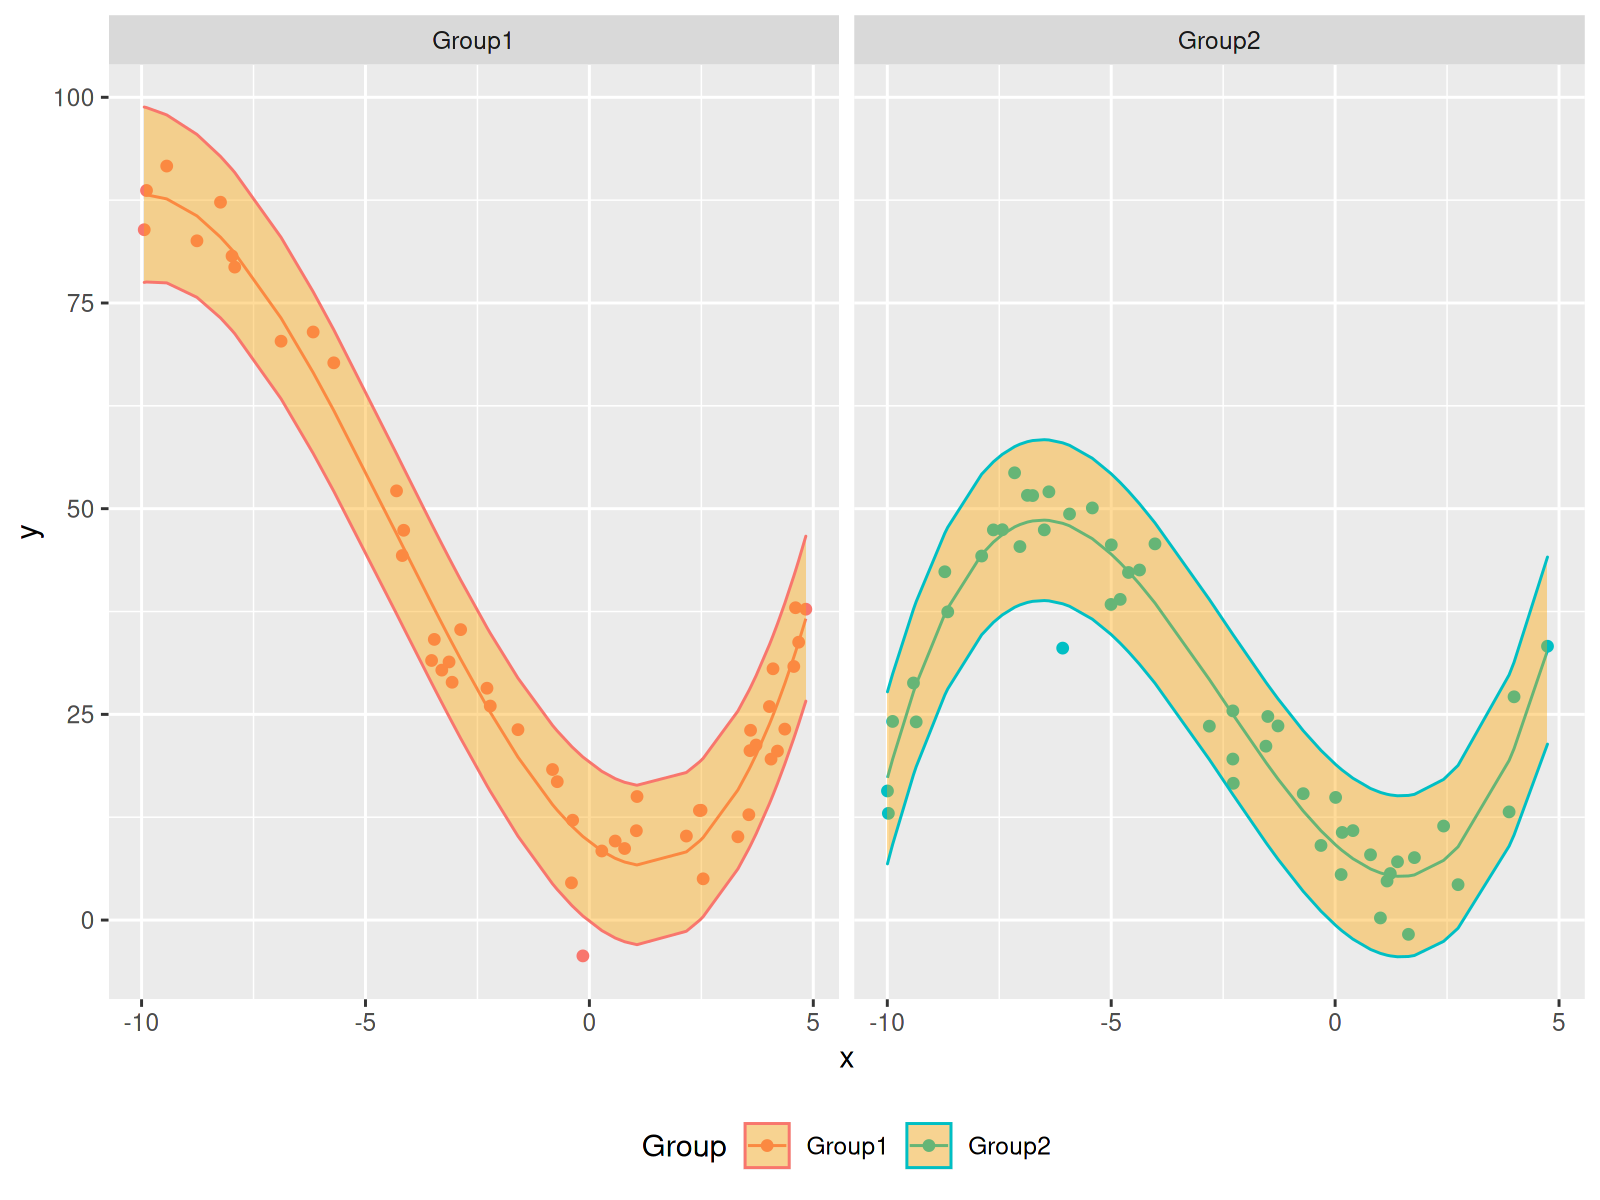

In [74]:
set.seed(42)
x1 <- runif(n = 50, -10, 5)
x2 <- runif(n = 50, -10, 5)

u <- rnorm(n = 50, mean = 0, sd = 5)

y1 <- 10 + 0.1 * x1^3 + 1.4 * x1^2 - 4 * x1 + u
y2 <- 8 + 0.17 * x2^3 + 1.31 * x2^2 - 4.9 * x2 + u

data1 <- data.frame(Group = "Group1", y = y1, x = x1)
data2 <- data.frame(Group = "Group2", y = y2, x = x2)

lm1 <- lm(y ~ poly(x, degree = 3), data = data1)
lm2 <- lm(y ~ poly(x, degree = 3), data = data2)
data <- rbind(cbind(data1, predict(lm1, data1, interval="predict")),
              cbind(data2, predict(lm2, data2, interval="predict")))

plot <- ggplot(data, aes(color = Group)) +
  geom_point(aes(x = x, y = y)) +
  geom_line(aes(x = x, y = fit)) +
  geom_ribbon(aes(x = x, ymin = lwr, ymax = upr), fill = "orange", alpha = 0.4)


plot +
  facet_grid(cols = vars(Group)) +
  theme(legend.position = "bottom")

## Trivariate Plots

Es wird eine 3D Funktion definiert, anschließend wird eine Tabelle aus (x, z)-Positionen generiert und dann für jedes Tupel ein z-Wert berechnet. Der Befehl `geom_contour` führt nun zu einer Darstellung der Höhenlinien.

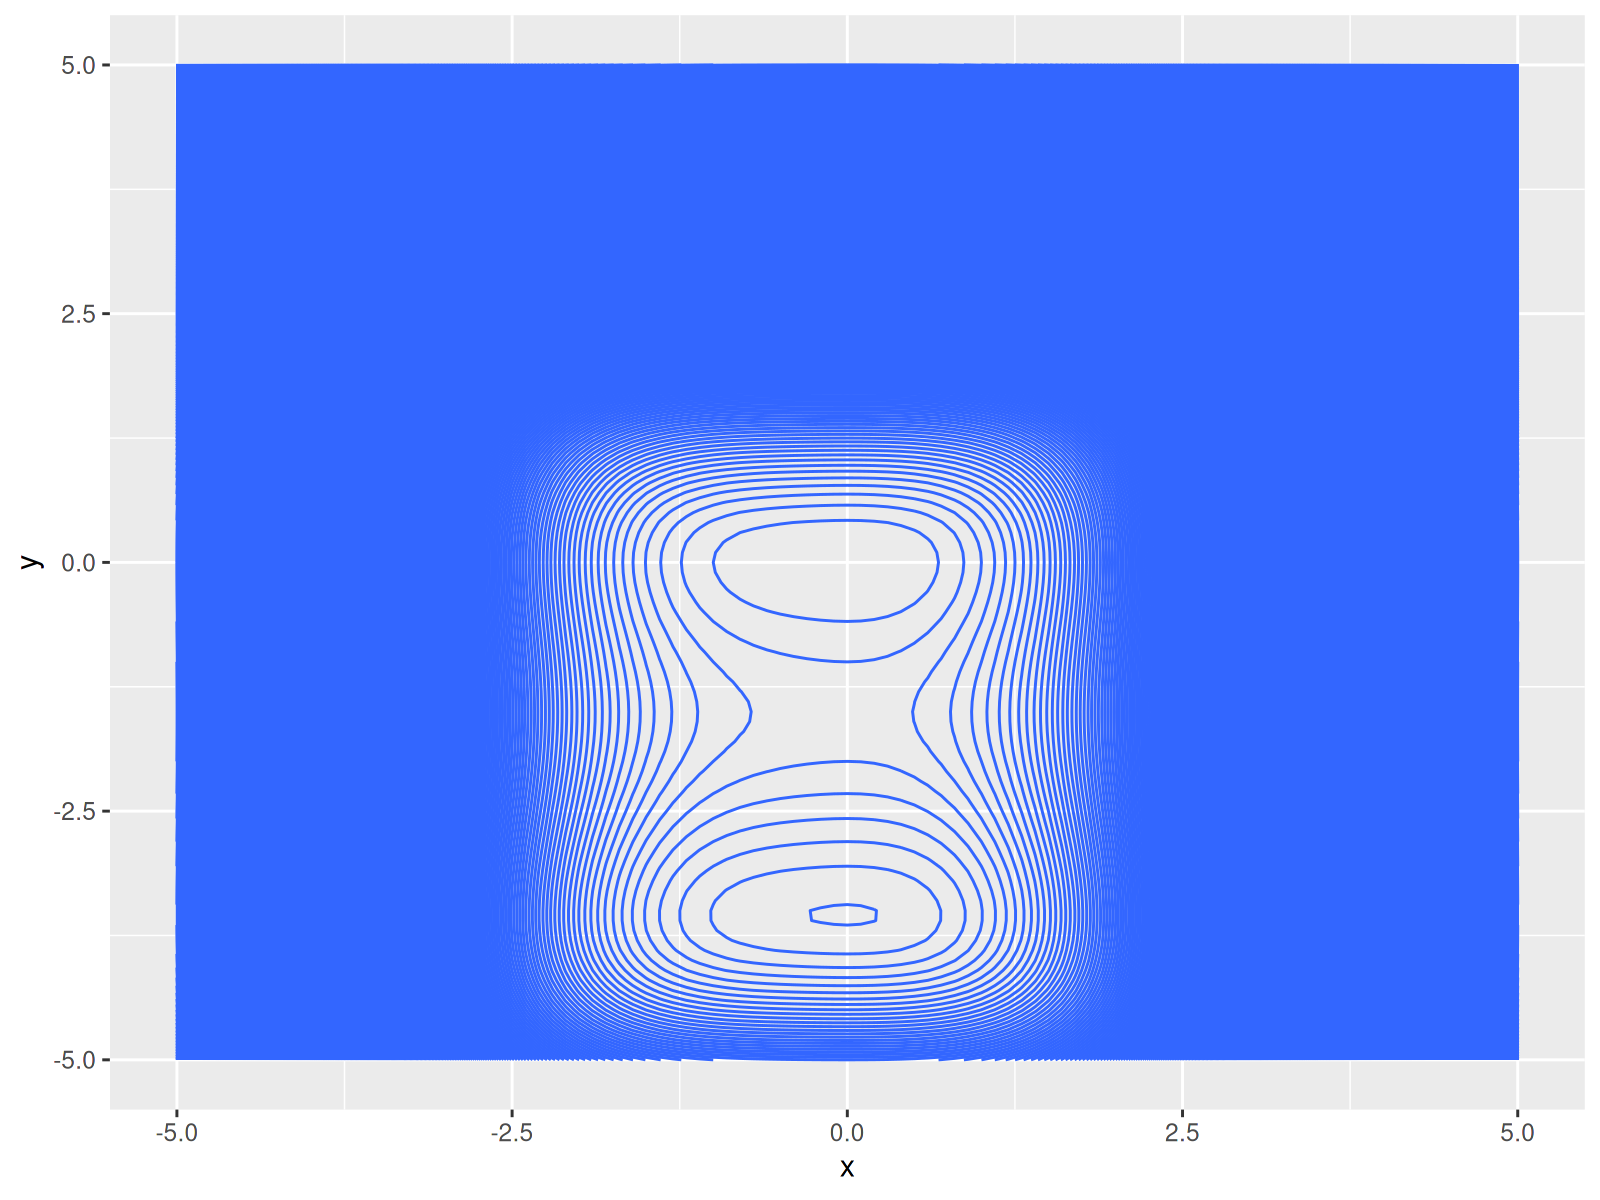

In [75]:
fun <- function(x, y){-1*x^2 -1*x^3 -1*x^4 -4.3*y^2 -2.7*y^3 -0.4*y^4}

i <- seq(-5, 5, by = .1)
ii <- sort(rep(i, length(i)))
data <- data.frame(x = ii, y = i)
data$z <- fun(data$x, data$y)

plot <- ggplot(data, aes(x = x, y = y, z = z)) +
  geom_contour(binwidth = 1)
plot

Mithilfe von Erweiterungen sind auch 3D-Darstellungen möglich. 

<img src="output.png">

<img src="output2.png">

## annotate()

Mit der Funktion `annotate()` kann man Plots zusätzlich um Grafik- bzw. Textelemente erweitern.

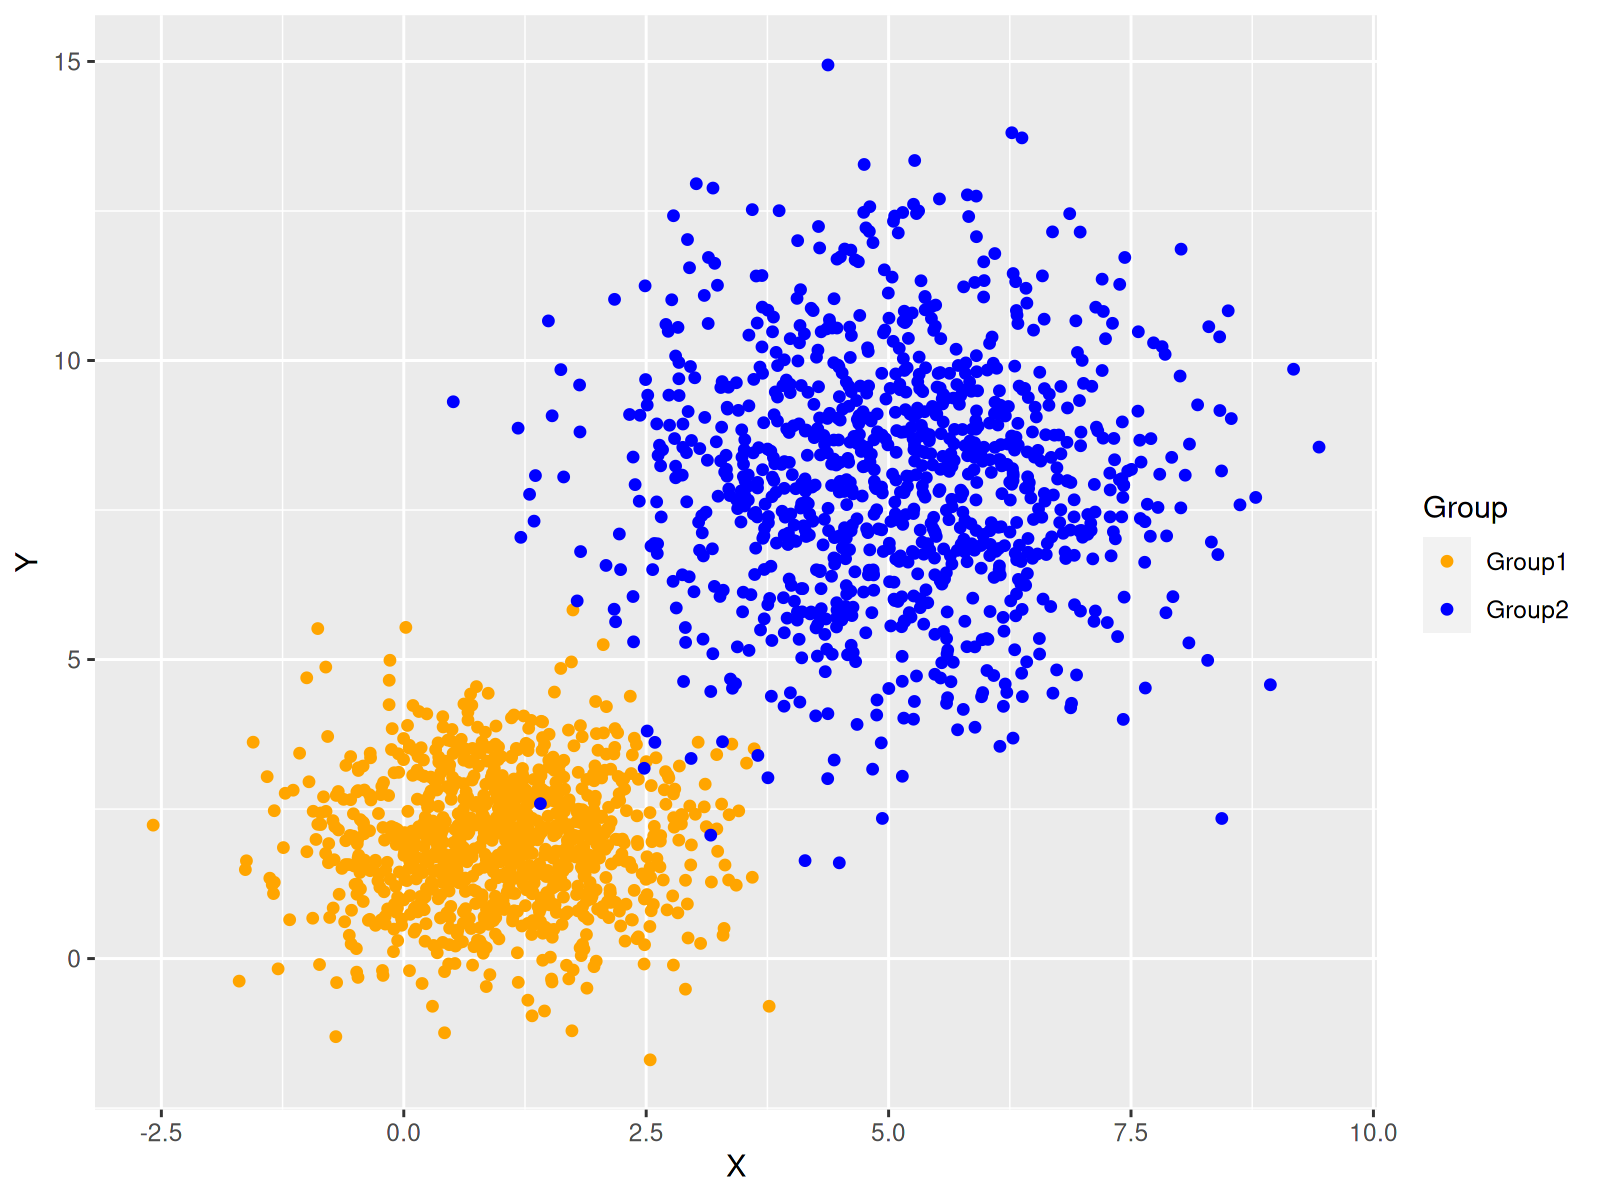

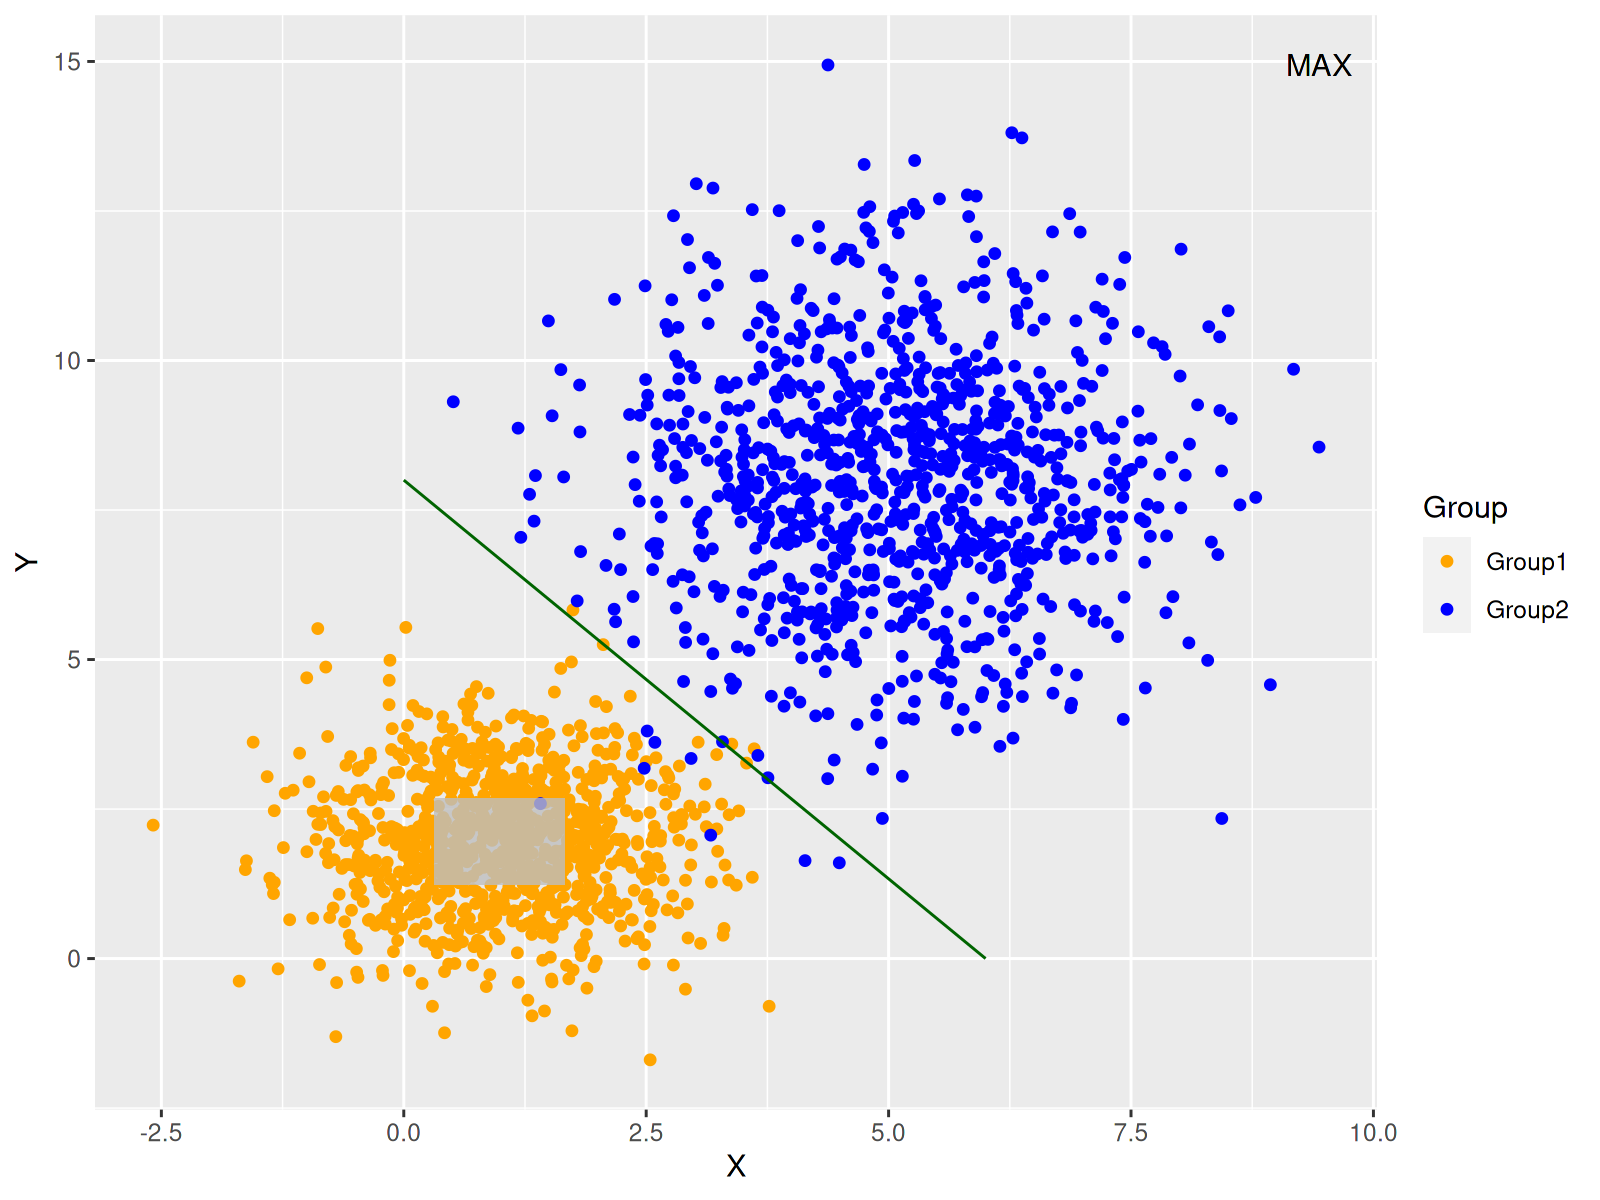

In [76]:
n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data) <- c("Group", "X", "Y")
data$Group %<>% factor
data$X %<>% as.numeric
data$Y %<>% as.numeric

plot <- ggplot(data = data) +
  geom_point(aes(x = X, y = Y, colour = Group)) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue"))
plot

plot +
  annotate("Text", x = max(data$X), y = max(data$Y), label = "MAX") +
  annotate("Segment", x = 6, xend = 0, y = 0, yend = 8, color = "darkgreen") +
  annotate("rect", xmin = quantile(data$X[data$Group == "Group1"], 0.25), 
                  xmax = quantile(data$X[data$Group == "Group1"], 0.75),
                  ymin = quantile(data$Y[data$Group == "Group1"], 0.25),
                  ymax = quantile(data$Y[data$Group == "Group1"], 0.75), fill = "grey", alpha = 0.8)

### autoplot()

Die `autoplot()` Funktion erlaubt das automatisierte Plotten von Graphen, was zu einer einfachen und sehr schnellen Visualisierung führen soll, ohne sich mit den low-level ggplot-Grafikfunktionen beschäftigen zu müssen.

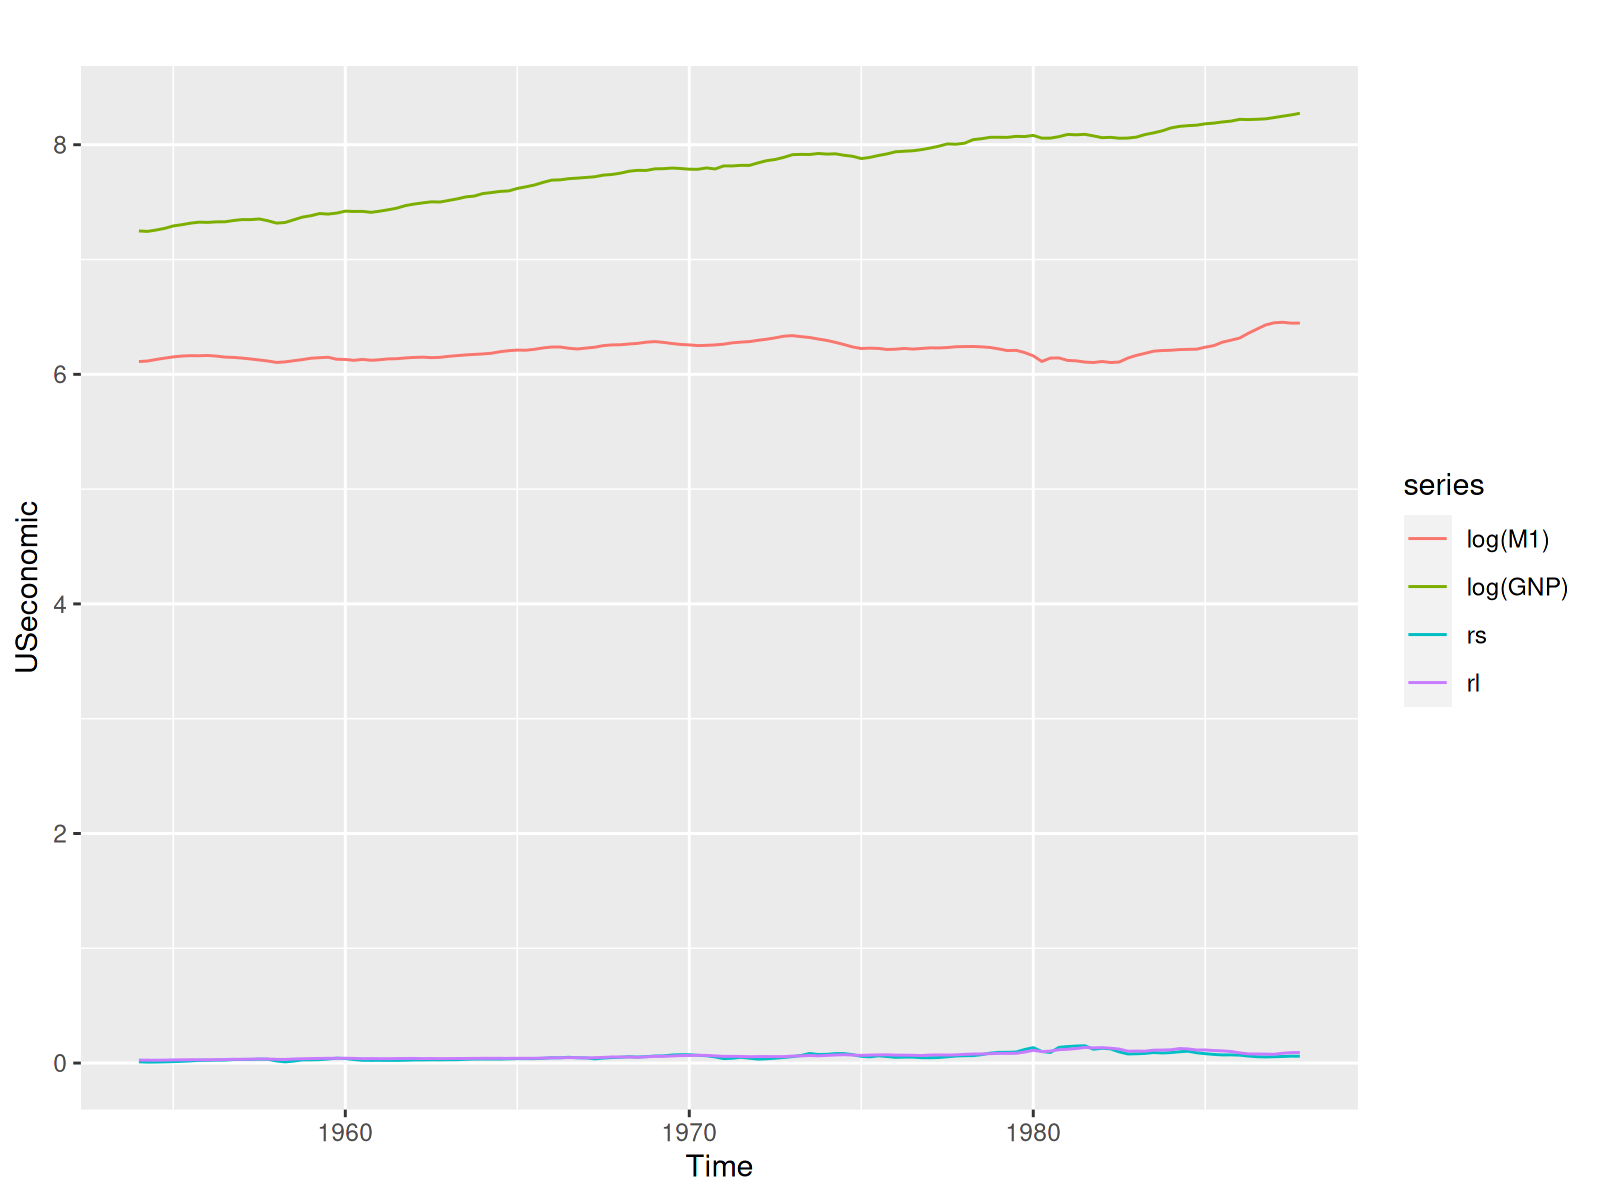

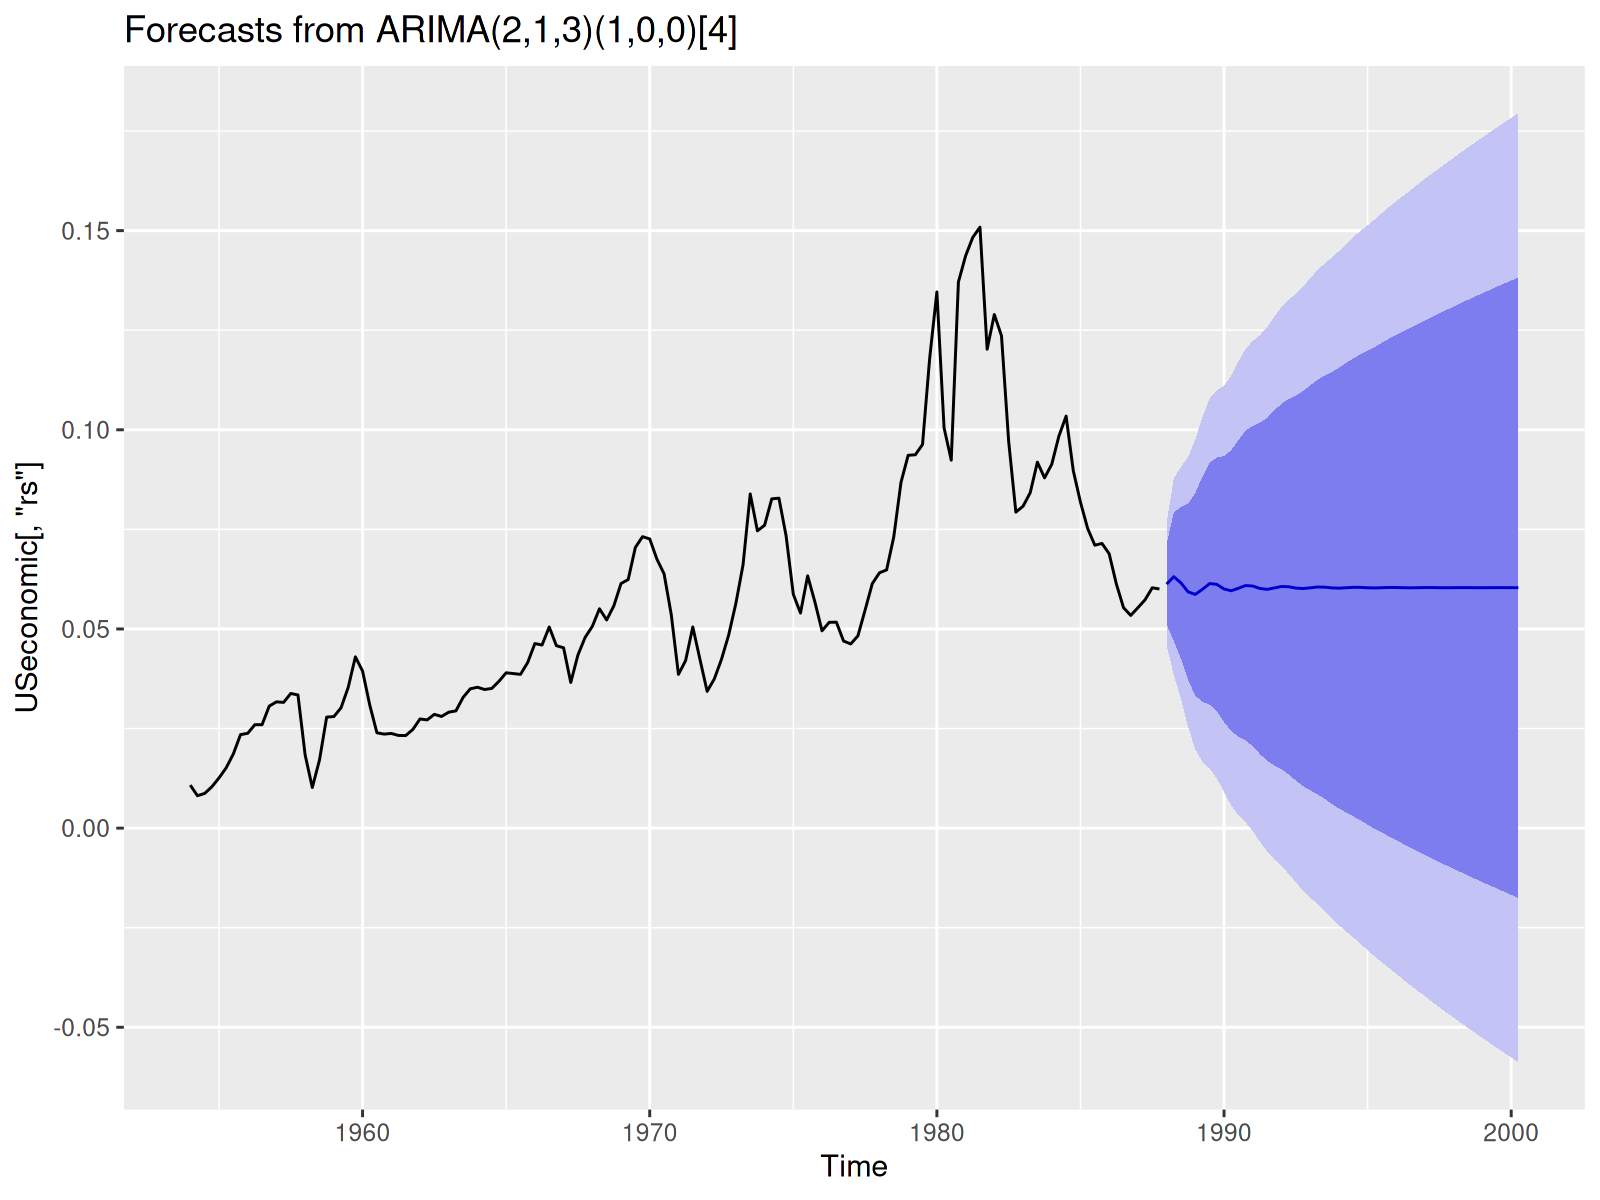

In [77]:
library(tseries)
library(ggfortify)
library(forecast)
data("USeconomic", package = "tseries")

autoplot(USeconomic)

model.arima <- auto.arima(USeconomic[, "rs"])

forecast.arima <- forecast(model.arima, h = 50)

autoplot(forecast.arima)